## Importing all Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
from scipy.stats import norm
import re

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

## Imorting all csv, excel and word files  

In [2]:
main_df = pd.read_csv(r"D:\Boston Institute of Analytics\Capstone Project\ConsumerElectronics.csv")

main_df.head(5)

C:\Users\athar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,10/17/2015 15:11,2015,10,3.420000e+15,3.420000e+15,6400,1,\N,\N,COD,5,-1.01E+18,-7.79E+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,10/19/2015 10:07,2015,10,1.420000e+15,1.420000e+15,6900,1,\N,\N,COD,7,-8.99E+18,7.34E+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,10/20/2015 15:45,2015,10,2.420000e+15,2.420000e+15,1990,1,\N,\N,COD,10,-1.04E+18,-7.48E+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,10/14/2015 12:05,2015,10,4.420000e+15,4.420000e+15,1690,1,\N,\N,Prepaid,4,-7.60E+18,-5.84E+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,10/17/2015 21:25,2015,10,4.420000e+15,4.420000e+15,1618,1,\N,\N,Prepaid,6,2.89E+18,5.35E+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [3]:
product_list = pd.read_excel(r"D:\Boston Institute of Analytics\Capstone Project\Media data and other information.xlsx", sheet_name = "Product List")
product_list.columns.values[1] = 'product_analytic_vertical'
product_list.drop(product_list.columns[0], axis = 1, inplace = True)
product_list.head(5)

,product_analytic_vertical,Frequency,Percent
0,\N,5828,0.353464
1,AmplifierReceiver,4056,0.245994
2,AudioMP3Player,112892,6.846819
3,Binoculars,14599,0.885419
4,BoomBox,2879,0.174609


In [4]:
media_investment = pd.read_excel(r"D:\Boston Institute of Analytics\Capstone Project\Media data and other information.xlsx", sheet_name = "Media Investment", skiprows = 2)
media_investment.drop(media_investment.columns[0], axis = 1, inplace = True)
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sales_calendar = pd.read_excel(r"D:\Boston Institute of Analytics\Capstone Project\Media data and other information.xlsx",sheet_name = "Special Sale Calendar",  
                               skiprows = 0, skipfooter = 2) 
sales_calendar.drop(sales_calendar.columns[0], axis = 1, inplace = True)

sales_calendar.iloc[0:5, 0] = sales_calendar.iloc[5, 0]
sales_calendar.iloc[6:, 0] = sales_calendar.iloc[11, 0]

sales_calendar

,Unnamed: 1,Sales Calendar
0,2015,(18-19th July)
1,2015,(15-17th Aug)
2,2015,(28-30th Aug)
3,2015,(17-15th Oct)
4,2015,(7-14th Nov)
5,2015,(25th Dec'15 - 3rd Jan'16)
6,2016,(20-22 Jan)
7,2016,(1-2 Feb)
8,2016,(20-21 Feb)
9,2016,(14-15 Feb)


In [6]:
net_promoter_score = pd.read_excel(r"D:\Boston Institute of Analytics\Capstone Project\Media data and other information.xlsx", 
                                   sheet_name = "Monthly NPS Score", skiprows = 0)
net_promoter_score.columns.values[0] = "score"
net_promoter_score

,score,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NPS,54.599588,59.987101,46.925419,44.398389,47.0,45.8,47.093031,50.327406,49.02055,51.827605,47.306951,50.516687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Stock Index,1177.000000,1206.000000,1101.000000,1210.000000,1233.0,1038.0,1052.000000,1222.000000,1015.00000,1242.000000,1228.000000,1194.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#pip install --pre python-docx
import io
import csv
from docx import Document

def read_docx_tables(filename, tab_id = None, **kwargs):
    def read_docx_tab(tab, **kwargs):
        vf = io.StringIO()
        writer = csv.writer(vf)
        for row in tab.rows:
            writer.writerow(cell.text for cell in row.cells)
        vf.seek(0)
        return pd.read_csv(vf, **kwargs)

    doc = Document(filename)
    if tab_id is None:
        return [read_docx_tab(tab, **kwargs) for tab in doc.tables]
    else:
        try:
            return read_docx_tab(doc.tables[tab_id], **kwargs)
        except IndexError:
            print('Error: specified [tab_id]: {}  does not exist.'.format(tab_id))
            raise
            
dfs = read_docx_tables('D:\Boston Institute of Analytics\Capstone Project\Product Details.docx')

dfs[0]

,super_category,category,sub_category,vertical
0,CE,Camera,Camera,Camcorders
1,CE,Camera,Camera,DSLR
2,CE,Camera,Camera,Instant Cameras
3,CE,Camera,Camera,Point & Shoot
4,CE,Camera,Camera,SportsAndAction
5,CE,CameraAccessory,CameraAccessory,Binoculars
6,CE,CameraAccessory,CameraAccessory,CameraAccessory
7,CE,CameraAccessory,CameraAccessory,CameraBag
8,CE,CameraAccessory,CameraAccessory,CameraBattery
9,CE,CameraAccessory,CameraAccessory,CameraBatteryCharger


In [8]:
product_details = pd.DataFrame(dfs[0])
product_details.drop(product_details.columns[0], axis = 1, inplace = True)
product_details.head(5)

,category,sub_category,vertical
0,Camera,Camera,Camcorders
1,Camera,Camera,DSLR
2,Camera,Camera,Instant Cameras
3,Camera,Camera,Point & Shoot
4,Camera,Camera,SportsAndAction


In [9]:
main_df.isnull().value_counts()

fsn_id  order_date  Year   Month  order_id  order_item_id  gmv    units  deliverybdays  deliverycdays  s1_fact.order_payment_type  sla    cust_id  pincode  product_analytic_super_category  product_analytic_category  product_analytic_sub_category  product_analytic_vertical  product_mrp  product_procurement_sla
False   False       False  False  False     False          False  False  False          False          False                       False  False    False    False                            False                      False                          False                      False        False                      1048575
dtype: int64

In [10]:
main_df.describe()

,Year,Month,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.015527e+03,6.429499e+00,2.990225e+15,4.358168e+15,1.022597e+00,5.739834e+00,4.343884e+03,4.530773e+00
std,4.992481e-01,4.344848e+00,1.119981e+15,2.014243e+16,2.717156e-01,2.734659e+00,8.858539e+03,4.453216e+01
min,2.015000e+03,1.000000e+00,7.633152e+07,1.080165e+08,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,2.015000e+03,2.000000e+00,1.590000e+15,2.410000e+15,1.000000e+00,4.000000e+00,8.000000e+02,1.000000e+00
50%,2.016000e+03,4.000000e+00,2.590000e+15,3.410000e+15,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00
75%,2.016000e+03,1.100000e+01,4.410000e+15,4.410000e+15,1.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00
max,2.016000e+03,1.200000e+01,4.590000e+15,3.000000e+17,5.000000e+01,1.840000e+02,2.800000e+05,1.000000e+03


In [11]:
main_df[main_df['product_procurement_sla']== 0].count()

fsn_id                             30130
order_date                         30130
Year                               30130
Month                              30130
order_id                           30130
order_item_id                      30130
gmv                                30130
units                              30130
deliverybdays                      30130
deliverycdays                      30130
s1_fact.order_payment_type         30130
sla                                30130
cust_id                            30130
pincode                            30130
product_analytic_super_category    30130
product_analytic_category          30130
product_analytic_sub_category      30130
product_analytic_vertical          30130
product_mrp                        30130
product_procurement_sla            30130
dtype: int64

In [12]:
main_df.isnull().sum().sort_values(ascending = False)

fsn_id                             0
order_date                         0
product_mrp                        0
product_analytic_vertical          0
product_analytic_sub_category      0
product_analytic_category          0
product_analytic_super_category    0
pincode                            0
cust_id                            0
sla                                0
s1_fact.order_payment_type         0
deliverycdays                      0
deliverybdays                      0
units                              0
gmv                                0
order_item_id                      0
order_id                           0
Month                              0
Year                               0
product_procurement_sla            0
dtype: int64

In [13]:
main_df[main_df['units']== 1].count()

fsn_id                             1032873
order_date                         1032873
Year                               1032873
Month                              1032873
order_id                           1032873
order_item_id                      1032873
gmv                                1032873
units                              1032873
deliverybdays                      1032873
deliverycdays                      1032873
s1_fact.order_payment_type         1032873
sla                                1032873
cust_id                            1032873
pincode                            1032873
product_analytic_super_category    1032873
product_analytic_category          1032873
product_analytic_sub_category      1032873
product_analytic_vertical          1032873
product_mrp                        1032873
product_procurement_sla            1032873
dtype: int64

In [14]:
main_df.shape

(1048575, 20)

In [15]:
main_df['product_analytic_category'].value_counts()

EntertainmentSmall    601384
CameraAccessory       160572
GamingHardware        145762
Camera                 72577
GameCDDVD              68280
Name: product_analytic_category, dtype: int64

In [16]:
pd.DataFrame(main_df.groupby('product_analytic_sub_category')['product_analytic_vertical'].value_counts()) 

product_analytic_vertical
product_analytic_sub_category product_analytic_vertical                           
AmplifierReceiver             AmplifierReceiver                               2102
AudioAccessory                Microphone                                      4613
                              MicrophoneAccessory                             1547
AudioMP3Player                AudioMP3Player                                 73204
Camera                        DSLR                                           43810
                              Point & Shoot                                  25083
                              SportsAndAction                                 1636
                              Instant Cameras                                 1438
                              Camcorders                                       610
CameraAccessory               Flash                                          32201
                              CameraBattery                                  25909
                              CameraTripod                                   23724
                              Lens                                           21418
                              CameraBag                                      10177
                              CameraBatteryCharger                            9823
                              Binoculars                                      9100
                              Filter                                          7994
                              CameraRemoteControl                             3531
                              CameraAccessory                                 1171
                              Strap                                           1050
                              CameraFilmRolls                                 1040
                              CameraMount                                      860
                              Telescope                                        852
                              CameraBatteryGrip                                234
                              ExtensionTube                                     77
                              CameraEyeCup                                      50
                              CameraMicrophone                                  46
                              CameraLEDLight                                     3
                              ReflectorUmbrella                                  3
                              CameraHousing                                      2
                              FlashShoeAdapter                                   2
                              Softbox                                            2
                              Teleconverter                                      1
CameraStorage                 CameraStorageMemoryCard                        11302
Game                          PhysicalGame                                   62426
                              CodeInTheBoxGame                                5838
GameMembershipCards           GameValueCards                                    16
GamingAccessory               GamingHeadset                                  44245
                              GamePad                                        34192
                              GamingMouse                                    26054
                              GamingAccessoryKit                              5800
                              GamingMemoryCard                                4987
                              TVOutCableAccessory                             4482
                              GamingKeyboard                                  4020
                              GamingMousePad                                  2876
                              GamingAdapter                                   2047
                              JoystickGamingWheel                        

## Converting the data types

In [17]:
main_df.dtypes

fsn_id                              object
order_date                          object
Year                                 int64
Month                                int64
order_id                           float64
order_item_id                      float64
gmv                                 object
units                                int64
deliverybdays                       object
deliverycdays                       object
s1_fact.order_payment_type          object
sla                                  int64
cust_id                             object
pincode                             object
product_analytic_super_category     object
product_analytic_category           object
product_analytic_sub_category       object
product_analytic_vertical           object
product_mrp                          int64
product_procurement_sla              int64
dtype: object

In [18]:
# String to DateTime
main_df['order_date'] = pd.to_datetime(main_df['order_date'], format = "%m/%d/%Y %H:%M")

In [19]:
# Float to String
main_df[['order_id', 'order_item_id']] = main_df[['order_id', 'order_item_id']].astype(object)

In [20]:
# int to str
main_df[['Year', 'Month']] = main_df[['Year', 'Month']].astype(str)

In [21]:
print(main_df['deliverybdays'].value_counts())
print('-------------------------------------------')
print(main_df['deliverycdays'].value_counts())

\N     958198
5       17396
4       16512
6       14639
3       13008
        ...  
114         1
90          1
77          1
115         1
-39         1
Name: deliverybdays, Length: 124, dtype: int64
-------------------------------------------
\N      958198
5        15472
6        15060
4        12969
7        11624
         ...  
-628         1
154          1
28           1
37           1
90           1
Name: deliverycdays, Length: 143, dtype: int64


In [22]:
#String to int

main_df['gmv'] = pd.to_numeric(main_df['gmv'], errors = 'coerce')

In [23]:
main_df['deliverybdays'] = pd.to_numeric(main_df['deliverybdays'], errors = 'coerce')
main_df['deliverybdays'].fillna(value = 0, inplace = True)

In [24]:
main_df['deliverycdays'] = pd.to_numeric(main_df['deliverycdays'], errors = 'coerce')
main_df['deliverycdays'].fillna(value = 0, inplace = True)

In [25]:
main_df.dtypes

fsn_id                                     object
order_date                         datetime64[ns]
Year                                       object
Month                                      object
order_id                                   object
order_item_id                              object
gmv                                       float64
units                                       int64
deliverybdays                             float64
deliverycdays                             float64
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64


## Displaying Unique Values 

In [26]:
unique_values = pd.DataFrame(main_df.apply(lambda x: len(x.value_counts(dropna=False)), axis = 0), columns = ['Unique Value Count']).sort_values(by='Unique Value Count', ascending = True)
unique_values['dtype'] = pd.DataFrame(main_df.dtypes)
unique_values

,Unique Value Count,dtype
product_analytic_super_category,1,object
Year,2,object
s1_fact.order_payment_type,2,object
product_analytic_category,5,object
Month,11,object
product_analytic_sub_category,14,object
product_procurement_sla,17,int64
units,26,int64
sla,48,int64
product_analytic_vertical,74,object


In [27]:
initial_shape = main_df.shape
initial_shape

(1048575, 20)

In [28]:
a = pd.DataFrame(main_df.apply(lambda x: len(x.value_counts(dropna = False)), axis = 0),columns = ['Unique Value Count']).sort_values(by = 'Unique Value Count', ascending = True)
a['dtype'] = main_df.dtypes
a

,Unique Value Count,dtype
product_analytic_super_category,1,object
Year,2,object
s1_fact.order_payment_type,2,object
product_analytic_category,5,object
Month,11,object
product_analytic_sub_category,14,object
product_procurement_sla,17,int64
units,26,int64
sla,48,int64
product_analytic_vertical,74,object


### Fixing MRP with respect to GMV

##### Removing the values where mrp is less than gmv no ekart company will do such thing 

In [29]:
print(main_df.loc[main_df['product_mrp'] * main_df['units'] < main_df['gmv']].shape[0])
print(round(100*(main_df.loc[main_df['product_mrp'] * main_df['units'] < main_df['gmv']].shape[0] / main_df.shape[0]), 2))

22239
2.12


In [30]:
main_df.product_mrp = np.where(main_df['product_mrp'] < main_df['gmv'] / main_df['units'], 
                              main_df['gmv'] / main_df['units'], main_df['product_mrp'])

main_df.shape

(1048575, 20)

In [31]:
print(main_df.loc[main_df['product_mrp'] * main_df['units'] < main_df['gmv']].shape[0])
print(round(100*(main_df.loc[main_df['product_mrp'] * main_df['units'] < main_df['gmv']].shape[0] / main_df.shape[0]), 2))

0
0.0


### Checking delivery days value if less than 0 deleting them 

In [32]:
print(main_df.loc[main_df['deliverybdays'] < 0].shape[0])
print(round(100*(main_df.loc[main_df['deliverybdays'] < 0].shape[0] / main_df.shape[0]), 5))

print(main_df.loc[main_df['deliverycdays'] < 0].shape[0])
print(round(100*(main_df.loc[main_df['deliverycdays'] < 0].shape[0] / main_df.shape[0]), 5))

11
0.00105
11
0.00105


There are 11 entries in both the columns 'deliverybdays' 'deliverycdays' which are less than 0...
So we have to drop those rows 

In [33]:
main_df.shape

(1048575, 20)

In [34]:
main_df = main_df.loc[(main_df['deliverybdays'] >= 0) & (main_df['deliverycdays'] >= 0)]

## Removing the negative values fro product_sla


In [35]:
print(main_df.loc[main_df['product_procurement_sla'] < 0].shape[0])
print(round(100 *(main_df.loc[main_df['product_procurement_sla'] < 0].shape[0]/ main_df.shape[0]), 4))

56923
5.4287


In [36]:
main_df = main_df.loc[main_df['product_procurement_sla'] >= 0]

main_df.reset_index(drop = True, inplace = True)

In [37]:
main_df.shape

(991641, 20)

In [38]:
main_df[['product_procurement_sla']].describe().T

,count,mean,std,min,25%,50%,75%,max
product_procurement_sla,991641.0,4.84828,45.772425,0.0,2.0,2.0,4.0,1000.0


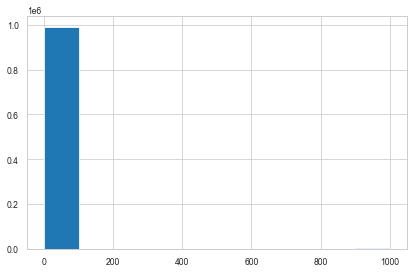

In [39]:
plt.figure(figsize = (6, 4), dpi = 70, facecolor = 'w', edgecolor = 'k', frameon = 'True')
sns.set_style('whitegrid')
sns.set_context('paper')
main_df.product_procurement_sla.hist()
plt.tight_layout()
plt.show()

##### deleting the delivery days value greater than 1000 as we found one as its not possible

In [40]:
main_df.product_procurement_sla.value_counts()

2       316472
3       200633
1       192103
5       138535
4        81015
0        30129
6        11921
7         8932
15        5717
14        3247
1000      2090
8          359
13         343
9           56
10          47
12          42
Name: product_procurement_sla, dtype: int64

In [41]:
print(main_df.loc[main_df['product_procurement_sla'] >= 1000].shape[0])
print(round(100*(main_df.loc[main_df['product_procurement_sla'] >= 1000].shape[0]/main_df.shape[0]), 4))

2090
0.2108


In [42]:
main_df = main_df.loc[(main_df['product_procurement_sla'] < 1000)]
main_df.shape

(989551, 20)

In [43]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989551 entries, 0 to 991640
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           989551 non-null  object        
 1   order_date                       989551 non-null  datetime64[ns]
 2   Year                             989551 non-null  object        
 3   Month                            989551 non-null  object        
 4   order_id                         989551 non-null  object        
 5   order_item_id                    989551 non-null  object        
 6   gmv                              987458 non-null  float64       
 7   units                            989551 non-null  int64         
 8   deliverybdays                    989551 non-null  float64       
 9   deliverycdays                    989551 non-null  float64       
 10  s1_fact.order_payment_type       989551 non-

In [44]:
cat_cols = [cname for cname in main_df.columns if main_df[cname].dtype == "object"]
cat_cols

['fsn_id',
 'Year',
 'Month',
 'order_id',
 'order_item_id',
 's1_fact.order_payment_type',
 'cust_id',
 'pincode',
 'product_analytic_super_category',
 'product_analytic_category',
 'product_analytic_sub_category',
 'product_analytic_vertical']

In [45]:
cat_cols = ['fsn_id',
 's1_fact.order_payment_type',
 'product_analytic_super_category',
 'product_analytic_category',
 'product_analytic_sub_category',
 'product_analytic_vertical']

for col in cat_cols:
    main_df[col] = main_df[col].str.lower()

In [46]:
cat_col = [cname for cname in main_df.columns if main_df[cname].dtype == "object"]
main_df[cat_col].describe()

,fsn_id,Year,Month,order_id,order_item_id,s1_fact.order_payment_type,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical
count,989551,989551,989551,9.895510e+05,9.895510e+05,989551,989551,9.895510e+05,989551,989551,989551,989551
unique,15990,2,11,8.100000e+01,8.200000e+01,2,10737,4.307000e+03,1,5,14,73
top,camda6rjerf8hs4g,2016,10,2.420000e+15,2.420000e+15,cod,,-9.030000e+18,ce,entertainmentsmall,speaker,laptopspeaker
freq,14427,539727,189013,3.101400e+04,3.101100e+04,698546,2093,5.062000e+03,989551,561957,326660,161717


In [47]:
selected_cat_cols = ['s1_fact.order_payment_type','product_analytic_super_category','product_analytic_category','product_analytic_sub_category','product_analytic_vertical']
for col in selected_cat_cols:
    print("---------------------------------")
    print("Unique values of " + str(col))
    print("---------------------------------")
    print(pd.Series(main_df[col].unique()).sort_values(ascending = False)) 

---------------------------------
Unique values of s1_fact.order_payment_type
---------------------------------
1    prepaid
0        cod
dtype: object
---------------------------------
Unique values of product_analytic_super_category
---------------------------------
0    ce
dtype: object
---------------------------------
Unique values of product_analytic_category
---------------------------------
1        gaminghardware
3             gamecddvd
2    entertainmentsmall
0       cameraaccessory
4                camera
dtype: object
---------------------------------
Unique values of product_analytic_sub_category
---------------------------------
12           tvvideosmall
2                 speaker
10            hometheatre
3               homeaudio
9           gamingconsole
1         gamingaccessory
13    gamemembershipcards
7                    game
4           camerastorage
0         cameraaccessory
8                  camera
6          audiomp3player
11         audioaccessory
5       amp

### Dropping duolicated roes

In [48]:
main_df.shape

(989551, 20)

In [49]:
print(main_df.duplicated().value_counts()[1])
print(round(100*(main_df.duplicated().value_counts()[1]/main_df.shape[0]),4))

350
0.0354


Since there are only 350 deplicated values we will drop them 

In [50]:
main_df.drop_duplicates(keep = 'first', inplace = True)
main_df.shape

(989201, 20)

In [51]:
main_df.duplicated().value_counts()

False    989201
dtype: int64

In [52]:
main_df['gmv'].isnull().value_counts()

False    987108
True       2093
Name: gmv, dtype: int64

In [53]:
total = pd.DataFrame(main_df.isnull().sum().sort_values(ascending = False), columns = ["Total"])
percentage = pd.DataFrame(round(100*(main_df.isnull().sum()/main_df.shape[0]),2).sort_values(ascending = False), columns = ["percentage"] )
pd.concat([total, percentage], axis = 1).head()

,Total,percentage
gmv,2093,0.21
fsn_id,0,0.00
sla,0,0.00
product_mrp,0,0.00
product_analytic_vertical,0,0.00


There are 2093 null values in the gmv column whics is 0.21 percent of the entire data we will drop the null values
Also there are some blank spaces we will convert it to nan and will find the null percent again

In [54]:
main_df.replace(' ', np.nan, inplace = True)

In [55]:
total = pd.DataFrame(main_df.isnull().sum().sort_values(ascending = False), columns = ["Total"])
percentage = pd.DataFrame(round(100*(main_df.isnull().sum()/main_df.shape[0]),2).sort_values(ascending = False), columns = ["percentage"] )
pd.concat([total, percentage], axis = 1).head()

,Total,percentage
gmv,2093,0.21
pincode,2093,0.21
cust_id,2093,0.21
fsn_id,0,0.00
sla,0,0.00


In [56]:
main_df = main_df[~pd.isnull(main_df['gmv'])]
org_shape = main_df.shape
org_shape

(987108, 20)

In [57]:
total = pd.DataFrame(main_df.isnull().sum().sort_values(ascending = False), columns = ["Total"])
percentage = pd.DataFrame(round(100*(main_df.isnull().sum()/main_df.shape[0]),2).sort_values(ascending = False), columns = ["percentage"] )
pd.concat([total, percentage], axis = 1).head()

,Total,percentage
fsn_id,0,0.0
order_date,0,0.0
product_mrp,0,0.0
product_analytic_vertical,0,0.0
product_analytic_sub_category,0,0.0


### Selecting the data between the given dates 
#### We have to select dates btwn July 2015 to June 2016

In [58]:
main_df.dtypes

fsn_id                                     object
order_date                         datetime64[ns]
Year                                       object
Month                                      object
order_id                                  float64
order_item_id                             float64
gmv                                       float64
units                                       int64
deliverybdays                             float64
deliverycdays                             float64
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                               float64
product_procurement_sla                     int64


In [59]:
main_df.loc[(main_df['order_date'].dt.floor("d") < '2015-07-01') | (main_df['order_date'].dt.floor("d") >= '2016-07-01') ].shape

(0, 20)

In [60]:
main_df.loc[main_df['order_date'].dt.floor("d") < '2016-07-01'].shape

(987108, 20)

Since there were no dates in the 'order_date' column of main_df falling outside the range of July 1st, 2015 to June 30th, 2016, the condition in the code snippet would not select any rows, and therefore there is no need to drop any rows from main_df.

In [61]:
Max = pd.DataFrame(main_df[['order_date']].max().rename('Max'))
Min = pd.DataFrame(main_df[['order_date']].min().rename('Min'))

pd.concat([Min, Max], axis = 1)

,Min,Max
order_date,2015-08-30 13:17:00,2016-06-11 11:52:00


## Creating a new column Week

In [62]:
loc_index = main_df.columns.get_loc('Month') + 1
main_df.insert(loc = loc_index, column = 'Week', value = main_df['order_date'].dt.strftime("%V"))
main_df['Year'] = main_df['Year'].astype('str') 
main_df.head(3)

,fsn_id,order_date,Year,Month,Week,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,acccx3s58g7b5f6p,2015-10-17 15:11:00,2015,10,42,3.420000e+15,3.420000e+15,6400.0,1,0.0,0.0,cod,5,-1.01E+18,-7.79E+18,ce,cameraaccessory,cameraaccessory,cameratripod,7190.0,0
1,acccx3s58g7b5f6p,2015-10-19 10:07:00,2015,10,43,1.420000e+15,1.420000e+15,6900.0,1,0.0,0.0,cod,7,-8.99E+18,7.34E+18,ce,cameraaccessory,cameraaccessory,cameratripod,7190.0,0
2,acccx3s5ahmf55fv,2015-10-20 15:45:00,2015,10,43,2.420000e+15,2.420000e+15,1990.0,1,0.0,0.0,cod,10,-1.04E+18,-7.48E+18,ce,cameraaccessory,cameraaccessory,cameratripod,2099.0,3


In [63]:
main_df['Month'].unique()

array(['10', '11', '4', '3', '2', '9', '1', '8', '12', '5', '6'],
      dtype=object)

In [64]:
main_df.groupby(['Year', 'Week']).agg({"Month":"count"}).reset_index(drop = False)

,Year,Week,Month
0,2015,35,1
1,2015,38,2
2,2015,39,11
3,2015,40,12068
4,2015,41,19587
5,2015,42,106422
6,2015,43,22922
7,2015,44,30335
8,2015,45,34091
9,2015,46,29484


In [65]:
#we have to name those year as 2015 if they are containing 53 weeks since its a part of it
#same updation for months
#and dropping the weeks below or equal to 27 as it comes before june 2015

main_df.loc[(main_df.Year == "2016") & (main_df.Week == "53"), "Year"] = "2015"
main_df.loc[(main_df.Year == "2015" ) & (main_df.Week == "53"), "Month"] = "12"
main_df.drop(main_df[main_df.Week == "27"].index, inplace = True)

In [66]:
main_df.groupby(['Year', 'Week']).agg({"Month" : "count"}).reset_index(drop = False)

,Year,Week,Month
0,2015,35,1
1,2015,38,2
2,2015,39,11
3,2015,40,12068
4,2015,41,19587
5,2015,42,106422
6,2015,43,22922
7,2015,44,30335
8,2015,45,34091
9,2015,46,29484


In [67]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987108 entries, 0 to 991640
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           987108 non-null  object        
 1   order_date                       987108 non-null  datetime64[ns]
 2   Year                             987108 non-null  object        
 3   Month                            987108 non-null  object        
 4   Week                             987108 non-null  object        
 5   order_id                         987108 non-null  float64       
 6   order_item_id                    987108 non-null  float64       
 7   gmv                              987108 non-null  float64       
 8   units                            987108 non-null  int64         
 9   deliverybdays                    987108 non-null  float64       
 10  deliverycdays                    987108 non-

In [68]:
main_df.drop(['product_analytic_super_category','fsn_id', 'order_id', 'order_item_id', 'cust_id'], axis = 1 , inplace = True)

In [69]:
main_df.columns

Index(['order_date', 'Year', 'Month', 'Week', 'gmv', 'units', 'deliverybdays',
       'deliverycdays', 's1_fact.order_payment_type', 'sla', 'pincode',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [70]:
main_df[main_df['units']  == 2].head(3)

,order_date,Year,Month,Week,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
559,2015-10-17 19:15:00,2015,10,42,13560.0,2,0.0,0.0,cod,7,5.39E+18,cameraaccessory,cameraaccessory,camerabag,8950.0,5
667,2015-10-11 23:49:00,2015,10,41,940.0,2,0.0,0.0,cod,5,8.95E+18,cameraaccessory,cameraaccessory,camerabattery,1545.0,1
669,2015-10-19 11:48:00,2015,10,43,940.0,2,0.0,0.0,cod,5,-4.45E+17,cameraaccessory,cameraaccessory,camerabattery,1545.0,1


In [71]:
loc_index = main_df.columns.get_loc('gmv') + 1
main_df.insert(loc = loc_index, column = 'list_price', value = main_df['gmv'] / main_df['units'])
main_df.head(3)

,order_date,Year,Month,Week,gmv,list_price,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,2015-10-17 15:11:00,2015,10,42,6400.0,6400.0,1,0.0,0.0,cod,5,-7.79E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0
1,2015-10-19 10:07:00,2015,10,43,6900.0,6900.0,1,0.0,0.0,cod,7,7.34E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0
2,2015-10-20 15:45:00,2015,10,43,1990.0,1990.0,1,0.0,0.0,cod,10,-7.48E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3


In [72]:
main_df.loc[main_df['units'] != 1][['gmv', 'list_price', 'product_mrp', 'units']].head()

,gmv,list_price,product_mrp,units
559,13560.0,6780.0,8950.0,2
667,940.0,470.0,1545.0,2
669,940.0,470.0,1545.0,2
671,940.0,470.0,1545.0,2
674,940.0,470.0,1545.0,2


### Creating a Payday Flag (+- 1 for salary days) 

In [73]:
main_df['payday_flag'] = main_df['order_date'].apply(lambda x:1 if x.strftime('%d') in ('14', '15', '16', '30', '31', '1', '2') else 0)
main_df.head()

,order_date,Year,Month,Week,gmv,list_price,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag
0,2015-10-17 15:11:00,2015,10,42,6400.0,6400.0,1,0.0,0.0,cod,5,-7.79E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0
1,2015-10-19 10:07:00,2015,10,43,6900.0,6900.0,1,0.0,0.0,cod,7,7.34E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0
2,2015-10-20 15:45:00,2015,10,43,1990.0,1990.0,1,0.0,0.0,cod,10,-7.48E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0
3,2015-10-14 12:05:00,2015,10,42,1690.0,1690.0,1,0.0,0.0,prepaid,4,-5.84E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1
4,2015-10-17 21:25:00,2015,10,42,1618.0,1618.0,1,0.0,0.0,prepaid,6,5.35E+17,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0


### Creating an Occassion Flag 

In [74]:
def holidayflag(ord_date):
    if ord_date.strftime('%Y') == 2015:
        if ord_date.strftime('%m') == '07' and ord_date.strftime('%d') == '01':
            return 1
        elif ord_date.strftime('%m') == '08' and ord_date.strftime('%d') == '03':
            return 1
        elif ord_date.strftime('%m') == '09' and ord_date.strftime('%d') == '07':
            return 1
        elif ord_date.strftime('%m') == '10' and ord_date.strftime('%d') == '12':
            return 1
        elif ord_date.strftime('%m') == '10' and ord_date.strftime('%d') == '31':
            return 1
        elif ord_date.strftime('%m') == '11' and ord_date.strftime('%d') == '11':
            return 1
        elif ord_date.strftime('%m') == '12' and ord_date.strftime('%d') == '25':
            return 1
        elif ord_date.strftime('%m') == '12' and ord_date.strftime('%d') == '26':
            return 1
        else:
            return 0
    else:
        if ord_date.strftime('%m') == '01' and ord_date.strftime('%d') == '01':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') == '15':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') == '14':
            return 1
        elif ord_date.strftime('%m') == '02' and ord_date.strftime('%d') =='29':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '17':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '25':
            return 1
        elif ord_date.strftime('%m') == '03' and ord_date.strftime('%d') == '28':
            return 1
        elif ord_date.strftime('%m') == '05' and ord_date.strftime('%d') == '08':
            return 1
        elif ord_date.strftime('%m') == '05' and ord_date.strftime('%d') == '23':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '19':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '21':
            return 1
        elif ord_date.strftime('%m') == '06' and ord_date.strftime('%d') == '24':
            return 1
        else:
            return 0        

In [75]:
main_df['ocassion_flag'] = main_df['order_date'].apply(lambda x: holidayflag(x))
main_df.head()

,order_date,Year,Month,Week,gmv,list_price,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,ocassion_flag
0,2015-10-17 15:11:00,2015,10,42,6400.0,6400.0,1,0.0,0.0,cod,5,-7.79E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0
1,2015-10-19 10:07:00,2015,10,43,6900.0,6900.0,1,0.0,0.0,cod,7,7.34E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0
2,2015-10-20 15:45:00,2015,10,43,1990.0,1990.0,1,0.0,0.0,cod,10,-7.48E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0
3,2015-10-14 12:05:00,2015,10,42,1690.0,1690.0,1,0.0,0.0,prepaid,4,-5.84E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1,0
4,2015-10-17 21:25:00,2015,10,42,1618.0,1618.0,1,0.0,0.0,prepaid,6,5.35E+17,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0


In [76]:
main_df[main_df['ocassion_flag'] == 1].shape

(29887, 19)

In [77]:
pd.DataFrame(main_df['gmv']).describe(percentiles = [.70, .80, .90]).T

,count,mean,std,min,50%,70%,80%,90%,max
gmv,987108.0,2567.241045,5701.852805,0.0,799.0,1570.0,2449.0,4499.0,218500.0


In [78]:
main_df['gmv'].quantile(.8)

2449.0

### Converting the gmv in 2 product type Luxury and Mass Market

In [79]:
main_df['product_type'] = main_df['gmv'].apply(lambda x:'luxury' if x >= 2450 else 'mass_market')
main_df.head()

,order_date,Year,Month,Week,gmv,list_price,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,ocassion_flag,product_type
0,2015-10-17 15:11:00,2015,10,42,6400.0,6400.0,1,0.0,0.0,cod,5,-7.79E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury
1,2015-10-19 10:07:00,2015,10,43,6900.0,6900.0,1,0.0,0.0,cod,7,7.34E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury
2,2015-10-20 15:45:00,2015,10,43,1990.0,1990.0,1,0.0,0.0,cod,10,-7.48E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market
3,2015-10-14 12:05:00,2015,10,42,1690.0,1690.0,1,0.0,0.0,prepaid,4,-5.84E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1,0,mass_market
4,2015-10-17 21:25:00,2015,10,42,1618.0,1618.0,1,0.0,0.0,prepaid,6,5.35E+17,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market


In [80]:
main_df[main_df['product_type'] == 'luxury'].shape

(197119, 20)

### Calculating Discount % 

#### Discount = (product_mrp - list_price) / product_mrp

In [81]:
col_loc = main_df.columns.get_loc('list_price') + 1 
main_df.insert(loc = col_loc, column = 'Discount%', value = 
              round(100*((main_df['product_mrp'] - main_df['list_price']) / main_df['product_mrp']), 2))

main_df.head(3)

,order_date,Year,Month,Week,gmv,list_price,Discount%,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,ocassion_flag,product_type
0,2015-10-17 15:11:00,2015,10,42,6400.0,6400.0,10.99,1,0.0,0.0,cod,5,-7.79E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury
1,2015-10-19 10:07:00,2015,10,43,6900.0,6900.0,4.03,1,0.0,0.0,cod,7,7.34E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury
2,2015-10-20 15:45:00,2015,10,43,1990.0,1990.0,5.19,1,0.0,0.0,cod,10,-7.48E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market


### Statistical Info

In [82]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gmv,987108.0,2567.241045,5701.852805,0.0,370.00,799.00,1999.00,218500.0
list_price,987108.0,2532.085562,5618.105192,0.0,363.00,797.00,1999.00,218500.0
Discount%,987108.0,45.266304,22.312550,0.0,29.47,46.26,61.39,100.0
units,987108.0,1.021828,0.271639,1.0,1.00,1.00,1.00,50.0
deliverybdays,987108.0,0.458461,2.122794,0.0,0.00,0.00,0.00,238.0
deliverycdays,987108.0,0.534595,2.475902,0.0,0.00,0.00,0.00,278.0
sla,987108.0,5.837936,2.726304,0.0,4.00,6.00,8.00,184.0
product_mrp,987108.0,4439.888868,8932.478449,49.0,899.00,1700.00,3499.00,280000.0
product_procurement_sla,987108.0,2.746014,1.864930,0.0,2.00,2.00,4.00,15.0
payday_flag,987108.0,0.182469,0.386231,0.0,0.00,0.00,0.00,1.0


#### Distribution of numeric columns

-------------------------
gmv
-------------------------


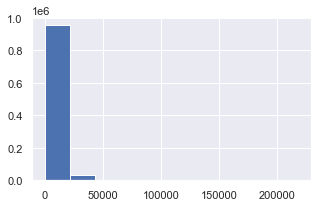

-------------------------
list_price
-------------------------


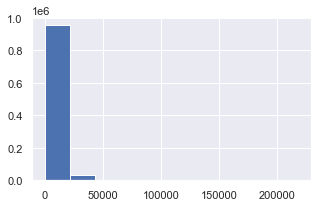

-------------------------
Discount%
-------------------------


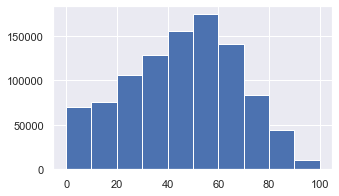

-------------------------
units
-------------------------


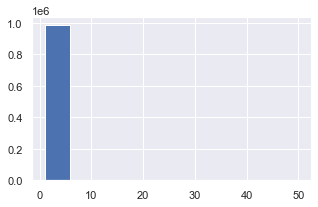

-------------------------
deliverybdays
-------------------------


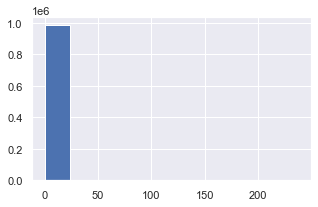

-------------------------
deliverycdays
-------------------------


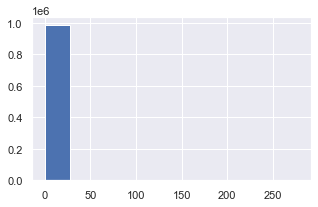

-------------------------
sla
-------------------------


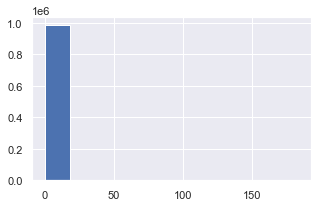

-------------------------
product_mrp
-------------------------


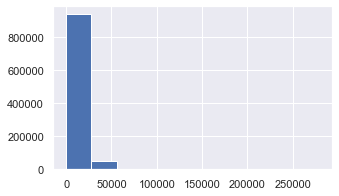

-------------------------
product_procurement_sla
-------------------------


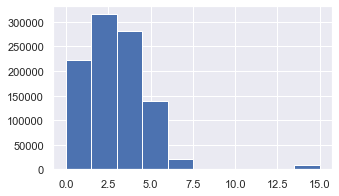

-------------------------
payday_flag
-------------------------


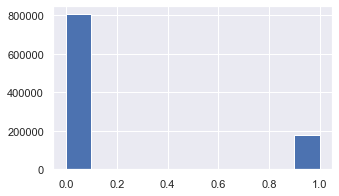

-------------------------
ocassion_flag
-------------------------


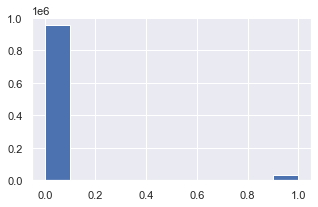

In [83]:
for col in main_df.describe().columns:
    print('-------------------------')
    print(col)
    print('-------------------------')
    sns.set(rc = {'figure.figsize' : (5,3)} )
    main_df[col].hist()
    plt.show()

Finding out categorical columns 

In [84]:
cat_var = [cname for cname in main_df.columns if
           main_df[cname].dtype == 'object']

main_df[cat_var].describe().T

,count,unique,top,freq
Year,987108,2,2016,526374
Month,987108,11,10,187514
Week,987108,40,42,106422
s1_fact.order_payment_type,987108,2,cod,698304
pincode,987108.0,4306.0,-9030000000000000000.0,5061.0
product_analytic_category,987108,5,entertainmentsmall,560479
product_analytic_sub_category,987108,14,speaker,325815
product_analytic_vertical,987108,73,laptopspeaker,161280
product_type,987108,2,mass_market,789989


### Treating the outliers 

In [85]:
# Function to plot the distribution plot of the numeric variable list

numeric_variables=['gmv','list_price','Discount%','deliverybdays','deliverycdays','sla','product_mrp','product_procurement_sla']

#Function to plot the distribution plot of the numeric variable list
def univariate_continuos(var_list):
    plt.figure(figsize=(12,6))
    for var in var_list:
        plt.subplot(2,4,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=main_df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()

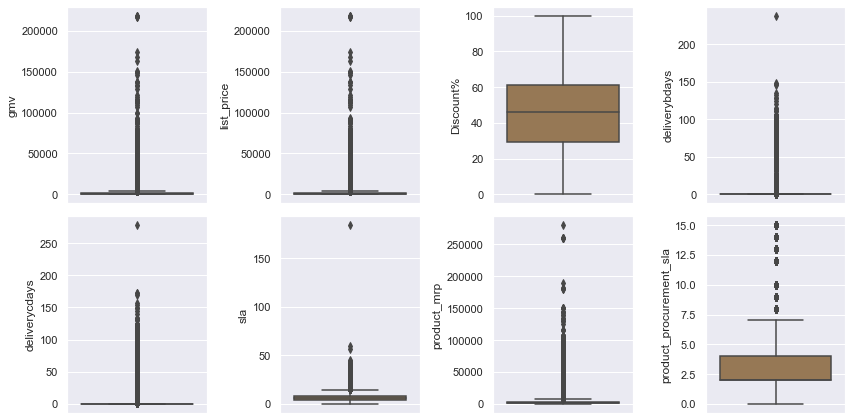

In [86]:
univariate_continuos(numeric_variables)

In [87]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%

main_df[numeric_variables].describe(percentiles = [.25, .5, .75, .90, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
gmv,987108.0,2567.241045,5701.852805,0.0,370.00,799.00,1999.00,4499.00,16990.00,29990.00,218500.0
list_price,987108.0,2532.085562,5618.105192,0.0,363.00,797.00,1999.00,4463.00,16284.75,27990.00,218500.0
Discount%,987108.0,45.266304,22.312550,0.0,29.47,46.26,61.39,73.98,80.72,90.05,100.0
deliverybdays,987108.0,0.458461,2.122794,0.0,0.00,0.00,0.00,0.00,4.00,7.00,238.0
deliverycdays,987108.0,0.534595,2.475902,0.0,0.00,0.00,0.00,0.00,5.00,9.00,278.0
sla,987108.0,5.837936,2.726304,0.0,4.00,6.00,8.00,9.00,10.00,13.00,184.0
product_mrp,987108.0,4439.888868,8932.478449,49.0,899.00,1700.00,3499.00,7995.00,24999.00,46950.00,280000.0
product_procurement_sla,987108.0,2.746014,1.864930,0.0,2.00,2.00,4.00,5.00,5.00,7.00,15.0


After analyzing the distribution of values of the above attributes at different percentiles, we come to the following conclusion:
'gmv', 'list_price' and 'mrp' values can have occassional outliers owing to the fact that there are seldom some high value sales. These records are less frequent and not at all at random.
'Discount%' can also be more in case on certain products. Specifically, a discount percentage of 100% would mena, the product came free with some other product.
On ther hand, unusually high values of 'deliverybdays', 'deliverycdays' and 'sla' seem to be erroneous data. So we will find a way to treat these outlier values so that they do not affect the predictive model while at the same time there will be enough data to build a generalizable model.

In [88]:
main_df[['deliverybdays', 'deliverycdays', 'sla']].quantile([.95, .99])

,deliverybdays,deliverycdays,sla
0.95,4.0,5.0,10.0
0.99,7.0,9.0,13.0


Let us assume any observation above 99 percentile for a variable is considered as an outlier for that variable.

#### Percentage of Outliers in column deliverybdays

In [89]:
print(round(100*(main_df[main_df['deliverybdays'] > 7.0].shape[0] / main_df.shape[0]),4))

0.8634


#### Percentage of Outliers in column deliverycdays

In [90]:
print(round(100*(main_df[main_df['deliverycdays'] > 9.0].shape[0] / main_df.shape[0]),4))

0.5924


#### Percentage of Outliers in column sla

In [91]:
print(round(100*(main_df[main_df['sla'] > 13.0].shape[0] / main_df.shape[0]),4))

0.8381


### Capping value above or below a certain percentile:
For the variables - 'SLA', 'deliverybdays', 'deliverybdays', 'gmv', 'product_mrp', 'list_price' where outliers are present, we will CAP the values above 99 percentile to the value corresponding to 99 percentile.

In [92]:
# Updating the outlier values with values corresponding to pre-decided percentiles
main_df['deliverybdays'][np.abs(main_df['deliverybdays'] > 8.0)] = 8.0
main_df['deliverycdays'][np.abs(main_df['deliverycdays'] > 10.0)] = 10.0
main_df['sla'][np.abs(main_df['sla'] > 13.0)] = 13.0

<ipython-input-92-7f7e454ce207>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['deliverybdays'][np.abs(main_df['deliverybdays'] > 8.0)] = 8.0
<ipython-input-92-7f7e454ce207>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['deliverycdays'][np.abs(main_df['deliverycdays'] > 10.0)] = 10.0
<ipython-input-92-7f7e454ce207>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['sla'][np.abs(main_df['sla'] > 13.0)] = 13.0

In [93]:
print(round(100*(main_df.shape[0] / initial_shape[0])))

94


So 89% records have been retained after outlier treatment

In [94]:
main_df.describe(percentiles = [.25, .5, .75, .90, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
gmv,987108.0,2567.241045,5701.852805,0.0,370.00,799.00,1999.00,4499.00,16990.00,29990.00,218500.0
list_price,987108.0,2532.085562,5618.105192,0.0,363.00,797.00,1999.00,4463.00,16284.75,27990.00,218500.0
Discount%,987108.0,45.266304,22.312550,0.0,29.47,46.26,61.39,73.98,80.72,90.05,100.0
units,987108.0,1.021828,0.271639,1.0,1.00,1.00,1.00,1.00,1.00,2.00,50.0
deliverybdays,987108.0,0.424206,1.465741,0.0,0.00,0.00,0.00,0.00,4.00,7.00,8.0
deliverycdays,987108.0,0.497974,1.725561,0.0,0.00,0.00,0.00,0.00,5.00,9.00,10.0
sla,987108.0,5.816543,2.641367,0.0,4.00,6.00,8.00,9.00,10.00,13.00,13.0
product_mrp,987108.0,4439.888868,8932.478449,49.0,899.00,1700.00,3499.00,7995.00,24999.00,46950.00,280000.0
product_procurement_sla,987108.0,2.746014,1.864930,0.0,2.00,2.00,4.00,5.00,5.00,7.00,15.0
payday_flag,987108.0,0.182469,0.386231,0.0,0.00,0.00,0.00,1.00,1.00,1.00,1.0


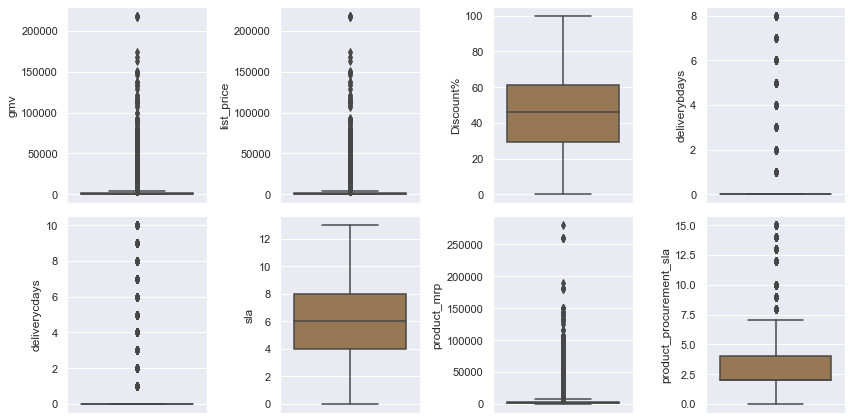

In [95]:
univariate_continuos(numeric_variables)

In [96]:
main_df[numeric_variables].skew()

gmv                        4.605049
list_price                 4.583712
Discount%                 -0.121867
deliverybdays              3.564650
deliverycdays              3.619791
sla                        0.375725
product_mrp                3.923673
product_procurement_sla    2.597027
dtype: float64

C:\Users\athar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\athar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\athar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

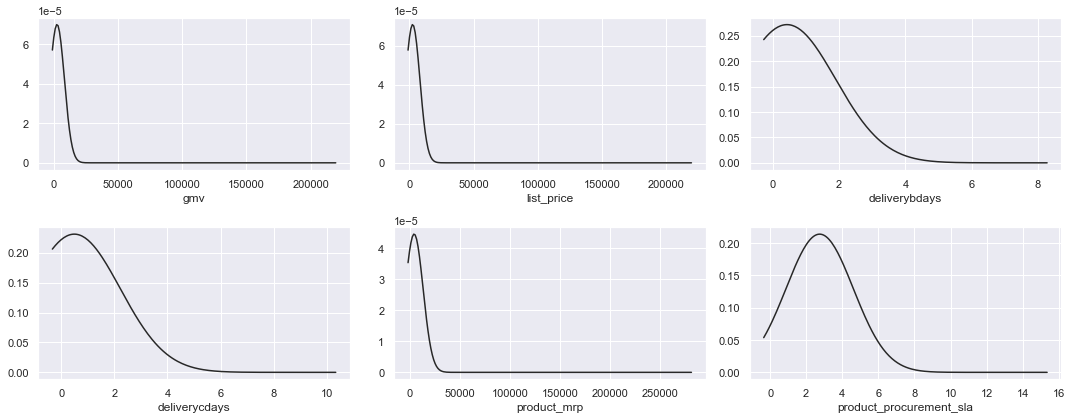

In [97]:
num_col = ['gmv','list_price', 'deliverybdays', 'deliverycdays', 'product_mrp', 'product_procurement_sla']

#Function to plot the distribution plot of the numeric variable list
def distplots(var_list):
    plt.figure(figsize = (15,6))
    for var in var_list:
        plt.subplot(2,3, var_list.index(var) + 1 )
        sns.distplot(main_df[var], fit = norm, kde = False, hist = False)
         #sns.boxplot(y=var,palette='cubehelix', data=main_df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    plt.show()
distplots(num_col)    

In [98]:
main_df.isnull().values.any()

False

### Mapping months to number of weeks for the month
Below function takes input an year and generates the numbers of the weeks for each month in it# 

In [99]:
import calendar

def WeekFinderFromYear(year):
        """ will return all the week from selected year """

        import datetime

        WEEK = {'MONDAY':0,'TUESDAY':1,'WEDNESDAY':2,'THURSDAY':3,'FRIDAY':4,'SATURDAY':5,'SUNDAY':6}
        MONTH = {'JANUARY':1,'FEBRUARY':2,'MARCH':3,'APRIL':4,'MAY':5,'JUNE':6,'JULY':7,'AUGUST':8,'SEPTEMBER':9,'OCTOBER':10,'NOVEMBER':11,'DECEMBER':12}

        year = int(year)
        month = MONTH['JANUARY']
        day = WEEK['MONDAY']

        dt = datetime.date(year, month, 1)
        dow_lst = []

        while dt.weekday() != day:
            dt = dt + datetime.timedelta(days = 1)

        lst_month = MONTH.values()

        for mont in lst_month:
         while dt.month == mont:
            dow_lst.append(dt)
            dt = dt + datetime.timedelta(days=7)
            
        month_number_week = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}
        month_name_week = {'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[], 'Jun':[], 'Jul':[], 'Aug':[], 'Sep':[], 'Oct':[], 'Nov':[], 'Dec':[]}

        for each in dow_lst:
            month_number_week[each.month].append(each.isocalendar()[1])
            month_name_week[calendar.month_abbr[each.month]].append(each.isocalendar()[1])

        return month_number_week, month_name_week

In [100]:
dict_number_2015, dict_name_2015 = WeekFinderFromYear(2015)
print(dict_number_2015)
print()
print(dict_name_2015)

print()

dict_number_2016, dict_name_2016 = WeekFinderFromYear(2016)
print(dict_number_2016)
print()
print(dict_name_2016)

{1: [2, 3, 4, 5], 2: [6, 7, 8, 9], 3: [10, 11, 12, 13, 14], 4: [15, 16, 17, 18], 5: [19, 20, 21, 22], 6: [23, 24, 25, 26, 27], 7: [28, 29, 30, 31], 8: [32, 33, 34, 35, 36], 9: [37, 38, 39, 40], 10: [41, 42, 43, 44], 11: [45, 46, 47, 48, 49], 12: [50, 51, 52, 53]}

{'Jan': [2, 3, 4, 5], 'Feb': [6, 7, 8, 9], 'Mar': [10, 11, 12, 13, 14], 'Apr': [15, 16, 17, 18], 'May': [19, 20, 21, 22], 'Jun': [23, 24, 25, 26, 27], 'Jul': [28, 29, 30, 31], 'Aug': [32, 33, 34, 35, 36], 'Sep': [37, 38, 39, 40], 'Oct': [41, 42, 43, 44], 'Nov': [45, 46, 47, 48, 49], 'Dec': [50, 51, 52, 53]}

{1: [1, 2, 3, 4], 2: [5, 6, 7, 8, 9], 3: [10, 11, 12, 13], 4: [14, 15, 16, 17], 5: [18, 19, 20, 21, 22], 6: [23, 24, 25, 26], 7: [27, 28, 29, 30], 8: [31, 32, 33, 34, 35], 9: [36, 37, 38, 39], 10: [40, 41, 42, 43, 44], 11: [45, 46, 47, 48], 12: [49, 50, 51, 52]}

{'Jan': [1, 2, 3, 4], 'Feb': [5, 6, 7, 8, 9], 'Mar': [10, 11, 12, 13], 'Apr': [14, 15, 16, 17], 'May': [18, 19, 20, 21, 22], 'Jun': [23, 24, 25, 26], 'Jul': [27,

In [101]:
num_weeks_2015 = 0
num_weeks_2016 = 0

for i in dict_number_2015:
    if i >= 7:
        num_weeks_2015 += len(dict_number_2015[i])

for i in dict_number_2016:
    if i <= 6:
        num_weeks_2016 += len(dict_number_2016[i])

total_weeks = num_weeks_2015 + num_weeks_2016
total_weeks

52

### Media Investment
We will generate weekly data from Year and Month for the media investment data

In [102]:
media_investment.head(3)

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
media_investment.drop(['Unnamed: 13', 'Unnamed: 14','Unnamed: 15', 'Unnamed: 16','Unnamed: 17', 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20','Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23','Unnamed: 24', 'Unnamed: 25'], axis = 1, inplace = True)

In [104]:
media_investment['Radio'].fillna(value = 0, inplace = True)
media_investment['Other'].fillna(value = 0, inplace = True)

In [105]:
media_investment.Radio.dtypes

dtype('float64')

In [106]:
# Temp DataFrame

temp_media_investment = pd.DataFrame(index=range(total_weeks), columns=['Year', 'Month', 'Week', 'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'])

temp_media_investment.head(3)

,Year,Month,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We divide the monthly values by the number of weeks in that month and take that as weekly data

In [107]:
i = 0

for index, row in media_investment.iterrows():

    if row.Year == 2015:

        num_weeks = len(dict_number_2015[row.Month])

        for week in dict_number_2015[row.Month]:
            
            temp_media_investment.iloc[i].Year = row.Year
            temp_media_investment.iloc[i].Month = row.Month
            temp_media_investment.iloc[i]['Week'] = week
            temp_media_investment.iloc[i]['Total Investment'] = round(row['Total Investment'] / num_weeks, 3)
            temp_media_investment.iloc[i]['TV'] = round(row['TV'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Digital'] = round(row['Digital'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Sponsorship'] = round(row['Sponsorship'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Content Marketing'] = round(row['Content Marketing'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Online marketing'] = round(row['Online marketing'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Affiliates'] = round(row[' Affiliates'] / num_weeks, 3)
            temp_media_investment.iloc[i]['SEM'] = round(row['SEM'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Radio'] = round(row['Radio'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Other'] = round(row['Other'] / num_weeks, 3)
            
            i+=1

    elif row.Year == 2016:
        
        num_weeks = len(dict_number_2016[row.Month])

        for week in dict_number_2016[row.Month]:
            
            temp_media_investment.iloc[i].Year = row.Year
            temp_media_investment.iloc[i].Month = row.Month
            temp_media_investment.iloc[i]['Week'] = week
            temp_media_investment.iloc[i]['Total Investment'] = round(row['Total Investment'] / num_weeks, 3)
            temp_media_investment.iloc[i]['TV'] = round(row['TV'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Digital'] = round(row['Digital'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Sponsorship'] = round(row['Sponsorship'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Content Marketing'] = round(row['Content Marketing'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Online marketing'] = round(row['Online marketing'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Affiliates'] = round(row[' Affiliates'] / num_weeks, 3)
            temp_media_investment.iloc[i]['SEM'] = round(row['SEM'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Radio'] = round(row['Radio'] / num_weeks, 3)
            temp_media_investment.iloc[i]['Other'] = round(row['Other'] / num_weeks, 3)
            
            i+=1

temp_media_investment.head(3)

,Year,Month,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.0,7.0,28,4.265,0.054,0.633,1.854,0.0,0.332,0.137,1.256,0.0,0.0
1,2015.0,7.0,29,4.265,0.054,0.633,1.854,0.0,0.332,0.137,1.256,0.0,0.0
2,2015.0,7.0,30,4.265,0.054,0.633,1.854,0.0,0.332,0.137,1.256,0.0,0.0


In [108]:
temp_media_investment['Week'] = temp_media_investment['Week'].astype('str')

In [109]:
media_investment = temp_media_investment
media_investment.head(3)

,Year,Month,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.0,7.0,28,4.265,0.054,0.633,1.854,0.0,0.332,0.137,1.256,0.0,0.0
1,2015.0,7.0,29,4.265,0.054,0.633,1.854,0.0,0.332,0.137,1.256,0.0,0.0
2,2015.0,7.0,30,4.265,0.054,0.633,1.854,0.0,0.332,0.137,1.256,0.0,0.0


In [110]:
media_investment.duplicated('Week').value_counts()

False    52
dtype: int64

No duplicate

In [111]:
media_investment.isnull().values.any()

False

No Null

In [112]:
del media_investment['Year']
del media_investment['Month']

In [113]:
media_investment.head(3)

,Week,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,28,4.265,0.054,0.633,1.854,0.0,0.332,0.137,1.256,0.0,0.0
1,29,4.265,0.054,0.633,1.854,0.0,0.332,0.137,1.256,0.0,0.0
2,30,4.265,0.054,0.633,1.854,0.0,0.332,0.137,1.256,0.0,0.0


In [114]:
original_col = media_investment.columns[1:]
original_col

Index(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],
      dtype='object')

### Calculating 8-weeks Exponential Moving Average for all Advertising media channels

In [115]:
def EMA_variables(df,var,n):
    for i in var:
        loc_index = df.columns.get_loc(i) + 1
        df.insert(loc=loc_index,column= i+'_EMA_'+np.str(n),value=df[i].rolling(window=n).mean())
    return df

In [116]:
media_investment = EMA_variables(media_investment, original_col, 8 )
media_investment.head(3)

<ipython-input-115-786137f41faa>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.insert(loc=loc_index,column= i+'_EMA_'+np.str(n),value=df[i].rolling(window=n).mean())


,Week,Total Investment,Total Investment_EMA_8,TV,TV_EMA_8,Digital,Digital_EMA_8,Sponsorship,Sponsorship_EMA_8,Content Marketing,Content Marketing_EMA_8,Online marketing,Online marketing_EMA_8,Affiliates,Affiliates_EMA_8,SEM,SEM_EMA_8,Radio,Radio_EMA_8,Other,Other_EMA_8
0,28,4.265,NaN,0.054,NaN,0.633,NaN,1.854,NaN,0.0,NaN,0.332,NaN,0.137,NaN,1.256,NaN,0.0,NaN,0.0,NaN
1,29,4.265,NaN,0.054,NaN,0.633,NaN,1.854,NaN,0.0,NaN,0.332,NaN,0.137,NaN,1.256,NaN,0.0,NaN,0.0,NaN
2,30,4.265,NaN,0.054,NaN,0.633,NaN,1.854,NaN,0.0,NaN,0.332,NaN,0.137,NaN,1.256,NaN,0.0,NaN,0.0,NaN


### Calculating 5-weeks Simple Moving Average for all Advertising media channels

In [117]:
def SMA_variables(df,var,n):
    for i in var:
        loc_index = df.columns.get_loc(i) + 1
        
        df.insert(loc=loc_index,column= i+'_SMA_'+np.str(n),value=df[i].rolling(window=n).mean())
    return df

In [118]:
media_investment = SMA_variables(media_investment, original_col, 5 )
media_investment.head(3)

<ipython-input-117-52cf6e24ce9b>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.insert(loc=loc_index,column= i+'_SMA_'+np.str(n),value=df[i].rolling(window=n).mean())


,Week,Total Investment,Total Investment_SMA_5,Total Investment_EMA_8,TV,TV_SMA_5,TV_EMA_8,Digital,Digital_SMA_5,Digital_EMA_8,Sponsorship,Sponsorship_SMA_5,Sponsorship_EMA_8,Content Marketing,Content Marketing_SMA_5,Content Marketing_EMA_8,Online marketing,Online marketing_SMA_5,Online marketing_EMA_8,Affiliates,Affiliates_SMA_5,Affiliates_EMA_8,SEM,SEM_SMA_5,SEM_EMA_8,Radio,Radio_SMA_5,Radio_EMA_8,Other,Other_SMA_5,Other_EMA_8
0,28,4.265,NaN,NaN,0.054,NaN,NaN,0.633,NaN,NaN,1.854,NaN,NaN,0.0,NaN,NaN,0.332,NaN,NaN,0.137,NaN,NaN,1.256,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1,29,4.265,NaN,NaN,0.054,NaN,NaN,0.633,NaN,NaN,1.854,NaN,NaN,0.0,NaN,NaN,0.332,NaN,NaN,0.137,NaN,NaN,1.256,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2,30,4.265,NaN,NaN,0.054,NaN,NaN,0.633,NaN,NaN,1.854,NaN,NaN,0.0,NaN,NaN,0.332,NaN,NaN,0.137,NaN,NaN,1.256,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN


### Calculating 3-weeks Simple Moving Average for all Advertising media channels

In [119]:
media_investment = SMA_variables(media_investment,original_col,3) 
media_investment.head(3)

<ipython-input-117-52cf6e24ce9b>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.insert(loc=loc_index,column= i+'_SMA_'+np.str(n),value=df[i].rolling(window=n).mean())


,Week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8
0,28,4.265,NaN,NaN,NaN,0.054,NaN,NaN,NaN,0.633,NaN,NaN,NaN,1.854,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.332,NaN,NaN,NaN,0.137,NaN,NaN,NaN,1.256,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,29,4.265,NaN,NaN,NaN,0.054,NaN,NaN,NaN,0.633,NaN,NaN,NaN,1.854,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.332,NaN,NaN,NaN,0.137,NaN,NaN,NaN,1.256,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,30,4.265,4.265,NaN,NaN,0.054,0.054,NaN,NaN,0.633,0.633,NaN,NaN,1.854,1.854,NaN,NaN,0.0,0.0,NaN,NaN,0.332,0.332,NaN,NaN,0.137,0.137,NaN,NaN,1.256,1.256,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [120]:
def calculate_ad_stocks(data, engagement_factor):
    
    """initialize ad stock vectors"""
    TV_ad_stock_vector = []                     
    Digital_ad_stock_vector = []
    Sponsorship_ad_stock_vector = []
    Content_Marketing_ad_stock_vector = []
    Online_marketing_ad_stock_vector = []
    Affiliates_ad_stock_vector = []
    SEM_ad_stock_vector = []
    Radio_ad_stock_vector = []
    Other_ad_stock_vector = []
    Total_Investment_ad_stock_vector = []
    
    """initialize ad_stock_value"""
    tv_ad_stock_value = 0 
    Digital_ad_stock_value = 0
    Sponsorship_ad_stock_value = 0
    Content_Marketing_ad_stock_value = 0
    Online_marketing_ad_stock_value = 0
    Affiliates_ad_stock_value = 0
    SEM_ad_stock_value = 0
    Radio_ad_stock_value = 0
    Other_ad_stock_value = 0
    Total_Investment_ad_stock_value = 0
    
    """loop through dataset to calculate adstock values. The formula for adstock is: At = Xt + adstock rate * At-1."""
    for index, row in data.iterrows():
        tv_ad_stock_value = row['TV'] + engagement_factor * tv_ad_stock_value
        TV_ad_stock_vector.append(tv_ad_stock_value)
        Digital_ad_stock_value = row['Digital'] + engagement_factor * Digital_ad_stock_value
        Digital_ad_stock_vector.append(Digital_ad_stock_value)
        Sponsorship_ad_stock_value = row['Sponsorship'] + engagement_factor * Sponsorship_ad_stock_value
        Sponsorship_ad_stock_vector.append(Sponsorship_ad_stock_value)
        Content_Marketing_ad_stock_value = row['Content Marketing'] + engagement_factor * Content_Marketing_ad_stock_value
        Content_Marketing_ad_stock_vector.append(Content_Marketing_ad_stock_value)    
        Online_marketing_ad_stock_value = row['Online marketing'] + engagement_factor * Online_marketing_ad_stock_value
        Online_marketing_ad_stock_vector.append(Online_marketing_ad_stock_value)
        Affiliates_ad_stock_value = row['Affiliates'] + engagement_factor * Affiliates_ad_stock_value
        Affiliates_ad_stock_vector.append(Affiliates_ad_stock_value)
        SEM_ad_stock_value = row['SEM'] + engagement_factor * SEM_ad_stock_value
        SEM_ad_stock_vector.append(SEM_ad_stock_value)
        Radio_ad_stock_value = row['Radio'] + engagement_factor * Radio_ad_stock_value
        Radio_ad_stock_vector.append(Radio_ad_stock_value)
        Other_ad_stock_value = row['Other'] + engagement_factor * Other_ad_stock_value
        Other_ad_stock_vector.append(Other_ad_stock_value)
        Total_Investment_ad_stock_value = row['Total Investment'] + engagement_factor * Total_Investment_ad_stock_value
        Total_Investment_ad_stock_vector.append(Total_Investment_ad_stock_value)
    
    """add ad stock vector to dataset"""
    loc_index = data.columns.get_loc('TV_EMA_8') + 1
    data.insert(loc=loc_index,column='TV_Ad_Stock',value=TV_ad_stock_vector)
    loc_index = data.columns.get_loc('Digital_EMA_8') + 1
    data.insert(loc=loc_index,column='Digital_Ad_Stock',value=Digital_ad_stock_vector)
    loc_index = data.columns.get_loc('Sponsorship_EMA_8') + 1
    data.insert(loc=loc_index,column='Sponsorship_Ad_Stock',value=Sponsorship_ad_stock_vector)
    loc_index = data.columns.get_loc('Content Marketing_EMA_8') + 1
    data.insert(loc=loc_index,column='Content_Marketing_Ad_Stock',value=Content_Marketing_ad_stock_vector)
    loc_index = data.columns.get_loc('Online marketing_EMA_8') + 1
    data.insert(loc=loc_index,column='Online_marketing_Ad_Stock',value=Online_marketing_ad_stock_vector)
    loc_index = data.columns.get_loc('Affiliates_EMA_8') + 1
    data.insert(loc=loc_index,column='Affiliates_Ad_Stock',value=Affiliates_ad_stock_vector)
    loc_index = data.columns.get_loc('SEM_EMA_8') + 1
    data.insert(loc=loc_index,column='SEM_Ad_Stock',value=SEM_ad_stock_vector)
    loc_index = data.columns.get_loc('Radio_EMA_8') + 1
    data.insert(loc=loc_index,column='Radio_Ad_Stock',value=Radio_ad_stock_vector)
    loc_index = data.columns.get_loc('Other_EMA_8') + 1
    data.insert(loc=loc_index,column='Other_Ad_Stock',value=Other_ad_stock_vector)
    loc_index = data.columns.get_loc('Total Investment_EMA_8') + 1
    data.insert(loc=loc_index,column='Total_Investment_Ad_Stock',value=Total_Investment_ad_stock_vector)
    
    return data

Assuming the value of Adstock rate(engagement factor)

In [121]:
media_investment = calculate_ad_stocks(data=media_investment, engagement_factor=0.6)
media_investment.head(3)

,Week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock
0,28,4.265,NaN,NaN,NaN,4.2650,0.054,NaN,NaN,NaN,0.05400,0.633,NaN,NaN,NaN,0.63300,1.854,NaN,NaN,NaN,1.85400,0.0,NaN,NaN,NaN,0.0,0.332,NaN,NaN,NaN,0.33200,0.137,NaN,NaN,NaN,0.13700,1.256,NaN,NaN,NaN,1.25600,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
1,29,4.265,NaN,NaN,NaN,6.8240,0.054,NaN,NaN,NaN,0.08640,0.633,NaN,NaN,NaN,1.01280,1.854,NaN,NaN,NaN,2.96640,0.0,NaN,NaN,NaN,0.0,0.332,NaN,NaN,NaN,0.53120,0.137,NaN,NaN,NaN,0.21920,1.256,NaN,NaN,NaN,2.00960,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
2,30,4.265,4.265,NaN,NaN,8.3594,0.054,0.054,NaN,NaN,0.10584,0.633,0.633,NaN,NaN,1.24068,1.854,1.854,NaN,NaN,3.63384,0.0,0.0,NaN,NaN,0.0,0.332,0.332,NaN,NaN,0.65072,0.137,0.137,NaN,NaN,0.26852,1.256,1.256,NaN,NaN,2.46176,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0


In [122]:
media_investment.fillna(value = 0, inplace = True)
media_investment.head(3)

,Week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock
0,28,4.265,0.000,0.0,0.0,4.2650,0.054,0.000,0.0,0.0,0.05400,0.633,0.000,0.0,0.0,0.63300,1.854,0.000,0.0,0.0,1.85400,0.0,0.0,0.0,0.0,0.0,0.332,0.000,0.0,0.0,0.33200,0.137,0.000,0.0,0.0,0.13700,1.256,0.000,0.0,0.0,1.25600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,4.265,0.000,0.0,0.0,6.8240,0.054,0.000,0.0,0.0,0.08640,0.633,0.000,0.0,0.0,1.01280,1.854,0.000,0.0,0.0,2.96640,0.0,0.0,0.0,0.0,0.0,0.332,0.000,0.0,0.0,0.53120,0.137,0.000,0.0,0.0,0.21920,1.256,0.000,0.0,0.0,2.00960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30,4.265,4.265,0.0,0.0,8.3594,0.054,0.054,0.0,0.0,0.10584,0.633,0.633,0.0,0.0,1.24068,1.854,1.854,0.0,0.0,3.63384,0.0,0.0,0.0,0.0,0.0,0.332,0.332,0.0,0.0,0.65072,0.137,0.137,0.0,0.0,0.26852,1.256,1.256,0.0,0.0,2.46176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
media_investment.shape

(52, 51)

### NPS Score
We will generate weekly data from Year and Month for the nps score data

In [124]:
net_promoter_score

,score,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NPS,54.599588,59.987101,46.925419,44.398389,47.0,45.8,47.093031,50.327406,49.02055,51.827605,47.306951,50.516687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Stock Index,1177.000000,1206.000000,1101.000000,1210.000000,1233.0,1038.0,1052.000000,1222.000000,1015.00000,1242.000000,1228.000000,1194.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
net_promoter_score.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'], axis = 1, inplace = True)

#### Getting the dataset into suitable format

In [126]:
net_promoter_score.reset_index(drop = True, inplace = True)
net_promoter_score = net_promoter_score.T
net_promoter_score.reset_index(drop = False, inplace = True)
net_promoter_score.columns = ['Month', 'NPS', 'Stock Index']
net_promoter_score.drop(net_promoter_score.index[0], inplace = True)
net_promoter_score

,Month,NPS,Stock Index
1,July'15,54.599588,1177.0
2,Aug'15,59.987101,1206.0
3,Sept'15,46.925419,1101.0
4,Oct'15,44.398389,1210.0
5,Nov'15,47.0,1233.0
6,Dec'15,45.8,1038.0
7,Jan'16,47.093031,1052.0
8,Feb'16,50.327406,1222.0
9,Mar'16,49.02055,1015.0
10,Apr'16,51.827605,1242.0


In [127]:
# Temp DataFrame
temp_nps = pd.DataFrame(index = range(total_weeks), columns = ['Year', 'Month', 'Week', 'NPS', 'Stock Index'])
temp_nps.head(3)

,Year,Month,Week,NPS,Stock Index
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN


We use the same NPS Score and Stock Index values for each week of a month which is the NPS Score and Stock Index of the entire month

In [128]:
i = 0

for index, row in net_promoter_score.iterrows():

    if '15' in row['Month']:
        
        month = re.split("[']", row['Month'])[0][0:3]
    
        for week in dict_name_2015[month]:        
            
            temp_nps.iloc[i].Year = 2015
            temp_nps.iloc[i].Month = month
            temp_nps.iloc[i].Week = week
            temp_nps.iloc[i].NPS = row['NPS']
            temp_nps.iloc[i]['Stock Index'] = row['Stock Index']
            
            i+=1
        
    elif '16' in row['Month']:

        month = re.split("[']", row['Month'])[0][0:3]
    
        for week in dict_name_2016[month]:        
            
            temp_nps.iloc[i].Year = 2016
            temp_nps.iloc[i].Month = month
            temp_nps.iloc[i].Week = week
            temp_nps.iloc[i].NPS = row['NPS']
            temp_nps.iloc[i]['Stock Index'] = row['Stock Index']
            
            i+=1

temp_nps.head()

,Year,Month,Week,NPS,Stock Index
0,2015,Jul,28,54.599588,1177.0
1,2015,Jul,29,54.599588,1177.0
2,2015,Jul,30,54.599588,1177.0
3,2015,Jul,31,54.599588,1177.0
4,2015,Aug,32,59.987101,1206.0


In [129]:
temp_nps['Week'] = temp_nps['Week'].astype('str')

In [130]:
net_promoter_score = temp_nps
net_promoter_score.head(3)

,Year,Month,Week,NPS,Stock Index
0,2015,Jul,28,54.599588,1177.0
1,2015,Jul,29,54.599588,1177.0
2,2015,Jul,30,54.599588,1177.0


In [131]:
net_promoter_score.duplicated('Week').value_counts()

False    52
dtype: int64

In [132]:
net_promoter_score.isnull().values.any()

False

In [133]:
del net_promoter_score['Year']
del net_promoter_score['Month']

In [134]:
net_promoter_score.head(3)

,Week,NPS,Stock Index
0,28,54.599588,1177.0
1,29,54.599588,1177.0
2,30,54.599588,1177.0


In [135]:
nps_original_col = net_promoter_score.columns[1:]
nps_original_col

Index(['NPS', 'Stock Index'], dtype='object')

### Calculating 5-weeks Simple Moving Average for NPS and Stock_Index


In [136]:
net_promoter_score = SMA_variables(net_promoter_score, nps_original_col, 5)
net_promoter_score.head(3)

<ipython-input-117-52cf6e24ce9b>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.insert(loc=loc_index,column= i+'_SMA_'+np.str(n),value=df[i].rolling(window=n).mean())


,Week,NPS,NPS_SMA_5,Stock Index,Stock Index_SMA_5
0,28,54.599588,NaN,1177.0,NaN
1,29,54.599588,NaN,1177.0,NaN
2,30,54.599588,NaN,1177.0,NaN


### Calculating 5-weeks Simple Moving Average for NPS and Stock_Index

In [137]:
net_promoter_score = SMA_variables(net_promoter_score, nps_original_col, 3)
net_promoter_score.head(3)

<ipython-input-117-52cf6e24ce9b>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.insert(loc=loc_index,column= i+'_SMA_'+np.str(n),value=df[i].rolling(window=n).mean())


,Week,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5
0,28,54.599588,NaN,NaN,1177.0,NaN,NaN
1,29,54.599588,NaN,NaN,1177.0,NaN,NaN
2,30,54.599588,54.599588,NaN,1177.0,1177.0,NaN


In [138]:
net_promoter_score.fillna(value = 0, inplace = True)
net_promoter_score.head(3)

,Week,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5
0,28,54.599588,0.000000,0.0,1177.0,0.0,0.0
1,29,54.599588,0.000000,0.0,1177.0,0.0,0.0
2,30,54.599588,54.599588,0.0,1177.0,1177.0,0.0


## Sale Calendar
We will generate weekly data from Year and Month for the sale calendar data 

In [139]:
sales_calendar

,Unnamed: 1,Sales Calendar
0,2015,(18-19th July)
1,2015,(15-17th Aug)
2,2015,(28-30th Aug)
3,2015,(17-15th Oct)
4,2015,(7-14th Nov)
5,2015,(25th Dec'15 - 3rd Jan'16)
6,2016,(20-22 Jan)
7,2016,(1-2 Feb)
8,2016,(20-21 Feb)
9,2016,(14-15 Feb)


In [140]:
# Getting the data into required format

sales_calendar.columns = ['Year', 'Sale']

sales_calendar.Year = sales_calendar.Year.apply(lambda x: int(x))
sales_calendar.Sale = sales_calendar.Sale.apply(lambda x: x.replace('th','').strip())
sales_calendar.Sale = sales_calendar.Sale.apply(lambda x: x.replace('rd','').strip())
sales_calendar.Sale = sales_calendar.Sale.apply(lambda x: x.replace('(','').strip())
sales_calendar.Sale = sales_calendar.Sale.apply(lambda x: x.replace(')','').strip())

# Splitting 25-31 Dec into two different rows for the ease of weekly data generation

sales_calendar.iloc[5, sales_calendar.columns.get_loc('Sale')] = '25-31 Dec'
sales_calendar = sales_calendar.append({'Year' : 2016 , 'Sale' : '1-3 Jan'} , ignore_index=True)

sales_calendar.sort_values(by=['Year'], ascending = True, inplace = True)

sales_calendar

,Year,Sale
0,2015,18-19 July
1,2015,15-17 Aug
2,2015,28-30 Aug
3,2015,17-15 Oct
4,2015,7-14 Nov
5,2015,25-31 Dec
6,2016,20-22 Jan
7,2016,1-2 Feb
8,2016,20-21 Feb
9,2016,14-15 Feb


In [141]:
# Dropping '17-15 Oct' entry assuming it is erroneous

sales_calendar.drop(sales_calendar.index[3], inplace = True)

sales_calendar

,Year,Sale
0,2015,18-19 July
1,2015,15-17 Aug
2,2015,28-30 Aug
4,2015,7-14 Nov
5,2015,25-31 Dec
6,2016,20-22 Jan
7,2016,1-2 Feb
8,2016,20-21 Feb
9,2016,14-15 Feb
10,2016,7-9 Mar


In [142]:
temp_sales_calendar = pd.DataFrame(index = range(total_weeks), columns = ['Year', 'Month', 'Week', 'Sale'])
temp_sales_calendar.head(3)

,Year,Month,Week,Sale
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


%V - ISO 8601 week as a decimal number with Monday as the first day of the week.

We find the number of days in each week of a month on which there was a sale

In [143]:
i = 0
import datetime

for index, row in sales_calendar.iterrows():

    week_list = []
    month_list = []
    year_list = []

    date1, date2, month = re.split("[- ]", row.Sale)
    month = month[0:3] # Taking only the first 3 character of the month name
    year = row.Year
    
#     print("Date => {}-{}-{}".format(date1, month, year))
#     print(datetime.datetime.strptime('{}-{}-{}'.format(date1, month, year), "%d-%b-%Y").strftime("%V"))
#     print("Date => {}-{}-{}".format(date2, month, year))
#     print(datetime.datetime.strptime('{}-{}-{}'.format(date2, month, year), "%d-%b-%Y").strftime("%V"))
    
    date = int(date1)
    
    while date <= int(date2):
        
        # Extracting the week numbers of the range of dates in each month
        week = datetime.datetime.strptime('{}-{}-{}'.format(date, month, year), "%d-%b-%Y").strftime("%V")
        week_list.append(int(week))
        date+=1
    
    week_dict = dict.fromkeys(week_list, 0) # Generating a week list dictionary with default value as 0

    for j in week_list:
        week_dict[j] = week_dict[j] + 1

    for key, value in week_dict.items():
        temp_sales_calendar.iloc[i].Year = year
        temp_sales_calendar.iloc[i].Month = month
        temp_sales_calendar.iloc[i].Week = key
        temp_sales_calendar.iloc[i].Sale = value
        
        i+=1
    
temp_sales_calendar.dropna(axis=0, how='all', inplace=True) # Drop all rows which has all Nulls
temp_sales_calendar.sort_values(by=['Week'], ascending = True, inplace = True)

# Handling the special cases of 53 and 7 week numbers which appear twice
temp_sales_calendar.loc[temp_sales_calendar['Week'] == 53, 'Sale'] = temp_sales_calendar.loc[temp_sales_calendar['Week'] == 53, 'Sale'].sum()
temp_sales_calendar.loc[temp_sales_calendar['Week'] == 7, 'Sale'] = temp_sales_calendar.loc[temp_sales_calendar['Week'] == 7, 'Sale'].sum()

# Dropping the redundant 53 and 7 week numbers
temp_sales_calendar.drop_duplicates(subset=['Week'], keep='first', inplace=True)
temp_sales_calendar.reset_index(drop=True, inplace=True)

temp_sales_calendar.head()

,Year,Month,Week,Sale
0,2016,Jan,3,3
1,2016,Feb,5,2
2,2016,Feb,6,1
3,2016,Feb,7,3
4,2016,Mar,10,3


In [144]:
temp_sales_calendar['Week'] = temp_sales_calendar['Week'].astype('str') 

In [145]:
sales_calendar.head()

,Year,Sale
0,2015,18-19 July
1,2015,15-17 Aug
2,2015,28-30 Aug
4,2015,7-14 Nov
5,2015,25-31 Dec


In [146]:
sales_calendar = temp_sales_calendar
sales_calendar.head()

,Year,Month,Week,Sale
0,2016,Jan,3,3
1,2016,Feb,5,2
2,2016,Feb,6,1
3,2016,Feb,7,3
4,2016,Mar,10,3


In [147]:
sales_calendar.duplicated('Week').value_counts()

False    14
dtype: int64

In [148]:
sales_calendar.isnull().values.any()

False

In [149]:
del sales_calendar['Year']
del sales_calendar['Month']

In [150]:
sales_calendar.head()

,Week,Sale
0,3,3
1,5,2
2,6,1
3,7,3
4,10,3


## Climate 2015

In [151]:
climate_2015 = pd.read_csv(r"D:\Boston Institute of Analytics\Capstone Project\ONTARIO-2015.csv", skiprows = 24)
climate_2015.head(3)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,1/1/2015,2015,1,1,†,0.0,NaN,-8.5,NaN,-4.3,NaN,22.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,1/2/2015,2015,1,2,†,3.0,NaN,-3.0,NaN,0.0,NaN,18.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,2015,1,3,†,2.5,NaN,-4.0,NaN,-0.8,NaN,18.8,NaN,0.0,NaN,24.0,NaN,0.0,NaN,24.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


generating weekly data for climate 2015

In [152]:
climate_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [153]:
climate_2015.dropna(axis = 1, thresh = 1, inplace = True)
climate_2015.reset_index(drop = True, inplace = True)
climate_2015.head(3)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag
0,1/1/2015,2015,1,1,†,0.0,NaN,-8.5,NaN,-4.3,NaN,22.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
1,1/2/2015,2015,1,2,†,3.0,NaN,-3.0,NaN,0.0,NaN,18.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2,1/3/2015,2015,1,3,†,2.5,NaN,-4.0,NaN,-0.8,NaN,18.8,NaN,0.0,NaN,24.0,NaN,0.0,NaN,24.0,NaN,0.0,NaN


In [154]:
climate_2015.columns.value_counts()

Snow on Grnd (cm)     1
Min Temp Flag         1
Heat Deg Days Flag    1
Year                  1
Mean Temp (°C)        1
Total Snow (cm)       1
Heat Deg Days (°C)    1
Data Quality          1
Day                   1
Min Temp (°C)         1
Total Rain Flag       1
Month                 1
Total Precip Flag     1
Total Rain (mm)       1
Total Precip (mm)     1
Total Snow Flag       1
Cool Deg Days (°C)    1
Max Temp (°C)         1
Mean Temp Flag        1
Cool Deg Days Flag    1
Snow on Grnd Flag     1
Max Temp Flag         1
Date/Time             1
dtype: int64

In [155]:
# Dropping columns with only one distinct value

drop_cols = []

for col in climate_2015.columns:
    if 'Flag' in col:
        print(climate_2015[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

climate_2015.drop(drop_cols, axis=1, inplace=True)

print(climate_2015.columns)

M    13
Name: Max Temp Flag, dtype: int64

M    39
Name: Min Temp Flag, dtype: int64

M    39
Name: Mean Temp Flag, dtype: int64

M    39
Name: Heat Deg Days Flag, dtype: int64

M    39
Name: Cool Deg Days Flag, dtype: int64

T    7
Name: Total Rain Flag, dtype: int64

T    9
Name: Total Snow Flag, dtype: int64

T    12
Name: Total Precip Flag, dtype: int64

T    2
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [156]:
climate_2015.columns = [col.replace('(°C)', '').strip() for col in climate_2015.columns]
climate_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [157]:
climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          365 non-null    object 
 1   Year               365 non-null    int64  
 2   Month              365 non-null    int64  
 3   Day                365 non-null    int64  
 4   Max Temp           216 non-null    float64
 5   Min Temp           190 non-null    float64
 6   Mean Temp          190 non-null    float64
 7   Heat Deg Days      190 non-null    float64
 8   Cool Deg Days      190 non-null    float64
 9   Total Rain (mm)    229 non-null    float64
 10  Total Snow (cm)    229 non-null    float64
 11  Total Precip (mm)  229 non-null    float64
 12  Snow on Grnd (cm)  229 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 37.2+ KB


In [158]:
cols = ['Max Temp',
 'Min Temp',
 'Mean Temp',
 'Heat Deg Days',
 'Cool Deg Days',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)']

climate_2015.dropna(subset = cols, inplace = True)

climate_2015.reset_index(drop =  True, inplace  = True)

climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          190 non-null    object 
 1   Year               190 non-null    int64  
 2   Month              190 non-null    int64  
 3   Day                190 non-null    int64  
 4   Max Temp           190 non-null    float64
 5   Min Temp           190 non-null    float64
 6   Mean Temp          190 non-null    float64
 7   Heat Deg Days      190 non-null    float64
 8   Cool Deg Days      190 non-null    float64
 9   Total Rain (mm)    190 non-null    float64
 10  Total Snow (cm)    190 non-null    float64
 11  Total Precip (mm)  190 non-null    float64
 12  Snow on Grnd (cm)  190 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 19.4+ KB


In [159]:
# Extracting week # from the date field and formatting it

climate_2015['Week'] = climate_2015['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").strftime("%V"))

climate_2015['Week'] = climate_2015['Week'].apply(lambda x: str(x).lstrip('0'))

climate_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
0,1/1/2015,2015,1,1,0.0,-8.5,-4.3,22.3,0.0,0.0,0.0,0.0,0.0,1
1,1/2/2015,2015,1,2,3.0,-3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,1
2,1/3/2015,2015,1,3,2.5,-4.0,-0.8,18.8,0.0,24.0,0.0,24.0,0.0,1
3,1/4/2015,2015,1,4,2.5,0.0,1.3,16.7,0.0,0.0,1.0,1.0,0.0,1
4,1/5/2015,2015,1,5,-10.0,-13.5,-11.8,29.8,0.0,0.0,3.0,3.0,1.0,2


In [160]:
# Extraction of data from 2015 July 

climate_2015 = climate_2015[climate_2015['Month'] >= 7]

climate_2015.reset_index(drop = True, inplace =  True)

climate_2015.head(3)

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
0,7/1/2015,2015,7,1,24.5,17.0,20.8,0.0,2.8,0.0,0.0,0.0,0.0,27
1,7/2/2015,2015,7,2,24.0,14.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,27
2,7/3/2015,2015,7,3,25.0,10.0,17.5,0.5,0.0,0.0,0.0,0.0,0.0,27


In [161]:
climate_2015.sort_values(by = ['Week'], ascending = True, inplace = True)

In [162]:
#getting weekly data 

climate_2015 = climate_2015.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean",
                                                   'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean",
                                                   'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean",
                                                   'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)
climate_2015.head()

,Week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,27,28.0,10.0,19.360000,0.100000,1.460000,0.000000,0.0,0.000000,0.0
1,28,28.0,12.5,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0
2,29,33.0,11.0,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0
3,30,31.5,14.5,23.060000,0.000000,5.060000,1.080000,0.0,1.080000,0.0
4,31,33.5,16.0,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0


In [163]:
climate_2015.drop(climate_2015[climate_2015['Week'] == '27'].index, inplace = True)

In [164]:
climate_2015.Week.unique()

array(['28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53'], dtype=object)

In [165]:
climate_2015.duplicated().any()

False

In [166]:
climate_2015.isnull().values.any()

False

## Climate 2016 

In [167]:
climate_2016 = pd.read_csv(r'D:\Boston Institute of Analytics\Capstone Project\ONTARIO-2016.csv', skiprows = 24)
climate_2016.head(3)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2016-01-01,2016,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,2016,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
# Dropping the columns with all nulls

climate_2016.dropna(axis=1, thresh=1, inplace=True)

climate_2016.reset_index(drop=True, inplace=True)

climate_2016.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag
0,2016-01-01,2016,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,2016,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
climate_2016.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag'],
      dtype='object')

In [170]:
# Dropping columns with only one distinct value

drop_cols = []

for col in climate_2016.columns:
    if 'Flag' in col:
        print(climate_2016[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

climate_2016.drop(drop_cols, axis=1, inplace=True)

print(climate_2016.columns)

M    1
Name: Max Temp Flag, dtype: int64

M    8
Name: Min Temp Flag, dtype: int64

M    8
Name: Mean Temp Flag, dtype: int64

M    8
Name: Heat Deg Days Flag, dtype: int64

M    8
Name: Cool Deg Days Flag, dtype: int64

T    3
Name: Total Rain Flag, dtype: int64

T    7
Name: Total Snow Flag, dtype: int64

T    7
Name: Total Precip Flag, dtype: int64

T    6
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [171]:
# Formatting column names

climate_2016.columns = [col.replace(' (°C)','').strip() for col in climate_2016.columns]

climate_2016.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [172]:
climate_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          366 non-null    object 
 1   Year               366 non-null    int64  
 2   Month              366 non-null    int64  
 3   Day                366 non-null    int64  
 4   Max Temp           226 non-null    float64
 5   Min Temp           219 non-null    float64
 6   Mean Temp          219 non-null    float64
 7   Heat Deg Days      219 non-null    float64
 8   Cool Deg Days      219 non-null    float64
 9   Total Rain (mm)    227 non-null    float64
 10  Total Snow (cm)    227 non-null    float64
 11  Total Precip (mm)  227 non-null    float64
 12  Snow on Grnd (cm)  227 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 37.3+ KB


In [173]:
cols = ['Max Temp',
 'Min Temp',
 'Mean Temp',
 'Heat Deg Days',
 'Cool Deg Days',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)']

climate_2016.dropna(subset=cols, inplace=True)

climate_2016.reset_index(drop=True, inplace=True)

climate_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          219 non-null    object 
 1   Year               219 non-null    int64  
 2   Month              219 non-null    int64  
 3   Day                219 non-null    int64  
 4   Max Temp           219 non-null    float64
 5   Min Temp           219 non-null    float64
 6   Mean Temp          219 non-null    float64
 7   Heat Deg Days      219 non-null    float64
 8   Cool Deg Days      219 non-null    float64
 9   Total Rain (mm)    219 non-null    float64
 10  Total Snow (cm)    219 non-null    float64
 11  Total Precip (mm)  219 non-null    float64
 12  Snow on Grnd (cm)  219 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 22.4+ KB


In [174]:
# Extracting week # from the date field and formatting it

climate_2016['Week'] = climate_2016['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))

climate_2016['Week'] = climate_2016['Week'].apply(lambda x: str(x).lstrip('0'))

climate_2016.head(3)

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0,1
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0,1
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0,1


In [175]:
# Extracting Jan to June month's data

climate_2016 = climate_2016[climate_2016['Month'] <= 6]
climate_2016.reset_index(drop=True, inplace=True)

climate_2016.head(3)

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0,1
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0,1
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0,1


In [176]:
climate_2016.tail()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Week
88,2016-06-24,2016,6,24,29.0,13.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0,25
89,2016-06-25,2016,6,25,30.5,13.0,21.8,0.0,3.8,0.0,0.0,0.0,0.0,25
90,2016-06-26,2016,6,26,34.0,18.5,26.3,0.0,8.3,3.2,0.0,3.2,0.0,25
91,2016-06-27,2016,6,27,34.5,20.0,27.3,0.0,9.3,0.0,0.0,0.0,0.0,26
92,2016-06-30,2016,6,30,30.0,13.0,21.5,0.0,3.5,2.0,0.0,2.0,0.0,26


In [177]:
climate_2016.sort_values(by = ['Week'], ascending = True, inplace = True)

In [178]:
# Getting weekly data

climate_2016 = climate_2016.groupby(['Week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

climate_2016.head()

,Week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,1,11.0,-14.0,0.066667,17.933333,0.0,7.866667,2.333333,10.200000,0.0
1,10,20.0,-2.0,10.166667,7.833333,0.0,9.000000,0.000000,9.000000,0.0
2,11,16.0,-2.5,8.900000,9.100000,0.0,0.500000,0.000000,0.500000,0.0
3,12,20.5,-3.5,5.720000,12.280000,0.0,12.800000,0.000000,12.800000,0.0
4,13,16.0,-5.0,6.871429,11.128571,0.0,2.828571,0.542857,3.371429,0.0


In [179]:
climate_2016.duplicated().any()

False

In [180]:
climate_2016.isnull().values.any()

False

In [181]:
def list_diff(list1, list2):
    return(list(set(list1) - set(list2)))

In [182]:
print(list_diff(list(climate_2015.columns), list(climate_2016.columns)))

[]


In [183]:
print(climate_2015.shape)
print(climate_2016.shape)

(26, 10)
(25, 10)


In [184]:
climate = pd.concat([climate_2015, climate_2016], axis = 0)

climate.shape

(51, 10)

In [185]:
climate.head(3)

,Week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
1,28,28.0,12.5,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0
2,29,33.0,11.0,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0
3,30,31.5,14.5,23.060000,0.000000,5.060000,1.080000,0.0,1.080000,0.0


In [186]:
climate.Week.unique()

array(['28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '1', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25',
       '26', '4', '5', '6', '7', '8', '9'], dtype=object)

## Creating 3 different df for the following categories:- - camera accessory, home audio and gaming accessory 

In [187]:
main_df.shape

(987108, 21)

In [188]:
main_df['product_analytic_sub_category'].value_counts()

speaker                325815
cameraaccessory        143853
gamingaccessory        128678
homeaudio               78422
tvvideosmall            72801
audiomp3player          72468
camera                  66078
game                    62075
gamingconsole           14736
camerastorage           11193
audioaccessory           6126
hometheatre              2751
amplifierreceiver        2096
gamemembershipcards        16
Name: product_analytic_sub_category, dtype: int64

In [189]:
main_df.product_analytic_sub_category.unique()

array(['cameraaccessory', 'gamingaccessory', 'speaker', 'homeaudio',
       'camerastorage', 'amplifierreceiver', 'audiomp3player', 'game',
       'camera', 'gamingconsole', 'hometheatre', 'audioaccessory',
       'tvvideosmall', 'gamemembershipcards'], dtype=object)

In [190]:
cameraaccessory_df = main_df.loc[main_df['product_analytic_sub_category']=='cameraaccessory']
gamingaccessory_df = main_df.loc[main_df['product_analytic_sub_category']=='gamingaccessory']
homeaudio_df = main_df.loc[main_df['product_analytic_sub_category']=='homeaudio']

print('No of rows in cameraaccessory_df: {}'.format(cameraaccessory_df.shape[0]))
print('No of rows in gamingaccessory_df: {}'.format(gamingaccessory_df.shape[0]))
print('No of rows in homeaudio_df: {}'.format(homeaudio_df.shape[0]))

No of rows in cameraaccessory_df: 143853
No of rows in gamingaccessory_df: 128678
No of rows in homeaudio_df: 78422


### Converting some binary variables to numeric format

In [191]:
cameraaccessory_df['is_cod'] = cameraaccessory_df['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)
gamingaccessory_df['is_cod'] = gamingaccessory_df['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)
homeaudio_df['is_cod'] = homeaudio_df['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)


cameraaccessory_df['is_mass_market'] = cameraaccessory_df['product_type'].apply(lambda x:1 if x=='mass_market' else 0)
gamingaccessory_df['is_mass_market'] = gamingaccessory_df['product_type'].apply(lambda x:1 if x=='mass_market' else 0)
homeaudio_df['is_mass_market'] = homeaudio_df['product_type'].apply(lambda x:1 if x=='mass_market' else 0)

cameraaccessory_df.head()

<ipython-input-191-3943089ee0e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cameraaccessory_df['is_cod'] = cameraaccessory_df['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)
<ipython-input-191-3943089ee0e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamingaccessory_df['is_cod'] = gamingaccessory_df['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)
<ipython-input-191-3943089ee0e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,order_date,Year,Month,Week,gmv,list_price,Discount%,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,ocassion_flag,product_type,is_cod,is_mass_market
0,2015-10-17 15:11:00,2015,10,42,6400.0,6400.0,10.99,1,0.0,0.0,cod,5,-7.79E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury,1,0
1,2015-10-19 10:07:00,2015,10,43,6900.0,6900.0,4.03,1,0.0,0.0,cod,7,7.34E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury,1,0
2,2015-10-20 15:45:00,2015,10,43,1990.0,1990.0,5.19,1,0.0,0.0,cod,10,-7.48E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market,1,1
3,2015-10-14 12:05:00,2015,10,42,1690.0,1690.0,19.49,1,0.0,0.0,prepaid,4,-5.84E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1,0,mass_market,0,1
4,2015-10-17 21:25:00,2015,10,42,1618.0,1618.0,22.92,1,0.0,0.0,prepaid,6,5.35E+17,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market,0,1


In [192]:
# Dropping Columns which are insignificant to the analysis

drop_columns = ['s1_fact.order_payment_type','product_type']

cameraaccessory_df.drop(drop_columns, axis=1, inplace=True)
gamingaccessory_df.drop(drop_columns, axis=1, inplace=True)
homeaudio_df.drop(drop_columns, axis=1, inplace=True)

C:\Users\athar\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [193]:
cameraaccessory_df.product_analytic_vertical.value_counts()

flash                   32146
camerabattery           23762
cameratripod            21801
lens                    20876
camerabag                9915
camerabatterycharger     9640
binoculars               8952
filter                   7862
cameraremotecontrol      3523
cameraaccessory          1162
strap                    1046
camerafilmrolls          1037
cameramount               860
telescope                 851
camerabatterygrip         234
extensiontube              77
cameraeyecup               50
cameramicrophone           46
reflectorumbrella           3
cameraledlight              3
camerahousing               2
softbox                     2
flashshoeadapter            2
teleconverter               1
Name: product_analytic_vertical, dtype: int64

In [194]:
cameraaccessory_df.head(3)

,order_date,Year,Month,Week,gmv,list_price,Discount%,units,deliverybdays,deliverycdays,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,ocassion_flag,is_cod,is_mass_market
0,2015-10-17 15:11:00,2015,10,42,6400.0,6400.0,10.99,1,0.0,0.0,5,-7.79E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,1,0
1,2015-10-19 10:07:00,2015,10,43,6900.0,6900.0,4.03,1,0.0,0.0,7,7.34E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,1,0
2,2015-10-20 15:45:00,2015,10,43,1990.0,1990.0,5.19,1,0.0,0.0,10,-7.48E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,1,1


### One Hot Encoding for 'product_analytic_vertical' column

In [195]:
# Creating dummy variables for the remaining categorical variable
dummy1 = pd.get_dummies(cameraaccessory_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dummy2 = pd.get_dummies(gamingaccessory_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)
dummy3 = pd.get_dummies(homeaudio_df[['product_analytic_vertical']], prefix='product_vertical', drop_first=True)

# Adding the results to the original dataframes
cameraaccessory_df = pd.concat([cameraaccessory_df, dummy1], axis=1)
gamingaccessory_df = pd.concat([gamingaccessory_df, dummy2], axis=1)
homeaudio_df = pd.concat([homeaudio_df, dummy3], axis=1)

In [196]:
cameraaccessory_df.head(3)

,order_date,Year,Month,Week,gmv,list_price,Discount%,units,deliverybdays,deliverycdays,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,ocassion_flag,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope
0,2015-10-17 15:11:00,2015,10,42,6400.0,6400.0,10.99,1,0.0,0.0,5,-7.79E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2015-10-19 10:07:00,2015,10,43,6900.0,6900.0,4.03,1,0.0,0.0,7,7.34E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2015-10-20 15:45:00,2015,10,43,1990.0,1990.0,5.19,1,0.0,0.0,10,-7.48E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Dropping column 

In [197]:
# removing columns
cameraaccessory_df = cameraaccessory_df.drop('product_analytic_vertical', axis=1)
gamingaccessory_df = gamingaccessory_df.drop('product_analytic_vertical', axis=1)
homeaudio_df = homeaudio_df.drop('product_analytic_vertical', axis=1)

print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (143853, 43)
Shape of gamingaccessory_df: (128678, 34)
Shape of homeaudio_df: (78422, 30)


In [198]:
# Checking the no. of Unique value frequencies
# Unique value frequencies
unique_values = pd.DataFrame(cameraaccessory_df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), \
                             columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values['dtype'] = pd.DataFrame(cameraaccessory_df.dtypes)
unique_values.head()

,Unique Value Count,dtype
product_analytic_sub_category,1,object
product_analytic_category,1,object
product_vertical_camerabag,2,uint8
product_vertical_camerabatterygrip,2,uint8
product_vertical_cameraeyecup,2,uint8


In [199]:
# Unique value frequencies
unique_values = pd.DataFrame(gamingaccessory_df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), \
                             columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values['dtype'] = pd.DataFrame(gamingaccessory_df.dtypes)
unique_values.head()

,Unique Value Count,dtype
product_analytic_sub_category,1,object
product_analytic_category,1,object
payday_flag,2,int64
product_vertical_gamecontrolmount,2,uint8
product_vertical_gamepad,2,uint8


In [200]:
# Unique value frequencies
unique_values = pd.DataFrame(homeaudio_df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), \
                             columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values['dtype'] = pd.DataFrame(homeaudio_df.dtypes)
unique_values.head()

,Unique Value Count,dtype
product_analytic_sub_category,1,object
product_analytic_category,1,object
product_vertical_voicerecorder,2,uint8
product_vertical_dock,2,uint8
product_vertical_djcontroller,2,uint8


Thus we see that in all 3 dfs, columns 'product_analytic_category' & 'product_analytic_sub_category' have only 1 unique value. Hence we will drop these 2 columns from the 3 dataframes

In [201]:
# Dropping Columns which are insignificant to the analysis

drop_columns = ['product_analytic_category', 'product_analytic_sub_category']

cameraaccessory_df.drop(drop_columns, axis=1, inplace=True)
gamingaccessory_df.drop(drop_columns, axis=1, inplace=True)
homeaudio_df.drop(drop_columns, axis=1, inplace=True)

In [202]:
print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

Are there any null values in cameraaccessory_df: False
Are there any null values in gamingaccessory_df: False
Are there any null values in homeaudio_df: False


In [203]:
cameraaccessory_df.head(3)

,order_date,Year,Month,Week,gmv,list_price,Discount%,units,deliverybdays,deliverycdays,sla,pincode,product_mrp,product_procurement_sla,payday_flag,ocassion_flag,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope
0,2015-10-17 15:11:00,2015,10,42,6400.0,6400.0,10.99,1,0.0,0.0,5,-7.79E+18,7190.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2015-10-19 10:07:00,2015,10,43,6900.0,6900.0,4.03,1,0.0,0.0,7,7.34E+18,7190.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2015-10-20 15:45:00,2015,10,43,1990.0,1990.0,5.19,1,0.0,0.0,10,-7.48E+18,2099.0,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [204]:
cameraaccessory_df = cameraaccessory_df.groupby(['Week']).agg({'gmv':"sum",'Discount%':'mean','deliverybdays': "mean", \
                                          'deliverycdays':'mean','sla':'mean', 'product_procurement_sla':'mean', \
                                          'payday_flag':'sum','ocassion_flag':'sum','is_cod':'sum', 'is_mass_market':'sum', \
                                          'product_vertical_cameraaccessory':'sum', \
                                          'product_vertical_camerabag':'sum', 'product_vertical_camerabattery':'sum', \
                                          'product_vertical_camerabatterycharger':'sum', 'product_vertical_camerabatterygrip': \
                                          'sum','product_vertical_cameraeyecup':'sum','product_vertical_camerafilmrolls':'sum', \
                                          'product_vertical_camerahousing':'sum','product_vertical_cameraledlight':'sum', \
                                          'product_vertical_cameramicrophone':'sum','product_vertical_cameramount':'sum', \
                                          'product_vertical_cameraremotecontrol':'sum', 'product_vertical_cameratripod':'sum', \
                                          'product_vertical_extensiontube':'sum', 'product_vertical_filter':'sum', \
                                          'product_vertical_flash':'sum','product_vertical_flashshoeadapter':'sum', \
                                          'product_vertical_lens':'sum','product_vertical_reflectorumbrella':'sum', \
                                          'product_vertical_softbox':'sum','product_vertical_strap':'sum', \
                                          'product_vertical_teleconverter':'sum','product_vertical_telescope':'sum'}) \
.reset_index(drop=False)
cameraaccessory_df.shape

(35, 34)

In [205]:
gamingaccessory_df = gamingaccessory_df.groupby(['Week']).agg({'gmv':"sum",'Discount%':'mean','deliverybdays':"mean", \
                                                               'deliverycdays':'mean','sla':'mean','product_procurement_sla': \
                                                               'mean','payday_flag':'sum','ocassion_flag':'sum','is_cod':'sum', \
                                                               'is_mass_market':'sum','product_vertical_gamecontrolmount':'sum', \
                                                               'product_vertical_gamepad':'sum', \
                                                               'product_vertical_gamingaccessorykit':'sum', \
                                                               'product_vertical_gamingadapter':'sum', \
                                                               'product_vertical_gamingchargingstation':'sum', \
                                                               'product_vertical_gamingheadset':'sum', \
                                                               'product_vertical_gamingkeyboard':'sum', \
                                                               'product_vertical_gamingmemorycard':'sum', \
                                                               'product_vertical_gamingmouse':'sum', \
                                                               'product_vertical_gamingmousepad':'sum', \
                                                               'product_vertical_gamingmousepad':'sum', \
                                                               'product_vertical_gamingspeaker':'sum', 
                                                               'product_vertical_joystickgamingwheel':'sum', \
                                                               'product_vertical_motioncontroller':'sum', \
                                                               'product_vertical_tvoutcableaccessory':'sum'}) \
.reset_index(drop=False)
gamingaccessory_df.shape

(37, 25)

In [206]:
homeaudio_df = homeaudio_df.groupby(['Week']).agg({'gmv':"sum",'Discount%':'mean','deliverybdays': \
                                                   'mean','deliverycdays':'mean','sla':'mean','product_procurement_sla':'mean',\
                                                   'payday_flag':'sum','ocassion_flag':'sum','is_cod':'sum', \
                                                   'is_mass_market':'sum','product_vertical_djcontroller':'sum', \
                                                   'product_vertical_dock':'sum', 'product_vertical_dockingstation':'sum', \
                                                   'product_vertical_fmradio':'sum', 'product_vertical_hifisystem':'sum', \
                                                   'product_vertical_homeaudiospeaker':'sum', \
                                                   'product_vertical_karaokeplayer':'sum', 'product_vertical_slingbox':'sum', \
                                                   'product_vertical_soundmixer':'sum','product_vertical_voicerecorder':'sum'})\
.reset_index(drop=False)
homeaudio_df.shape

(35, 21)

### Calculating Payday week & Holiday week
If Payday falls within the week(payday_flag > 0), then payday week = 1, else 0
If holiday falls within the week(occassion_flag > 0), then holiday week = 1, else 0

In [207]:
cameraaccessory_df['payday_week'] = cameraaccessory_df['payday_flag'].apply(lambda x:1 if x > 0 else 0)
gamingaccessory_df['payday_week'] = gamingaccessory_df['payday_flag'].apply(lambda x:1 if x > 0 else 0)
homeaudio_df['payday_week'] = homeaudio_df['payday_flag'].apply(lambda x:1 if x > 0 else 0)

cameraaccessory_df['holiday_week'] = cameraaccessory_df['ocassion_flag'].apply(lambda x:1 if x > 0 else 0)
gamingaccessory_df['holiday_week'] = gamingaccessory_df['ocassion_flag'].apply(lambda x:1 if x > 0 else 0)
homeaudio_df['holiday_week'] = homeaudio_df['ocassion_flag'].apply(lambda x:1 if x > 0 else 0)

cameraaccessory_df.head()

,Week,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,payday_flag,ocassion_flag,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week
0,01,5077831.0,49.228778,0.000000,0.000000,5.894657,2.881394,0,0,4272,4951,48,280.0,580.0,261.0,3,3,31,0,1,0,30,88.0,776.0,2,211.0,2022.0,0,634.0,0,0,26,0,31,0,0
1,02,4372114.0,48.386792,0.002616,0.002878,6.570382,2.663004,1474,0,3000,3515,48,264.0,468.0,230.0,7,2,40,0,0,0,21,76.0,579.0,2,218.0,1097.0,0,509.0,0,0,36,0,27,1,0
2,03,6952726.5,47.813947,0.000780,0.000975,6.382605,2.695398,0,0,3818,4556,44,295.0,605.0,303.0,13,1,46,0,0,2,34,86.0,431.0,3,268.0,1863.0,0,823.0,0,0,40,0,37,0,0
3,04,5056604.0,43.809481,0.000000,0.000000,6.663096,2.648999,1054,0,2794,3148,53,324.0,622.0,225.0,10,0,30,0,1,0,33,65.0,374.0,4,207.0,631.0,0,623.0,0,0,32,0,38,1,0
4,05,5379805.0,51.186026,0.000000,0.000000,6.339643,2.728910,0,0,4323,5098,47,342.0,940.0,251.0,5,1,37,0,0,0,50,77.0,563.0,4,250.0,1901.0,0,591.0,0,0,37,0,43,0,0


In [208]:
cameraaccessory_df['holiday_week'].value_counts()

0    26
1     9
Name: holiday_week, dtype: int64

In [209]:
drop_columns = ['payday_flag','ocassion_flag']

cameraaccessory_df = cameraaccessory_df.drop(drop_columns, axis=1)
gamingaccessory_df = gamingaccessory_df.drop(drop_columns, axis=1)
homeaudio_df = homeaudio_df.drop(drop_columns, axis=1)

cameraaccessory_df.head()

,Week,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week
0,01,5077831.0,49.228778,0.000000,0.000000,5.894657,2.881394,4272,4951,48,280.0,580.0,261.0,3,3,31,0,1,0,30,88.0,776.0,2,211.0,2022.0,0,634.0,0,0,26,0,31,0,0
1,02,4372114.0,48.386792,0.002616,0.002878,6.570382,2.663004,3000,3515,48,264.0,468.0,230.0,7,2,40,0,0,0,21,76.0,579.0,2,218.0,1097.0,0,509.0,0,0,36,0,27,1,0
2,03,6952726.5,47.813947,0.000780,0.000975,6.382605,2.695398,3818,4556,44,295.0,605.0,303.0,13,1,46,0,0,2,34,86.0,431.0,3,268.0,1863.0,0,823.0,0,0,40,0,37,0,0
3,04,5056604.0,43.809481,0.000000,0.000000,6.663096,2.648999,2794,3148,53,324.0,622.0,225.0,10,0,30,0,1,0,33,65.0,374.0,4,207.0,631.0,0,623.0,0,0,32,0,38,1,0
4,05,5379805.0,51.186026,0.000000,0.000000,6.339643,2.728910,4323,5098,47,342.0,940.0,251.0,5,1,37,0,0,0,50,77.0,563.0,4,250.0,1901.0,0,591.0,0,0,37,0,43,0,0


In [210]:
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (35, 34)
Shape of gamingaccessory_df: (37, 25)
Shape of homeaudio_df: (35, 21)


In [211]:
print(cameraaccessory_df.Week.unique())
print("--------------------------------------------------------")
print(gamingaccessory_df.Week.unique())
print("--------------------------------------------------------")
print(homeaudio_df.Week.unique())
print("--------------------------------------------------------")

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '35' '40' '41' '42' '43' '44' '45' '46'
 '47' '48' '49' '50' '51' '52' '53']
--------------------------------------------------------
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '38' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53']
--------------------------------------------------------
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '22' '39' '40' '41' '42' '43' '44' '45' '46'
 '47' '48' '49' '50' '51' '52' '53']
--------------------------------------------------------


In [212]:
# Formatting pre merge
cameraaccessory_df.Week = cameraaccessory_df.Week.apply(lambda x: x.lstrip('0'))
gamingaccessory_df.Week = gamingaccessory_df.Week.apply(lambda x: x.lstrip('0'))
homeaudio_df.Week = homeaudio_df.Week.apply(lambda x: x.lstrip('0'))

### Merging Media Investment Dataset

In [213]:
# Taking an left join on Week column

cameraaccessory_df = pd.merge(cameraaccessory_df, media_investment, how='left', on='Week')
gamingaccessory_df = pd.merge(gamingaccessory_df, media_investment, how='left', on='Week')
homeaudio_df = pd.merge(homeaudio_df, media_investment, how='left', on='Week')

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

Are there any null values in cameraaccessory_df: False
Are there any null values in gamingaccessory_df: False
Are there any null values in homeaudio_df: False


In [214]:
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (35, 84)
Shape of gamingaccessory_df: (37, 75)
Shape of homeaudio_df: (35, 71)


### Merging Net Promoter Score Data Set

In [215]:
# Taking an left join on Week column

cameraaccessory_df = pd.merge(cameraaccessory_df, net_promoter_score, how = 'left', on = 'Week')
gamingaccessory_df = pd.merge(gamingaccessory_df, net_promoter_score, how = 'left', on = 'Week')
homeaudio_df = pd.merge(homeaudio_df, net_promoter_score, how = 'left', on = 'Week')

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))


Are there any null values in cameraaccessory_df: False
Are there any null values in gamingaccessory_df: False
Are there any null values in homeaudio_df: False


In [216]:
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (35, 90)
Shape of gamingaccessory_df: (37, 81)
Shape of homeaudio_df: (35, 77)


### Merging Climate Data Set

In [217]:

# Taking an left join on Week column

cameraaccessory_df = pd.merge(cameraaccessory_df, climate, how='left', on='Week')
gamingaccessory_df = pd.merge(gamingaccessory_df, climate, how='left', on='Week')
homeaudio_df = pd.merge(homeaudio_df, climate, how='left', on='Week')

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))



Are there any null values in cameraaccessory_df: True
Are there any null values in gamingaccessory_df: True
Are there any null values in homeaudio_df: True


In [218]:
print('No of rows with null values in cameraaccessory_df:{}'.format(cameraaccessory_df[cameraaccessory_df.isnull().any(axis=1)].shape))
print('No of rows with null values in gamingaccessory_df:{}'.format(gamingaccessory_df[gamingaccessory_df.isnull().any(axis=1)].shape))
print('No of rows with null values in homeaudio_df:{}'.format(homeaudio_df[homeaudio_df.isnull().any(axis=1)].shape))

No of rows with null values in cameraaccessory_df:(1, 99)
No of rows with null values in gamingaccessory_df:(1, 90)
No of rows with null values in homeaudio_df:(1, 86)


In [219]:
cols = ['Max Temp', 'Min Temp', 'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']

cameraaccessory_df.dropna(subset=cols, inplace=True)
gamingaccessory_df.dropna(subset=cols, inplace=True)
homeaudio_df.dropna(subset=cols, inplace=True)

In [220]:
print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

Are there any null values in cameraaccessory_df: False
Are there any null values in gamingaccessory_df: False
Are there any null values in homeaudio_df: False


In [221]:
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (34, 99)
Shape of gamingaccessory_df: (36, 90)
Shape of homeaudio_df: (34, 86)


### Merging Sale Calendar Data Set

In [222]:
# Taking an left join on Week column

cameraaccessory_df = pd.merge(cameraaccessory_df, sales_calendar, how='left', on='Week')
gamingaccessory_df = pd.merge(gamingaccessory_df, sales_calendar, how='left', on='Week')
homeaudio_df = pd.merge(homeaudio_df, sales_calendar, how='left', on='Week')

print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

Are there any null values in cameraaccessory_df: True
Are there any null values in gamingaccessory_df: True
Are there any null values in homeaudio_df: True


In [223]:
# Imputing the nulls with 0 meaning for those weeks there was 0 days in special sale

cameraaccessory_df['Sale'].fillna(value=0, inplace=True)
gamingaccessory_df['Sale'].fillna(value=0, inplace=True)
homeaudio_df['Sale'].fillna(value=0, inplace=True)

In [224]:
print('Are there any null values in cameraaccessory_df: {}'.format(cameraaccessory_df.isnull().values.any()))
print('Are there any null values in gamingaccessory_df: {}'.format(gamingaccessory_df.isnull().values.any()))
print('Are there any null values in homeaudio_df: {}'.format(homeaudio_df.isnull().values.any()))

Are there any null values in cameraaccessory_df: False
Are there any null values in gamingaccessory_df: False
Are there any null values in homeaudio_df: False


In [225]:
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (34, 100)
Shape of gamingaccessory_df: (36, 91)
Shape of homeaudio_df: (34, 87)


In [226]:
cameraaccessory_df.head()

,Week,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
0,1,5077831.0,49.228778,0.000000,0.000000,5.894657,2.881394,4272,4951,48,280.0,580.0,261.0,3,3,31,0,1,0,30,88.0,776.0,2,211.0,2022.0,0,634.0,0,0,26,0,31,0,0,18.549,23.973667,25.0586,19.50275,55.827691,1.095,1.264333,1.2982,1.127875,3.029435,0.114,0.548667,0.6356,0.492875,1.201981,1.050,9.800667,11.5508,8.282000,20.371640,0.225,0.253000,0.2586,0.174375,0.591280,5.725,5.659000,5.6458,4.995625,13.858825,1.842,1.752,1.7340,1.578375,4.332222,1.050,2.213333,2.446,1.92025,4.994131,0.675,0.225,0.135,0.084375,0.675000,6.773,2.257667,1.3546,0.846625,6.773000,47.093031,46.231010,46.058606,1052.0,1042.666667,1040.8,11.0,-14.0,0.066667,17.933333,0.0,7.866667,2.333333,10.200000,0.000000,0
1,2,4372114.0,48.386792,0.002616,0.002878,6.570382,2.663004,3000,3515,48,264.0,468.0,230.0,7,2,40,0,0,0,21,76.0,579.0,2,218.0,1097.0,0,509.0,0,0,36,0,27,1,0,18.549,21.261333,23.4312,20.54100,52.045615,1.095,1.179667,1.2474,1.159250,2.912661,0.114,0.331333,0.5052,0.475250,0.835188,1.050,5.425333,8.9256,8.059000,13.272984,0.225,0.239000,0.2502,0.198250,0.579768,5.725,5.692000,5.6656,5.222250,14.040295,1.842,1.797,1.7610,1.643750,4.441333,1.050,1.631667,2.097,1.92100,4.046478,0.675,0.450,0.270,0.168750,1.080000,6.773,4.515333,2.7092,1.693250,10.836800,47.093031,46.662021,46.317213,1052.0,1047.333333,1043.6,4.5,-12.0,-3.733333,21.733333,0.0,2.533333,0.000000,2.533333,10.333333,0
2,4,5056604.0,43.809481,0.000000,0.000000,6.663096,2.648999,2794,3148,53,324.0,622.0,225.0,10,0,30,0,1,0,33,65.0,374.0,4,207.0,631.0,0,623.0,0,0,32,0,38,1,0,18.549,18.549000,20.1764,22.61750,48.414821,1.095,1.095000,1.1458,1.222000,2.800558,0.114,0.114000,0.2444,0.440000,0.483068,1.050,1.050000,3.6752,7.613000,6.458274,0.225,0.225000,0.2334,0.246000,0.568717,5.725,5.725000,5.7052,5.675500,14.214506,1.842,1.842,1.8150,1.774500,4.546080,1.050,1.050000,1.399,1.92250,3.136732,0.675,0.675,0.540,0.337500,1.468800,6.773,6.773000,5.4184,3.386500,14.738048,47.093031,47.093031,46.834425,1052.0,1052.000000,1049.2,5.5,-9.0,-1.800000,19.800000,0.0,0.000000,0.000000,0.000000,0.000000,0
3,5,5379805.0,51.186026,0.000000,0.000000,6.339643,2.728910,4323,5098,47,342.0,940.0,251.0,5,1,37,0,0,0,50,77.0,563.0,4,250.0,1901.0,0,591.0,0,0,37,0,43

### Sorting the dataframes based on Week# from July,2015 to June,2016

In [227]:
# String to Int

cameraaccessory_df['Week'] = cameraaccessory_df['Week'].astype('int64')
gamingaccessory_df['Week'] = gamingaccessory_df['Week'].astype('int64')
homeaudio_df['Week'] = homeaudio_df['Week'].astype('int64')

In [228]:
cameraaccessory_df1 = cameraaccessory_df.loc[cameraaccessory_df['Week'] >= 28]
cameraaccessory_df2 = cameraaccessory_df.loc[cameraaccessory_df['Week'] < 28]

gamingaccessory_df1 = gamingaccessory_df.loc[gamingaccessory_df['Week'] >= 28]
gamingaccessory_df2 = gamingaccessory_df.loc[gamingaccessory_df['Week'] < 28]

homeaudio_df1 = homeaudio_df.loc[homeaudio_df['Week'] >= 28]
homeaudio_df2 = homeaudio_df.loc[homeaudio_df['Week'] < 28]

cameraaccessory_df = cameraaccessory_df1.append(cameraaccessory_df2)
gamingaccessory_df = gamingaccessory_df1.append(gamingaccessory_df2)
homeaudio_df = homeaudio_df1.append(homeaudio_df2)

gamingaccessory_df.head()

,Week,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_gamecontrolmount,product_vertical_gamepad,product_vertical_gamingaccessorykit,product_vertical_gamingadapter,product_vertical_gamingchargingstation,product_vertical_gamingheadset,product_vertical_gamingkeyboard,product_vertical_gamingmemorycard,product_vertical_gamingmouse,product_vertical_gamingmousepad,product_vertical_gamingspeaker,product_vertical_joystickgamingwheel,product_vertical_motioncontroller,product_vertical_tvoutcableaccessory,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
21,38,2.840000e+02,30.730000,0.000000,0.000000,5.000000,1.000000,0,1,0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,24.064,16.380333,10.2334,7.18225,39.603005,0.970,0.647000,0.3886,0.249875,1.556119,0.339,0.311333,0.2892,0.323875,0.793443,15.697,10.535667,6.4066,4.289125,25.404928,0.153,0.102,0.0612,0.038250,0.244800,4.095,2.738667,1.6536,1.081500,6.593804,1.260,0.845,0.5130,0.3415,2.036795,1.551,1.201667,0.9222,0.859125,2.975606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.925419,51.279313,54.762428,1101.0,1136.000000,1164.0,27.5,13.0,20.550,0.000,2.55,1.10,0.0,1.10,0.0,0
22,40,1.339087e+06,37.253371,0.000000,0.000000,6.013399,2.894217,1173,1277,0,527.0,96.0,38,0,214.0,38.0,18.0,347.0,25,0,22,12,81,0,0,24.064,24.064000,19.4538,12.53850,52.759482,0.970,0.970000,0.7762,0.485500,2.112203,0.339,0.339000,0.3224,0.297500,0.828039,15.697,15.697000,12.6002,7.955000,34.260974,0.153,0.153,0.1224,0.076500,0.332928,4.095,4.095000,3.2812,2.060500,8.925769,1.260,1.260,1.0110,0.6375,2.749246,1.551,1.551000,1.3414,1.027000,3.552818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.925419,46.925419,49.537755,1101.0,1101.000000,1122.0,26.5,8.0,17.725,1.925,1.65,2.45,0.0,2.45,0.0,0
23,41,2.077506e+06,37.097912,0.000000,0.000000,5.530396,2.586784,1878,2099,0,859.0,179.0,59,0,340.0,67.0,32.0,533.0,34,0,31,9,127,0,0,42.539,30.222333,27.7590,17.72925,74.194689,1.536,1.158667,1.0832,0.677375,2.803322,3.156,1.278000,0.9024,0.660000,3.652824,21.168,17.520667,16.7912,10.574375,41.724584,0.861,0.389,0.2946,0.184125,1.060757,6.093,4.761000,4.4946,2.818875,11.448462,1.743,1.421,1.3566,0.8535,3.392548,7.982,3.694667,2.8372,1.961875,10.113691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.398389,46.083075,46.420013,1210.0,1137.333333,1122.8,23.0,10.0,16.620,1.380,0.00,0.00,0.0,0.00,0.0,0
24,42,7.304676e+06,52.662855,0.003433,0.004246,5.230714,3.512105,8771,10708,0,2054.0,291.0,108,0,3314.0,474.0,92.0,4154.0,239,5,84,25,228,1,0,42.539,36.380667,31.4540,22.92000,87.055813,1.536,1.347333,1.1964,0.869250,3.217993,3.156,2.217000,1.4658,1.022500,5.347694,21.168,19.344333,17.8854,13.193750,46.202751,0.861,0.625,0.4362,0.291750,1.497454,6.093,5.427000,4.8942,3.577250,12.962077,1.743,1.582,1.4532,1.0695,3.778529,7.982,5.838333,4.1234,2.896750,14.050215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.398389,45.240732,45.914607,1210.0,1173.666667,1144.6,24.5,4.5,14.300,4.100,0.40,0.00,0.0,0.00,0.0,0
25,43,2.318378e+06,39.559341,0.003679,0.004047,6.11663

In [229]:
cameraaccessory_df.fillna(value=0, inplace=True)
gamingaccessory_df.fillna(value=0, inplace=True)
homeaudio_df.fillna(value=0, inplace=True)

cameraaccessory_df.head()

,Week,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
19,35,2.850000e+02,27.850000,0.000000,0.000000,13.000000,3.000000,1,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1.0,0,0,0,0,0,1,0,1.013,1.013000,1.6634,2.63900,3.407059,0.001,0.001000,0.0116,0.027500,0.017405,0.256,0.256,0.3314,0.4445,0.735568,0.213,0.213000,0.5412,1.033500,0.986334,0.000,0.000,0.0000,0.000000,0.000000,0.026,0.026,0.0872,0.179000,0.150203,0.015,0.015,0.0394,0.0760,0.071275,0.503,0.503000,0.6536,0.879500,1.448732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.987101,59.987101,58.909598,1206.0,1206.000000,1200.2,29.0,14.0,20.250,0.750,3.00,0.00,0.0,0.00,0.0,3
20,40,2.278002e+06,51.243437,0.000000,0.000000,6.434466,2.683495,1584,1898,25,114.0,339.0,106.0,4,0,13,0,0,0,5,62.0,766.0,0,116.0,67.0,0,272.0,0,0,18,0,11,1,0,24.064,24.064000,19.4538,12.53850,52.759482,0.970,0.970000,0.7762,0.485500,2.112203,0.339,0.339,0.3224,0.2975,0.828039,15.697,15.697000,12.6002,7.955000,34.260974,0.153,0.153,0.1224,0.076500,0.332928,4.095,4.095,3.2812,2.060500,8.925769,1.260,1.260,1.0110,0.6375,2.749246,1.551,1.551000,1.3414,1.027000,3.552818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.925419,46.925419,49.537755,1101.0,1101.000000,1122.0,26.5,8.0,17.725,1.925,1.65,2.45,0.0,2.45,0.0,0
21,41,4.004235e+06,46.033284,0.002196,0.002823,6.234003,2.759724,2408,2913,40,232.0,615.0,198.0,10,0,26,0,0,0,19,118.0,827.0,0,188.0,170.0,0,481.0,0,0,22,0,17,0,0,42.539,30.222333,27.7590,17.72925,74.194689,1.536,1.158667,1.0832,0.677375,2.803322,3.156,1.278,0.9024,0.6600,3.652824,21.168,17.520667,16.7912,10.574375,41.724584,0.861,0.389,0.2946,0.184125,1.060757,6.093,4.761,4.4946,2.818875,11.448462,1.743,1.421,1.3566,0.8535,3.392548,7.982,3.694667,2.8372,1.961875,10.113691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.398389,46.083075,46.420013,1210.0,1137.333333,1122.8,23.0,10.0,16.620,1.380,0.00,0.00,0.0,0.00,0.0,0
22,42,1.299986e+07,53.225743,0.000567,0.000662,6.317412,3.072638,7503,9539,72,902.0,1363.0,438.0,13,0,34,0,0,0,29,310.0,2287.0,2,926.0,1148.0,0,2226.0,0,0,28,0,47,1,0,42.539,36.380667,31.4540,22.92000,87.055813,1.536,1.347333,1.1964,0.869250,3.217993,3.156,2.217,1.4658,1.0225,5.347694,21.168,19.344333,17.8854,13.193750,46.202751,0.861,0.625,0.4362,0.291750,1.497454,6.093,5.427,4.

In [230]:
print('Shape of cameraaccessory_df: {}'.format(cameraaccessory_df.shape))
print('Shape of gamingaccessory_df: {}'.format(gamingaccessory_df.shape))
print('Shape of homeaudio_df: {}'.format(homeaudio_df.shape))

Shape of cameraaccessory_df: (34, 100)
Shape of gamingaccessory_df: (36, 91)
Shape of homeaudio_df: (34, 87)


## EDA & Visualization

In [231]:
main_df.shape

(987108, 21)

In [232]:
main_df.head(3)

,order_date,Year,Month,Week,gmv,list_price,Discount%,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,ocassion_flag,product_type
0,2015-10-17 15:11:00,2015,10,42,6400.0,6400.0,10.99,1,0.0,0.0,cod,5,-7.79E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury
1,2015-10-19 10:07:00,2015,10,43,6900.0,6900.0,4.03,1,0.0,0.0,cod,7,7.34E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury
2,2015-10-20 15:45:00,2015,10,43,1990.0,1990.0,5.19,1,0.0,0.0,cod,10,-7.48E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market


In [233]:
product_sub = main_df.loc[(main_df['product_analytic_sub_category'] == 'cameraaccessory')| \
                        (main_df['product_analytic_sub_category'] == 'gamingaccessory')| \
                        (main_df['product_analytic_sub_category'] == 'homeaudio')]

product_sub.shape

(350953, 21)

### Comparing Distribution of Discount% for 2 product types - Luxury and Mass Market

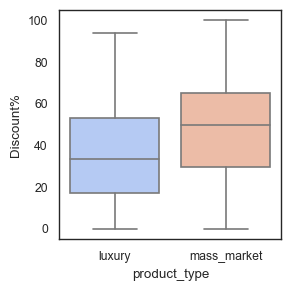

In [234]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(3, 3), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

sns.boxplot(x='product_type', y='Discount%', palette='coolwarm', data=product_sub)
# plot legend

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

### Average Revenue from Holiday/Non-holiday days for the 3 product subcategories

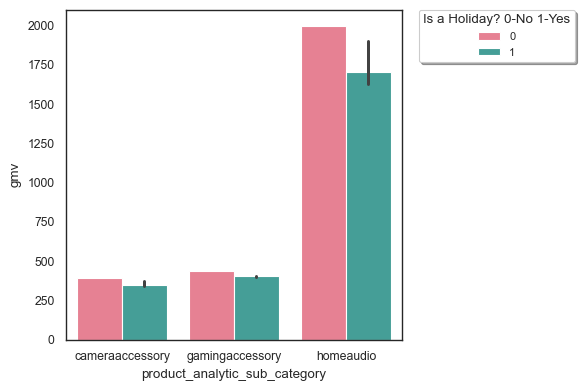

In [237]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(6,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

sns.barplot(y='gmv', x='product_analytic_sub_category', hue ='ocassion_flag', \
            palette='husl', data=product_sub, estimator=np.median)

# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Is a Holiday? 0-No 1-Yes', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

### No of items(Luxury/Mass-market) sold per 3 product subcategories

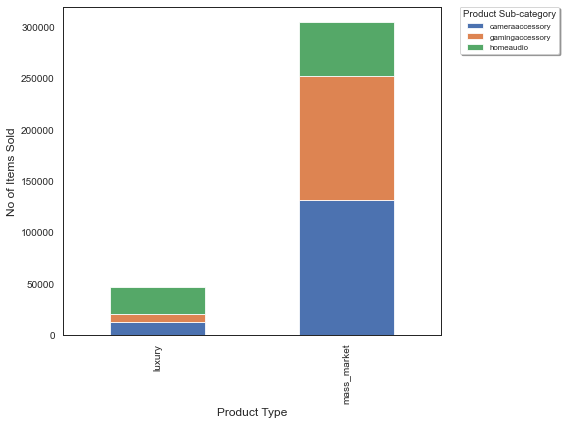

In [238]:
product_sub.groupby(["product_type", "product_analytic_sub_category"]).size().unstack().plot(kind='bar', \
                                                                                             stacked=True, figsize=(8,6), \
                                                                                             fontsize = 10) 
# plot x axis label
plt.xlabel('Product Type', fontsize = 12)
# plot y axis label
plt.ylabel('No of Items Sold', fontsize = 12)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Product Sub-category', \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

### Total items sold per 3 product subcategories per Month

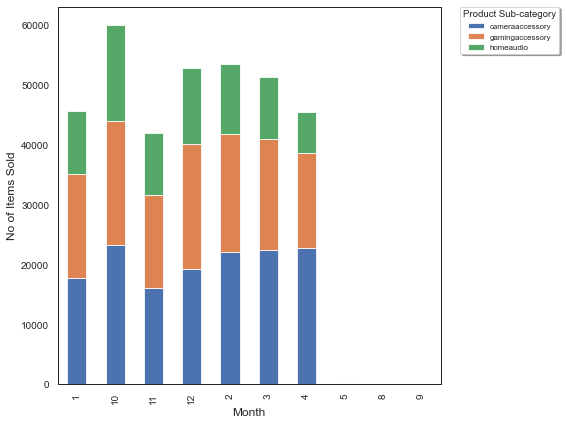

In [239]:
product_sub.groupby(["Month", "product_analytic_sub_category"]).size().unstack().plot(kind='bar', \
                                                                                             stacked=True, figsize=(8,6), \
                                                                                           fontsize = 10) 
# plot x axis label
plt.xlabel('Month', fontsize = 12)
# plot y axis label
plt.ylabel('No of Items Sold', fontsize = 12)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Product Sub-category', \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

### Total items sold per 3 product subcategories per Week

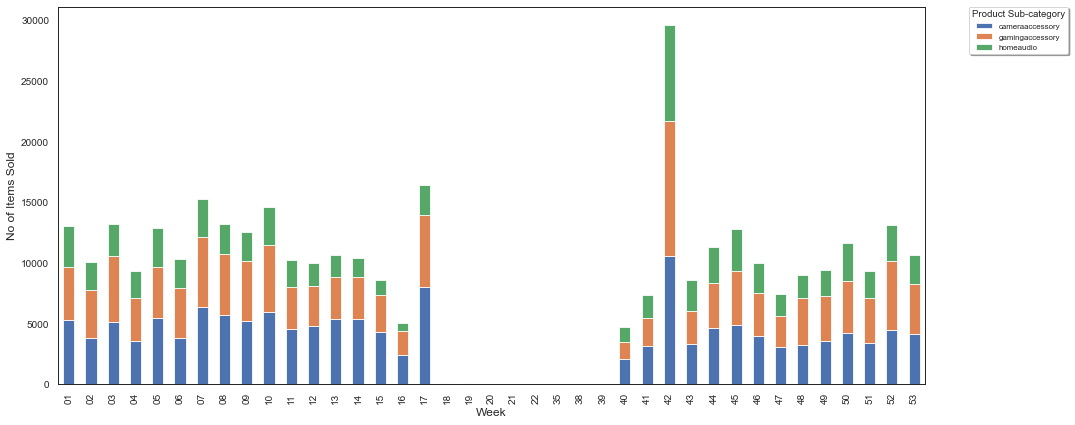

In [240]:
product_sub.groupby(["Week", "product_analytic_sub_category"]).size().unstack().plot(kind='bar', \
                                                                                             stacked=True, figsize=(15,6), \
                                                                                           fontsize = 10) 
# plot x axis label
plt.xlabel('Week', fontsize = 12)
# plot y axis label
plt.ylabel('No of Items Sold', fontsize = 12)
# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Product Sub-category', \
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

In [241]:
highest_gmv = pd.DataFrame(product_sub.groupby(['product_analytic_sub_category','product_analytic_vertical'])['gmv'].sum().sort_values(ascending=False).reset_index()).head(10)
highest_gmv['product_in_category'] = highest_gmv[['product_analytic_vertical','product_analytic_sub_category']].apply(lambda x: ' in '.join(x), axis=1)
highest_gmv.head(20)

,product_analytic_sub_category,product_analytic_vertical,gmv,product_in_category
0,homeaudio,homeaudiospeaker,1.377162e+08,homeaudiospeaker in homeaudio
1,cameraaccessory,lens,7.160013e+07,lens in cameraaccessory
2,gamingaccessory,gamepad,4.020793e+07,gamepad in gamingaccessory
3,gamingaccessory,gamingheadset,2.260119e+07,gamingheadset in gamingaccessory
4,gamingaccessory,gamingmouse,1.757467e+07,gamingmouse in gamingaccessory
5,cameraaccessory,binoculars,1.753249e+07,binoculars in cameraaccessory
6,cameraaccessory,flash,1.604376e+07,flash in cameraaccessory
7,cameraaccessory,camerabattery,1.598329e+07,camerabattery in cameraaccessory
8,cameraaccessory,camerabag,1.461595e+07,camerabag in cameraaccessory
9,homeaudio,fmradio,1.452267e+07,fmradio in homeaudio


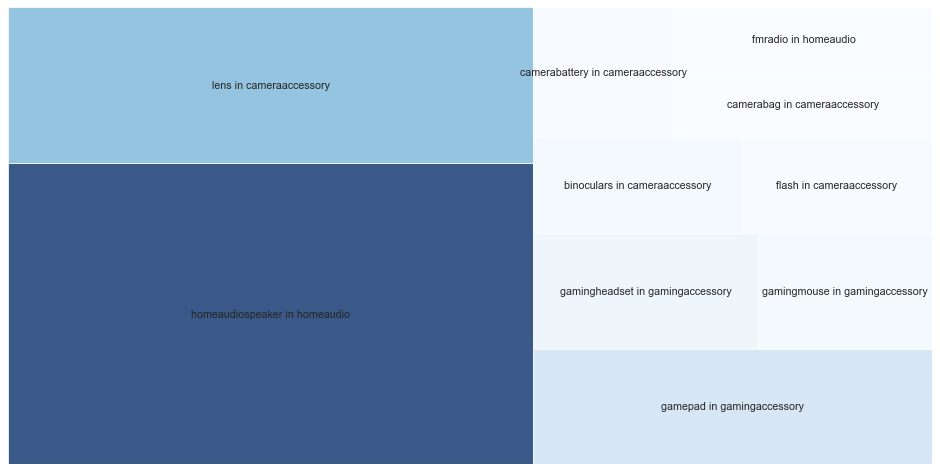

In [242]:
import matplotlib
import squarify    # pip install squarify (algorithm for treemap)
# Create a dataset:
my_values=list(highest_gmv['gmv'])
 
plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')    
# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
 
# Change color
squarify.plot(sizes=my_values, alpha=.8, label=highest_gmv['product_in_category'],color=colors)
plt.axis('off')

# Show graphic
plt.tight_layout()
plt.show()

homeaudiospeaker in homeaudio brought the largest revenue followed by lens in cameraaccessory & gamepad in gamingaccessory.

### Top 10 Product Verticals with most no of sales for 3 product sub-categories

In [243]:
most_sales = pd.DataFrame(product_sub.groupby(['product_analytic_sub_category','product_analytic_vertical'])['units'].count().sort_values(ascending=False).reset_index()).head(10)
most_sales['product_in_category'] = most_sales[['product_analytic_vertical','product_analytic_sub_category']].apply(lambda x: ' in '.join(x), axis=1)
most_sales.head(20)

,product_analytic_sub_category,product_analytic_vertical,units,product_in_category
0,homeaudio,homeaudiospeaker,56206,homeaudiospeaker in homeaudio
1,gamingaccessory,gamingheadset,44134,gamingheadset in gamingaccessory
2,gamingaccessory,gamepad,33458,gamepad in gamingaccessory
3,cameraaccessory,flash,32146,flash in cameraaccessory
4,gamingaccessory,gamingmouse,25812,gamingmouse in gamingaccessory
5,cameraaccessory,camerabattery,23762,camerabattery in cameraaccessory
6,cameraaccessory,cameratripod,21801,cameratripod in cameraaccessory
7,cameraaccessory,lens,20876,lens in cameraaccessory
8,homeaudio,fmradio,16470,fmradio in homeaudio
9,cameraaccessory,camerabag,9915,camerabag in cameraaccessory


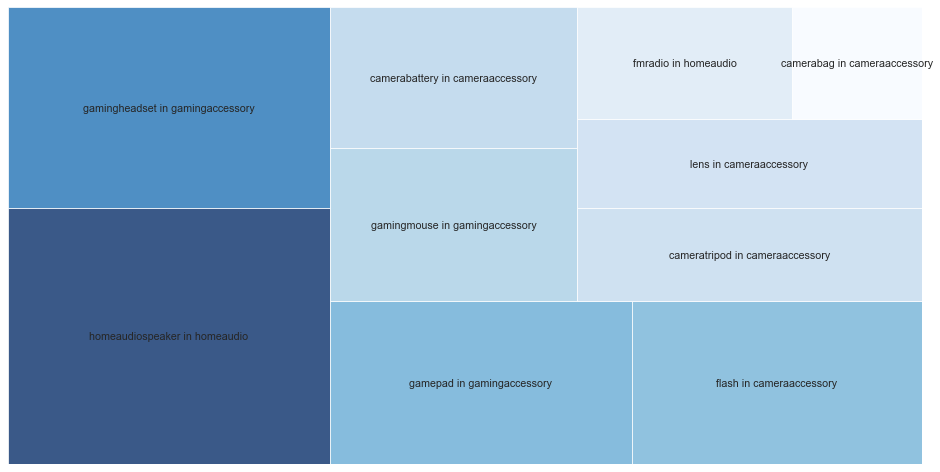

In [244]:
import squarify    # pip install squarify (algorithm for treemap)
# Create a dataset:
my_values=list(most_sales['units'])
 
plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')    
# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
 
# Change color
squarify.plot(sizes=my_values, alpha=.8, label=most_sales['product_in_category'],color=colors)
plt.axis('off')

# Show graphic
plt.tight_layout()
plt.show()

In [247]:
homeaudio_df.head(3)

,Week,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_djcontroller,product_vertical_dock,product_vertical_dockingstation,product_vertical_fmradio,product_vertical_hifisystem,product_vertical_homeaudiospeaker,product_vertical_karaokeplayer,product_vertical_slingbox,product_vertical_soundmixer,product_vertical_voicerecorder,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
19,39,48595.0,0.000000,0.000000,0.000000,10.000000,3.000000,1,0,0,0,0,0.0,0,1.0,0,0,0,0,0,0,24.064,24.064000,14.8436,9.657125,47.825803,0.970,0.970000,0.5824,0.364375,1.903672,0.339,0.339,0.3058,0.287125,0.815066,15.697,15.697000,9.5034,6.019500,30.939957,0.153,0.153,0.0918,0.057375,0.299880,4.095,4.095,2.4674,1.551875,8.051282,1.260,1.260,0.7620,0.481875,2.482077,1.551,1.551000,1.1318,0.896000,3.336364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.925419,46.925419,52.150092,1101.0,1101.000000,1143.0,25.5,14.5,20.000,0.000,2.00,0.00,0.0,0.00,0.0,0
20,40,2340767.0,33.399884,0.006628,0.008285,6.709196,2.526926,937,860,2,29,1,370.0,15,718.0,0,0,0,39,0,0,24.064,24.064000,19.4538,12.538500,52.759482,0.970,0.970000,0.7762,0.485500,2.112203,0.339,0.339,0.3224,0.297500,0.828039,15.697,15.697000,12.6002,7.955000,34.260974,0.153,0.153,0.1224,0.076500,0.332928,4.095,4.095,3.2812,2.060500,8.925769,1.260,1.260,1.0110,0.637500,2.749246,1.551,1.551000,1.3414,1.027000,3.552818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.925419,46.925419,49.537755,1101.0,1101.000000,1122.0,26.5,8.0,17.725,1.925,1.65,2.45,0.0,2.45,0.0,0
21,41,3691049.0,33.919673,0.000000,0.000000,5.952253,2.623927,1484,1346,3,66,4,592.0,22,1057.0,0,1,0,68,0,0,42.539,30.222333,27.7590,17.729250,74.194689,1.536,1.158667,1.0832,0.677375,2.803322,3.156,1.278,0.9024,0.660000,3.652824,21.168,17.520667,16.7912,10.574375,41.724584,0.861,0.389,0.2946,0.184125,1.060757,6.093,4.761,4.4946,2.818875,11.448462,1.743,1.421,1.3566,0.853500,3.392548,7.982,3.694667,2.8372,1.961875,10.113691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.398389,46.083075,46.420013,1210.0,1137.333333,1122.8,23.0,10.0,16.620,1.380,0.00,0.00,0.0,0.00,0.0,0


The following observations were noted from the above time series plots:
For the week# 42 (during Thanksgiving), all the graphs show a steep rise. Revenue increased becuase of both higher discount% and increased Ad Investment.

For the week 32(August), Revenue generated was the lowest from all 3 product subcategories. This can be observed as a direct relation to minimum amount of total investment in Ads. Discount was also lowest for all products apart from camera accessories. Post this dip in revenue, discount% was increased to bring about higher sales. This increase in Discount% was observed most in the case of gaming accessories. However, barring home audio products, the revenue from other products was seen to be constant for the next 3 weeks after which, the revenue started to pick up.

In general the average disount% offered for home audio products is lesser compared to that of the other product subcategories.

### Analyzing how Sales Amount and Revenue vary based on Discount%

In [248]:
# Segmenting the Discount% into various bins

def discount_binning(df,cut_points,label_names):
    column_index = df.columns.get_loc('Discount%') + 1
    df.insert(loc=column_index,column='Discount Bins',value=pd.cut(df['Discount%'],cut_points,labels=label_names, include_lowest=True))
    return df

cut_points = [0,10,20,30,40,50,60,70,80,90,100]
label_names = ["Below 10%","Between 10-20%","Between 20-30%","Between 30-40%","Between 40-50%","Between 50-60%", \
              "Between 60-70%","Between 70-80%","Between 80-90%","Between 90-100%"]

product_sub = discount_binning(product_sub,cut_points,label_names)
product_sub.head()

,order_date,Year,Month,Week,gmv,list_price,Discount%,Discount Bins,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,ocassion_flag,product_type
0,2015-10-17 15:11:00,2015,10,42,6400.0,6400.0,10.99,Between 10-20%,1,0.0,0.0,cod,5,-7.79E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury
1,2015-10-19 10:07:00,2015,10,43,6900.0,6900.0,4.03,Below 10%,1,0.0,0.0,cod,7,7.34E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury
2,2015-10-20 15:45:00,2015,10,43,1990.0,1990.0,5.19,Below 10%,1,0.0,0.0,cod,10,-7.48E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market
3,2015-10-14 12:05:00,2015,10,42,1690.0,1690.0,19.49,Between 10-20%,1,0.0,0.0,prepaid,4,-5.84E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1,0,mass_market
4,2015-10-17 21:25:00,2015,10,42,1618.0,1618.0,22.92,Between 20-30%,1,0.0,0.0,prepaid,6,5.35E+17,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market


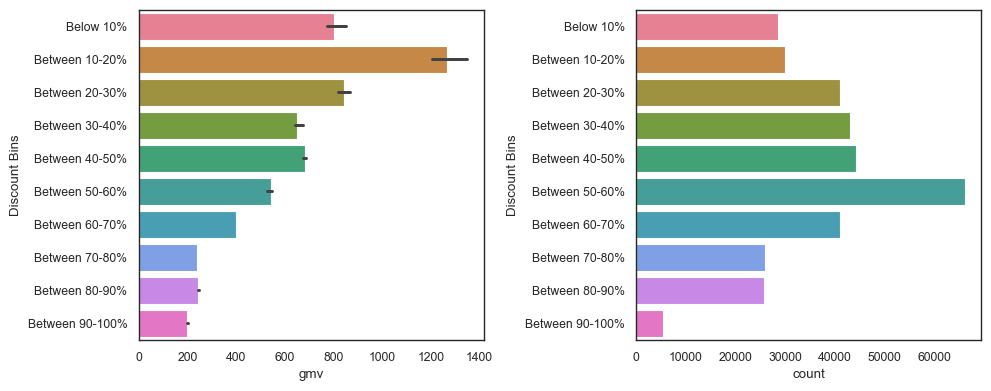

In [249]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

# subplot 1
plt.subplot(1, 2, 1)
sns.barplot(x='gmv', y='Discount Bins', palette='husl', data=product_sub, estimator=np.median)

# subplot 2
plt.subplot(1, 2, 2)
sns.countplot(y='Discount Bins', palette='husl', data=product_sub)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

### Percentage of items sold at different Discount% segments

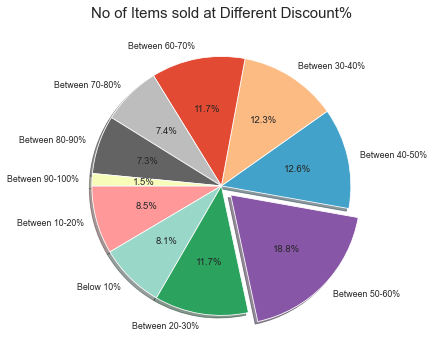

In [250]:
from collections import Counter

labels, values = zip(*Counter(product_sub["Discount Bins"]).items())
colors = ["#ff9999", "#99d8c9", "#2ca25f", "#8856a7","#43a2ca","#fdbb84","#e34a33","#bdbdbd","#636363","#f7fcb9"]
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6,6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=180,explode=(0,0,0,0.1,0,0,0,0,0,0),autopct="%1.1f%%", \
        shadow=True, colors=colors)
plt.tight_layout()
plt.title("No of Items sold at Different Discount%", fontsize=15)
plt.show()

Most of the sales take place when Discount% is between 50-60%.

### Analyzing how Sales Amount and Revenue vary based on Payment Types

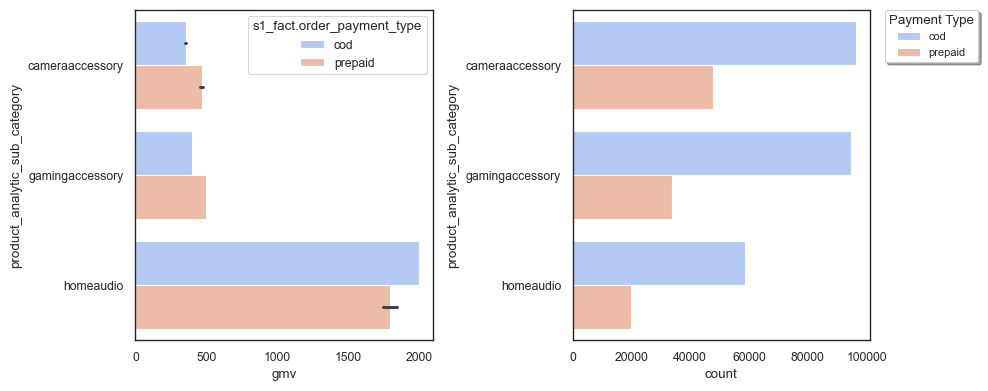

In [251]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10,4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("white") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

# subplot 1
plt.subplot(1, 2, 1)
sns.barplot(x='gmv', y='product_analytic_sub_category', hue ='s1_fact.order_payment_type', \
            palette='coolwarm', data=product_sub, estimator=np.median)

# subplot 2
plt.subplot(1, 2, 2)
sns.countplot(y='product_analytic_sub_category', hue ='s1_fact.order_payment_type', palette='coolwarm', data=product_sub)

# plot legend
plt.legend(frameon=True, fontsize='small', shadow='True', title='Payment Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

### Finding the percentage of Luxury & Mass-market Products from 3 sub-categories

In [252]:
product_sub['luxury'] = product_sub['product_type'].apply(lambda x:1 if x=='luxury' else 0)
product_sub['mass_market'] = product_sub['product_type'].apply(lambda x:1 if x=='mass_market' else 0)
product_sub.head()

<ipython-input-252-2de5e15576b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_sub['luxury'] = product_sub['product_type'].apply(lambda x:1 if x=='luxury' else 0)
<ipython-input-252-2de5e15576b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_sub['mass_market'] = product_sub['product_type'].apply(lambda x:1 if x=='mass_market' else 0)


,order_date,Year,Month,Week,gmv,list_price,Discount%,Discount Bins,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,ocassion_flag,product_type,luxury,mass_market
0,2015-10-17 15:11:00,2015,10,42,6400.0,6400.0,10.99,Between 10-20%,1,0.0,0.0,cod,5,-7.79E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury,1,0
1,2015-10-19 10:07:00,2015,10,43,6900.0,6900.0,4.03,Below 10%,1,0.0,0.0,cod,7,7.34E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury,1,0
2,2015-10-20 15:45:00,2015,10,43,1990.0,1990.0,5.19,Below 10%,1,0.0,0.0,cod,10,-7.48E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market,0,1
3,2015-10-14 12:05:00,2015,10,42,1690.0,1690.0,19.49,Between 10-20%,1,0.0,0.0,prepaid,4,-5.84E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1,0,mass_market,0,1
4,2015-10-17 21:25:00,2015,10,42,1618.0,1618.0,22.92,Between 20-30%,1,0.0,0.0,prepaid,6,5.35E+17,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market,0,1


In [253]:
product_type = pd.DataFrame(product_sub.groupby('product_analytic_sub_category')['luxury','mass_market'].sum().reset_index())
product_type

<ipython-input-253-a8447f457e85>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_type = pd.DataFrame(product_sub.groupby('product_analytic_sub_category')['luxury','mass_market'].sum().reset_index())


,product_analytic_sub_category,luxury,mass_market
0,cameraaccessory,12178,131675
1,gamingaccessory,8076,120602
2,homeaudio,26302,52120


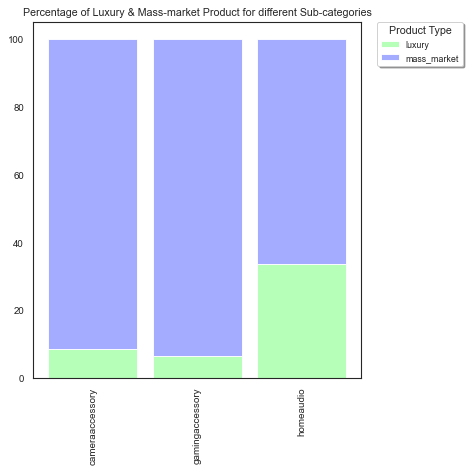

In [254]:
# From raw value to percentage
r = [0,1,2]
totals = [i+j for i,j in zip(product_type['luxury'], product_type['mass_market'])]
luxury = [i / j * 100 for i,j in zip(product_type['luxury'], totals)]
mass_market = [i / j * 100 for i,j in zip(product_type['mass_market'], totals)]
names = list(product_type['product_analytic_sub_category'])

# plot
# adjust figure size
plt.figure(figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')

barWidth = 0.85
# Create Luxury Bars
plt.bar(r, luxury, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create mass_market Bars
plt.bar(r, mass_market, bottom=[i for i in luxury], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['luxury','mass_market'],frameon=True, fontsize='small', shadow='True', title='Product Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Luxury & Mass-market Product for different Sub-categories")

# Show graphic
plt.tight_layout()
plt.show()

Percentage of luxury products under HomeAudio is much more compared to the other sub categories.

### Finding the percentage of COD & Prepaid Products from 3 sub-categories

In [255]:
product_sub['prepaid'] = product_sub['s1_fact.order_payment_type'].apply(lambda x:1 if x=='prepaid' else 0)
product_sub['cod'] = product_sub['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)
product_sub.head()

<ipython-input-255-0976bd43b5a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_sub['prepaid'] = product_sub['s1_fact.order_payment_type'].apply(lambda x:1 if x=='prepaid' else 0)
<ipython-input-255-0976bd43b5a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_sub['cod'] = product_sub['s1_fact.order_payment_type'].apply(lambda x:1 if x=='cod' else 0)


,order_date,Year,Month,Week,gmv,list_price,Discount%,Discount Bins,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,ocassion_flag,product_type,luxury,mass_market,prepaid,cod
0,2015-10-17 15:11:00,2015,10,42,6400.0,6400.0,10.99,Between 10-20%,1,0.0,0.0,cod,5,-7.79E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury,1,0,0,1
1,2015-10-19 10:07:00,2015,10,43,6900.0,6900.0,4.03,Below 10%,1,0.0,0.0,cod,7,7.34E+18,cameraaccessory,cameraaccessory,cameratripod,7190.0,0,0,0,luxury,1,0,0,1
2,2015-10-20 15:45:00,2015,10,43,1990.0,1990.0,5.19,Below 10%,1,0.0,0.0,cod,10,-7.48E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market,0,1,0,1
3,2015-10-14 12:05:00,2015,10,42,1690.0,1690.0,19.49,Between 10-20%,1,0.0,0.0,prepaid,4,-5.84E+18,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,1,0,mass_market,0,1,1,0
4,2015-10-17 21:25:00,2015,10,42,1618.0,1618.0,22.92,Between 20-30%,1,0.0,0.0,prepaid,6,5.35E+17,cameraaccessory,cameraaccessory,cameratripod,2099.0,3,0,0,mass_market,0,1,1,0


In [256]:
main_df['s1_fact.order_payment_type'].value_counts()

cod        698304
prepaid    288804
Name: s1_fact.order_payment_type, dtype: int64

In [257]:
payment_type = pd.DataFrame(product_sub.groupby('product_analytic_sub_category')['prepaid', 'cod'].sum().reset_index())
payment_type

<ipython-input-257-88906ce89650>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  payment_type = pd.DataFrame(product_sub.groupby('product_analytic_sub_category')['prepaid', 'cod'].sum().reset_index())


,product_analytic_sub_category,prepaid,cod
0,cameraaccessory,47593,96260
1,gamingaccessory,33890,94788
2,homeaudio,19700,58722


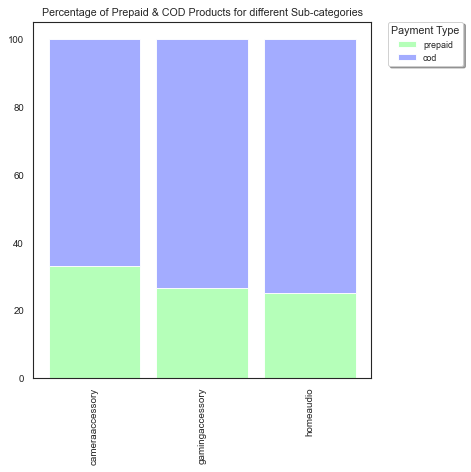

In [258]:
# From raw value to percentage
r = [0,1,2]
totals = [i+j for i,j in zip(payment_type['prepaid'], payment_type['cod'])]
prepaid = [i / j * 100 for i,j in zip(payment_type['prepaid'], totals)]
cod = [i / j * 100 for i,j in zip(payment_type['cod'], totals)]
names = list(payment_type['product_analytic_sub_category'])

# plot
# adjust figure size
plt.figure(figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')

barWidth = 0.85
# Create prepaid Bars
plt.bar(r, prepaid, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create cod Bars
plt.bar(r, cod, bottom=[i for i in prepaid], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['prepaid','cod'],frameon=True, fontsize='small', shadow='True', title='Payment Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Prepaid & COD Products for different Sub-categories")

# Show graphic
plt.tight_layout()
plt.show()

Percentage of prepaid payments under Camera Accessory was observed to be slightly more compared to that of the other sub categories.

### Finding the percentage of Luxury and Mass_market Products under different Discount groups

In [259]:
product_type_with_discount = pd.DataFrame(product_sub.groupby('Discount Bins')['luxury','mass_market'].sum().reset_index())
product_type_with_discount

<ipython-input-259-1290abf36122>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_type_with_discount = pd.DataFrame(product_sub.groupby('Discount Bins')['luxury','mass_market'].sum().reset_index())


,Discount Bins,luxury,mass_market
0,Below 10%,5806,22725
1,Between 10-20%,9408,20459
2,Between 20-30%,6380,34735
3,Between 30-40%,5260,37857
4,Between 40-50%,5074,39088
5,Between 50-60%,10229,55903
6,Between 60-70%,4325,36785
7,Between 70-80%,38,25818
8,Between 80-90%,26,25648
9,Between 90-100%,10,5379


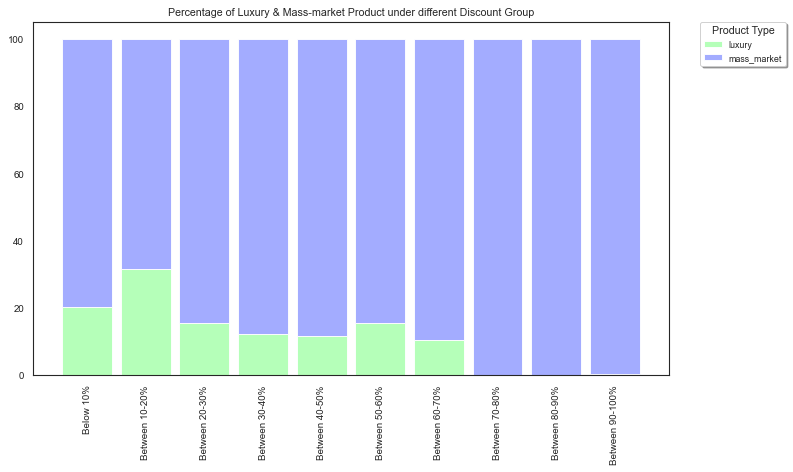

In [260]:
# From raw value to percentage
r = [0,1,2,3,4,5,6,7,8,9]
totals = [i+j for i,j in zip(product_type_with_discount['luxury'], product_type_with_discount['mass_market'])]
luxury = [i / j * 100 for i,j in zip(product_type_with_discount['luxury'], totals)]
mass_market = [i / j * 100 for i,j in zip(product_type_with_discount['mass_market'], totals)]
names = list(product_type_with_discount['Discount Bins'])

# plot
# adjust figure size
plt.figure(figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')

barWidth = 0.85
# Create Luxury Bars
plt.bar(r, luxury, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create mass_market Bars
plt.bar(r, mass_market, bottom=[i for i in luxury], color='#a3acff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.legend(['luxury','mass_market'],frameon=True, fontsize='small', shadow='True', title='Product Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Percentage of Luxury & Mass-market Product under different Discount Group")

# Show graphic
plt.tight_layout()
plt.show()

Percentage of luxury products were given a discount between 10-20%

In [262]:
cameraaccessory.head(3)

,Week,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
19,35,285.0,27.850000,0.000000,0.000000,13.000000,3.000000,1,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1.0,0,0,0,0,0,1,0,1.013,1.013000,1.6634,2.63900,3.407059,0.001,0.001000,0.0116,0.027500,0.017405,0.256,0.256,0.3314,0.4445,0.735568,0.213,0.213000,0.5412,1.033500,0.986334,0.000,0.000,0.0000,0.000000,0.000000,0.026,0.026,0.0872,0.179000,0.150203,0.015,0.015,0.0394,0.0760,0.071275,0.503,0.503000,0.6536,0.879500,1.448732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.987101,59.987101,58.909598,1206.0,1206.000000,1200.2,29.0,14.0,20.250,0.750,3.00,0.00,0.0,0.00,0.0,3
20,40,2278002.0,51.243437,0.000000,0.000000,6.434466,2.683495,1584,1898,25,114.0,339.0,106.0,4,0,13,0,0,0,5,62.0,766.0,0,116.0,67.0,0,272.0,0,0,18,0,11,1,0,24.064,24.064000,19.4538,12.53850,52.759482,0.970,0.970000,0.7762,0.485500,2.112203,0.339,0.339,0.3224,0.2975,0.828039,15.697,15.697000,12.6002,7.955000,34.260974,0.153,0.153,0.1224,0.076500,0.332928,4.095,4.095,3.2812,2.060500,8.925769,1.260,1.260,1.0110,0.6375,2.749246,1.551,1.551000,1.3414,1.027000,3.552818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.925419,46.925419,49.537755,1101.0,1101.000000,1122.0,26.5,8.0,17.725,1.925,1.65,2.45,0.0,2.45,0.0,0
21,41,4004235.0,46.033284,0.002196,0.002823,6.234003,2.759724,2408,2913,40,232.0,615.0,198.0,10,0,26,0,0,0,19,118.0,827.0,0,188.0,170.0,0,481.0,0,0,22,0,17,0,0,42.539,30.222333,27.7590,17.72925,74.194689,1.536,1.158667,1.0832,0.677375,2.803322,3.156,1.278,0.9024,0.6600,3.652824,21.168,17.520667,16.7912,10.574375,41.724584,0.861,0.389,0.2946,0.184125,1.060757,6.093,4.761,4.4946,2.818875,11.448462,1.743,1.421,1.3566,0.8535,3.392548,7.982,3.694667,2.8372,1.961875,10.113691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.398389,46.083075,46.420013,1210.0,1137.333333,1122.8,23.0,10.0,16.620,1.380,0.00,0.00,0.0,0.00,0.0,0


In [263]:
rev_ad_columns = ['gmv','Total Investment', 'Total Investment_SMA_3', 'Total Investment_SMA_5', 'Total Investment_EMA_8', \
                  'Total_Investment_Ad_Stock', 'TV', 'TV_SMA_3', 'TV_SMA_5', 'TV_EMA_8', 'TV_Ad_Stock', 'Digital', \
                  'Digital_SMA_3', 'Digital_SMA_5', 'Digital_EMA_8', 'Digital_Ad_Stock', 'Sponsorship', 'Sponsorship_SMA_3', \
                  'Sponsorship_SMA_5', 'Sponsorship_EMA_8', 'Sponsorship_Ad_Stock', 'Content Marketing', \
                  'Content Marketing_SMA_3','Content Marketing_SMA_5','Content Marketing_EMA_8', 'Content_Marketing_Ad_Stock', \
                  'Online marketing', 'Online marketing_SMA_3', 'Online marketing_SMA_5', 'Online marketing_EMA_8', \
                  'Online_marketing_Ad_Stock', 'Affiliates', 'Affiliates_SMA_3', 'Affiliates_SMA_5', 'Affiliates_EMA_8', \
                  'Affiliates_Ad_Stock', 'SEM', 'SEM_SMA_3', 'SEM_SMA_5', 'SEM_EMA_8', 'SEM_Ad_Stock', 'Radio', 'Radio_SMA_3', \
                  'Radio_SMA_5', 'Radio_EMA_8', 'Radio_Ad_Stock', 'Other', 'Other_SMA_3', 'Other_SMA_5', 'Other_EMA_8', \
                  'Other_Ad_Stock']

In [264]:
cameraaccessory_ad = cameraaccessory[rev_ad_columns]
gamingaccessory_ad = gamingaccessory[rev_ad_columns]
homeaudio_ad = homeaudio[rev_ad_columns]
homeaudio_ad.head()

,gmv,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock
19,48595.0,24.064,24.064000,14.8436,9.657125,47.825803,0.970,0.970000,0.5824,0.364375,1.903672,0.339,0.339,0.3058,0.287125,0.815066,15.697,15.697000,9.5034,6.019500,30.939957,0.153,0.153,0.0918,0.057375,0.299880,4.095,4.095,2.4674,1.551875,8.051282,1.260,1.260,0.7620,0.481875,2.482077,1.551,1.551000,1.1318,0.896000,3.336364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2340767.0,24.064,24.064000,19.4538,12.538500,52.759482,0.970,0.970000,0.7762,0.485500,2.112203,0.339,0.339,0.3224,0.297500,0.828039,15.697,15.697000,12.6002,7.955000,34.260974,0.153,0.153,0.1224,0.076500,0.332928,4.095,4.095,3.2812,2.060500,8.925769,1.260,1.260,1.0110,0.637500,2.749246,1.551,1.551000,1.3414,1.027000,3.552818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,3691049.0,42.539,30.222333,27.7590,17.729250,74.194689,1.536,1.158667,1.0832,0.677375,2.803322,3.156,1.278,0.9024,0.660000,3.652824,21.168,17.520667,16.7912,10.574375,41.724584,0.861,0.389,0.2946,0.184125,1.060757,6.093,4.761,4.4946,2.818875,11.448462,1.743,1.421,1.3566,0.853500,3.392548,7.982,3.694667,2.8372,1.961875,10.113691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,19383019.0,42.539,36.380667,31.4540,22.920000,87.055813,1.536,1.347333,1.1964,0.869250,3.217993,3.156,2.217,1.4658,1.022500,5.347694,21.168,19.344333,17.8854,13.193750,46.202751,0.861,0.625,0.4362,0.291750,1.497454,6.093,5.427,4.8942,3.577250,12.962077,1.743,1.582,1.4532,1.069500,3.778529,7.982,5.838333,4.1234,2.896750,14.050215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,5801448.0,42.539,42.539000,35.1490,28.110750,94.772488,1.536,1.536000,1.3096,1.061125,3.466796,3.156,3.156,2.0292,1.385000,6.364617,21.168,21.168000,18.9796,15.813125,48.889650,0.861,0.861,0.5778,0.399375,1.759472,6.093,6.093,5.2938,4.335625,13.870246,1.743,1.743,1.5498,1.285500,4.010117,7.982,7.982000,5.4096,3.831625,16.412129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Why we have choosen just 3 categories for modelling

In [268]:
pd.DataFrame(main_df.groupby('product_analytic_sub_category')['product_analytic_vertical'].value_counts())

product_analytic_vertical
product_analytic_sub_category product_analytic_vertical                           
amplifierreceiver             amplifierreceiver                               2096
audioaccessory                microphone                                      4590
                              microphoneaccessory                             1536
audiomp3player                audiomp3player                                 72468
camera                        dslr                                           42730
                              point & shoot                                  19751
                              sportsandaction                                 1629
                              instant cameras                                 1432
                              camcorders                                       536
cameraaccessory               flash                                          32146
                              camerabattery                                  23762
                              cameratripod                                   21801
                              lens                                           20876
                              camerabag                                       9915
                              camerabatterycharger                            9640
                              binoculars                                      8952
                              filter                                          7862
                              cameraremotecontrol                             3523
                              cameraaccessory                                 1162
                              strap                                           1046
                              camerafilmrolls                                 1037
                              cameramount                                      860
                              telescope                                        851
                              camerabatterygrip                                234
                              extensiontube                                     77
                              cameraeyecup                                      50
                              cameramicrophone                                  46
                              cameraledlight                                     3
                              reflectorumbrella                                  3
                              camerahousing                                      2
                              flashshoeadapter                                   2
                              softbox                                            2
                              teleconverter                                      1
camerastorage                 camerastoragememorycard                        11193
game                          physicalgame                                   56245
                              codeintheboxgame                                5830
gamemembershipcards           gamevaluecards                                    16
gamingaccessory               gamingheadset                                  44134
                              gamepad                                        33458
                              gamingmouse                                    25812
                              gamingaccessorykit                              5673
                              gamingmemorycard                                4820
                              tvoutcableaccessory                             4435
                              gamingkeyboard                                  3922
                              gamingmousepad                                  2324
                              gamingadapter                                   2043
                              joystickgamingwheel                        

In [269]:
main_df['product_analytic_sub_category'].value_counts()

speaker                325815
cameraaccessory        143853
gamingaccessory        128678
homeaudio               78422
tvvideosmall            72801
audiomp3player          72468
camera                  66078
game                    62075
gamingconsole           14736
camerastorage           11193
audioaccessory           6126
hometheatre              2751
amplifierreceiver        2096
gamemembershipcards        16
Name: product_analytic_sub_category, dtype: int64

## Building Linear Regression Models

Making the copy of the original dataframe


In [271]:
cameraaccessory_org_df = cameraaccessory_df.copy()
gamingaccessory_org_df = gamingaccessory_df.copy()
homeaudio_org_df = homeaudio_df.copy()
homeaudio_org_df.head()

,Week,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_djcontroller,product_vertical_dock,product_vertical_dockingstation,product_vertical_fmradio,product_vertical_hifisystem,product_vertical_homeaudiospeaker,product_vertical_karaokeplayer,product_vertical_slingbox,product_vertical_soundmixer,product_vertical_voicerecorder,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
19,39,48595.0,0.000000,0.000000,0.000000,10.000000,3.000000,1,0,0,0,0,0.0,0,1.0,0,0,0,0,0,0,24.064,24.064000,14.8436,9.657125,47.825803,0.970,0.970000,0.5824,0.364375,1.903672,0.339,0.339,0.3058,0.287125,0.815066,15.697,15.697000,9.5034,6.019500,30.939957,0.153,0.153,0.0918,0.057375,0.299880,4.095,4.095,2.4674,1.551875,8.051282,1.260,1.260,0.7620,0.481875,2.482077,1.551,1.551000,1.1318,0.896000,3.336364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.925419,46.925419,52.150092,1101.0,1101.000000,1143.0,25.5,14.5,20.000,0.000,2.00,0.00,0.0,0.00,0.0,0
20,40,2340767.0,33.399884,0.006628,0.008285,6.709196,2.526926,937,860,2,29,1,370.0,15,718.0,0,0,0,39,0,0,24.064,24.064000,19.4538,12.538500,52.759482,0.970,0.970000,0.7762,0.485500,2.112203,0.339,0.339,0.3224,0.297500,0.828039,15.697,15.697000,12.6002,7.955000,34.260974,0.153,0.153,0.1224,0.076500,0.332928,4.095,4.095,3.2812,2.060500,8.925769,1.260,1.260,1.0110,0.637500,2.749246,1.551,1.551000,1.3414,1.027000,3.552818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.925419,46.925419,49.537755,1101.0,1101.000000,1122.0,26.5,8.0,17.725,1.925,1.65,2.45,0.0,2.45,0.0,0
21,41,3691049.0,33.919673,0.000000,0.000000,5.952253,2.623927,1484,1346,3,66,4,592.0,22,1057.0,0,1,0,68,0,0,42.539,30.222333,27.7590,17.729250,74.194689,1.536,1.158667,1.0832,0.677375,2.803322,3.156,1.278,0.9024,0.660000,3.652824,21.168,17.520667,16.7912,10.574375,41.724584,0.861,0.389,0.2946,0.184125,1.060757,6.093,4.761,4.4946,2.818875,11.448462,1.743,1.421,1.3566,0.853500,3.392548,7.982,3.694667,2.8372,1.961875,10.113691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.398389,46.083075,46.420013,1210.0,1137.333333,1122.8,23.0,10.0,16.620,1.380,0.00,0.00,0.0,0.00,0.0,0
22,42,19383019.0,41.809571,0.000000,0.000000,5.945669,2.358913,5982,5964,12,154,4,1318.0,78,6172.0,1,0,0,88,1,0,42.539,36.380667,31.4540,22.920000,87.055813,1.536,1.347333,1.1964,0.869250,3.217993,3.156,2.217,1.4658,1.022500,5.347694,21.168,19.344333,17.8854,13.193750,46.202751,0.861,0.625,0.4362,0.291750,1.497454,6.093,5.427,4.8942,3.577250,12.962077,1.743,1.582,1.4532,1.069500,3.778529,7.982,5.838333,4.1234,2.896750,14.050215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.398389,45.240732,45.914607,1210.0,1173.666667,1144.6,24.5,4.5,14.300,4.100,0.40,0.00,0.0,0.00,0.0,0
23,43,5801448.0,35.577672,0.001200,0.001600,6.591600,2.648800,2032,1605,0,67,4,643.0,39,1637.0,0,0,0,41,0,0,42.539,42.539000,35.1490,28.110750,94.772488,1.536,1.536000,1.3096,1.061125,3.466796,3.156,3.156,2.0292,1.385000,6.364617,21.168,21.168000,18.9796,15.813125,48.889650,0.861,0.861,0.5778,0.399375,1.759472,6.093,6.093,5.2938,4.335625,13.870

In [273]:
cameraaccessory_df = cameraaccessory_df.drop('Week', axis = 1)
gamingaccessory = gamingaccessory.drop('Week', axis = 1)
homeaudio_df = homeaudio_df.drop('Week', axis = 1)

Using standard Scaling so that the standardize data will give good result

In [274]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cameraaccessory_df[cameraaccessory_df.columns]=scaler.fit_transform(cameraaccessory_df[cameraaccessory_df.columns])
gamingaccessory_df[gamingaccessory_df.columns]=scaler.fit_transform(gamingaccessory_df[gamingaccessory_df.columns])
homeaudio_df[homeaudio_df.columns]=scaler.fit_transform(homeaudio_df[homeaudio_df.columns])

cameraaccessory_df.head()

,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
19,-1.937463,-2.591196,-0.543906,-0.547877,5.445910,1.366919,-1.625550,-1.900425,-1.517247,-1.766051,-1.923575,-1.609517,-1.495258,-0.709252,-2.064310,-0.174078,-0.311086,-0.609936,-1.564821,-1.772686,-1.605070,-1.109058,-1.478120,-1.327479,-0.25,-1.581211,-0.236433,-0.25,-2.067684,-0.174078,-1.445728,1.0,-0.6,-1.721535,-2.008117,-2.286941,-2.810313,-2.357491,-1.840803,-2.240030,-2.632664,-3.153446,-2.597024,-0.463746,-0.549783,-0.536239,-0.481999,-0.593358,-1.188824,-1.370350,-1.458879,-1.699386,-1.536815,-0.812255,-0.944616,-1.119998,-1.457547,-1.130358,-4.060944,-4.402001,-4.596269,-4.236707,-4.728957,-4.543774,-4.825599,-4.865781,-4.221677,-4.989223,-0.728379,-0.847444,-0.892385,-0.946511,-0.947090,-0.528946,-0.618016,-0.697983,-0.869744,-0.735722,-0.534159,-0.640982,-0.752595,-0.963104,-0.770279,3.867210,4.031162,3.985850,0.505473,0.644686,0.753911,1.615315,2.122796,1.806560,-1.532633,2.647447,-0.846450,-0.450201,-0.883028,-0.331937,1.144135
20,-1.010952,0.224401,-0.543906,-0.547877,0.026108,-0.063502,-0.678767,-0.935924,-0.363705,-1.054490,-0.966149,-0.988257,-0.575099,-0.709252,-1.143599,-0.174078,-0.311086,-0.609936,-1.242763,-0.685452,0.351057,-1.109058,-0.710447,-1.227621,-0.25,-0.853438,-0.236433,-0.25,-0.809809,-0.174078,-0.781475,1.0,-0.6,0.433254,0.471898,-0.035054,-1.153188,0.200324,-0.240320,-0.327567,-0.842406,-1.812042,-0.645966,-0.373771,-0.444454,-0.549773,-0.768848,-0.537537,1.181935,1.268825,0.809924,-0.056034,1.093143,-0.207511,-0.240822,-0.453114,-0.914062,-0.397346,-0.456791,-0.479174,-1.313699,-2.361932,-1.034844,-0.629613,-0.660188,-1.511031,-2.440535,-1.215431,-0.255317,-0.298743,-0.470408,-0.831487,-0.426405,-0.528946,-0.618016,-0.697983,-0.869744,-0.735722,-0.534159,-0.640982,-0.752595,-0.963104,-0.770279,-0.441135,-0.455542,0.482327,-0.649802,-0.717972,-0.496088,1.291108,1.285174,1.441491,-1.348822,1.322641,-0.180107,-0.450201,-0.268736,-0.331937,-0.547195
21,-0.308768,-0.402685,-0.542371,-0.546232,-0.139373,0.281009,-0.185937,-0.419863,0.328420,-0.317963,-0.186651,-0.449051,0.805139,-0.709252,-0.222887,-0.174078,-0.311086,-0.609936,-0.341002,0.296565,0.506833,-1.109058,-0.233961,-1.074108,-0.25,-0.292167,-0.236433,-0.25,-0.530281,-0.174

Splitting the data into train test 

In [275]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

cameraaccessory_train, cameraaccessory_test = train_test_split(cameraaccessory_df, \
                                                               train_size = 0.7, test_size = 0.3, random_state = 100)

gamingaccessory_train, gamingaccessory_test = train_test_split(gamingaccessory_df, \
                                                               train_size = 0.7, test_size = 0.3, random_state = 100)

homeaudio_train, homeaudio_test = train_test_split(homeaudio_df, \
                                                               train_size = 0.7, test_size = 0.3, random_state = 100)

assigning the values to x, y : trian, test 

In [276]:
y_cameraaccessory_train = cameraaccessory_train.pop('gmv')
X_cameraaccessory_train = cameraaccessory_train

y_gamingaccessory_train = gamingaccessory_train.pop('gmv')
X_gamingaccessory_train = gamingaccessory_train

y_homeaudio_train = homeaudio_train.pop('gmv')
X_homeaudio_train = homeaudio_train

X_cameraaccessory_train.head()

,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
19,-2.591196,-0.543906,-0.547877,5.445910,1.366919,-1.625550,-1.900425,-1.517247,-1.766051,-1.923575,-1.609517,-1.495258,-0.709252,-2.064310,-0.174078,-0.311086,-0.609936,-1.564821,-1.772686,-1.605070,-1.109058,-1.478120,-1.327479,-0.25,-1.581211,-0.236433,-0.25,-2.067684,-0.174078,-1.445728,1.0,-0.600000,-1.721535,-2.008117,-2.286941,-2.810313,-2.357491,-1.840803,-2.240030,-2.632664,-3.153446,-2.597024,-0.463746,-0.549783,-0.536239,-0.481999,-0.593358,-1.188824,-1.370350,-1.458879,-1.699386,-1.536815,-0.812255,-0.944616,-1.119998,-1.457547,-1.130358,-4.060944,-4.402001,-4.596269,-4.236707,-4.728957,-4.543774,-4.825599,-4.865781,-4.221677,-4.989223,-0.728379,-0.847444,-0.892385,-0.946511,-0.947090,-0.528946,-0.618016,-0.697983,-0.869744,-0.735722,-0.534159,-0.640982,-0.752595,-0.963104,-0.770279,3.867210,4.031162,3.985850,0.505473,0.644686,0.753911,1.615315,2.122796,1.806560,-1.532633,2.647447,-0.846450,-0.450201,-0.883028,-0.331937,1.144135
11,0.100504,0.637826,0.601655,-0.627052,-1.034027,-0.167994,0.657003,-0.825122,0.362389,1.152052,1.901184,-0.575099,0.767150,1.122768,-0.174078,-0.311086,2.689262,-0.663060,0.261493,-0.159681,0.419643,0.017518,0.820212,-0.25,-0.010189,-0.236433,4.00,0.168539,-0.174078,0.184712,1.0,1.666667,0.521312,0.573246,0.277975,-0.354798,0.460136,1.997713,2.346723,1.937342,0.927879,2.268984,-0.172139,-0.208417,-0.287806,-0.463461,-0.275748,0.370450,0.365465,0.092426,-0.432118,0.233897,-0.444665,-0.516820,-0.584966,-0.704483,-0.593894,-0.001511,0.016361,-0.078779,-0.136913,-0.009688,0.294695,0.323452,0.183608,0.052748,0.284558,-0.369520,-0.431206,-0.536668,-0.746096,-0.526733,0.573260,0.754695,0.493027,0.055387,0.681886,1.310019,1.629674,1.268703,0.633702,1.572803,0.249936,0.264138,0.386688,-1.596027,-1.834054,-1.544680,-0.070563,-0.529673,-0.127740,0.090937,-0.296566,-0.077144,0.146475,-0.037705,-0.331937,-0.547195
31,-0.764954,-0.543906,-0.547877,0.262047,0.601521,-0.087850,-0.367494,-0.086855,0.324939,-0.017195,-0.290806,-0.575099,-0.217118,0.202057,-0.174078,-0.311086,-0.609936,-0.147768,-0.282124,-0.167342,-0.089924,-0.247197,-0.841603,-0.25,0.040836,-0.236433,-0.25,0.028775,-0.174078,0.969739,1.0,-0.600000,0.678357,0.164303,-0.368412,-0.1735

In [277]:
y_cameraaccessory_test = cameraaccessory_test.pop('gmv')
X_cameraaccessory_test = cameraaccessory_test

y_gamingaccessory_test = gamingaccessory_test.pop('gmv')
X_gamingaccessory_test = gamingaccessory_test

y_homeaudio_test = homeaudio_test.pop('gmv')
X_homeaudio_test = homeaudio_test

X_cameraaccessory_test.head()

,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
10,-0.033425,-0.316785,-0.322310,-0.520339,-0.906854,0.327228,0.410412,-0.179138,0.031576,1.126633,1.338535,-0.345060,0.275016,0.839472,-0.174078,-0.311086,2.217948,0.367524,-0.001547,-0.351208,0.419643,-0.286904,0.578764,-0.25,-0.284111,-0.236433,-0.25,1.007122,-0.174078,1.573606,-1.0,1.666667,0.521312,0.573246,-0.111786,-0.676949,0.296274,1.997713,2.346723,1.090680,0.265964,1.914690,-0.172139,-0.208417,-0.330515,-0.498097,-0.296188,0.370450,0.365465,-0.210557,-0.671089,0.096748,-0.444665,-0.516820,-0.556634,-0.681394,-0.577518,-0.001511,0.016361,-0.208478,-0.215506,-0.054988,0.294695,0.323452,0.003372,-0.050742,0.217549,-0.369520,-0.431206,-0.576301,-0.777582,-0.542835,0.573260,0.754695,0.195274,-0.175896,0.574024,1.310019,1.629674,0.763378,0.234500,1.370432,0.249936,0.264138,0.484397,-1.596027,-1.834054,-0.882916,0.513010,-0.320267,-0.294216,0.271061,-0.296566,2.634856,-0.450201,2.326335,-0.331937,-0.547195
18,4.592998,0.853891,1.200816,-0.332540,-3.152509,-1.625550,-1.900425,-1.517247,-1.766051,-1.923575,-1.609517,-1.495258,-0.709252,-2.064310,-0.174078,-0.311086,-0.609936,-1.564821,-1.772686,-1.602516,-1.109058,-1.478120,-1.327479,-0.25,-1.583896,-0.236433,-0.25,-2.067684,-0.174078,-1.445728,-1.0,1.666667,-0.356926,-0.437545,-0.556888,-0.755960,-0.515501,-1.389893,-1.701225,-1.537343,-0.927535,-1.634200,-0.574319,-0.679222,-0.783769,-0.986424,-0.785196,-0.251330,-0.326714,-0.378380,-0.471175,-0.358563,-0.187748,-0.217822,-0.421514,-0.864331,-0.358792,0.105666,0.133014,0.051743,-0.001399,0.110973,-0.315223,-0.325616,-0.262495,-0.048760,-0.263563,-0.331603,-0.387226,-0.485624,-0.682151,-0.474711,0.583372,0.767288,0.503954,0.063874,0.675412,-0.072883,-0.073033,-0.247017,-0.563702,-0.154726,-0.315288,-0.324485,-0.013630,0.747531,0.930196,1.243041,1.874681,1.494580,2.225848,-1.649959,4.757324,-0.746726,-0.450201,-0.791093,-0.331937,1.144135
15,0.598615,2.026316,1.977286,-0.103666,-0.530710,0.396009,1.894025,-1.424964,1.960280,1.462721,2.035986,0.345060,4.212086,2.539247,5.744563,-0.311086,0.804006,0.303113,0.770038,0.915423,0.419643,1.109466,2.136250,-0.25,1.260056,-0.236433,-0.25,2.754172,-0.174078,-1.445728,1.0,-0.600000,-0.487703,-0.588061,-0.425296,0.030378,-0.543238,

### Linear Regression for Cameraaccessory

In [278]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

cameraaccessory_model = LinearRegression().fit(X_cameraaccessory_train, y_cameraaccessory_train)
y_cameraaccessory_test_pred = cameraaccessory_model.predict(X_cameraaccessory_test)

print('R2 Score: {}'.format(r2_score(y_cameraaccessory_test, y_cameraaccessory_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_cameraaccessory_test, y_cameraaccessory_test_pred)))

R2 Score: 0.9421660277004305
Mean Squared Error: 0.059544464409408464


Feature Importance 

In [279]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
pd.set_option('display.precision',1)


cameraaccessory_lr_model_parameters = list(cameraaccessory_model.coef_)
cameraaccessory_lr_model_parameters.insert(0, cameraaccessory_model.intercept_)
cameraaccessory_lr_model_parameters = [round(x, 3) for x in cameraaccessory_lr_model_parameters]
cols = X_cameraaccessory_test.columns
cols = cols.insert(0, "constant")
cameraaccessory_lr_coef = list(zip(cols, cameraaccessory_lr_model_parameters))
cameraaccessory_lr_coef

[('constant', -0.022),
 ('Discount%', 0.012),
 ('deliverybdays', 0.003),
 ('deliverycdays', 0.003),
 ('sla', -0.003),
 ('product_procurement_sla', 0.046),
 ('is_cod', 0.064),
 ('is_mass_market', 0.096),
 ('product_vertical_cameraaccessory', 0.071),
 ('product_vertical_camerabag', 0.124),
 ('product_vertical_camerabattery', 0.064),
 ('product_vertical_camerabatterycharger', 0.031),
 ('product_vertical_camerabatterygrip', 0.027),
 ('product_vertical_cameraeyecup', -0.002),
 ('product_vertical_camerafilmrolls', 0.021),
 ('product_vertical_camerahousing', -0.0),
 ('product_vertical_cameraledlight', 0.002),
 ('product_vertical_cameramicrophone', 0.005),
 ('product_vertical_cameramount', 0.022),
 ('product_vertical_cameraremotecontrol', 0.083),
 ('product_vertical_cameratripod', 0.143),
 ('product_vertical_extensiontube', -0.007),
 ('product_vertical_filter', 0.139),
 ('product_vertical_flash', 0.015),
 ('product_vertical_flashshoeadapter', -0.017),
 ('product_vertical_lens', 0.142),
 ('prod

In [280]:
cameraaccessory_lr_coef_df = pd.DataFrame(cameraaccessory_lr_coef)
col_rename = {0:'Features',1: 'Coefficients'}
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.rename(columns=col_rename)
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.iloc[1:,:]
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.loc[cameraaccessory_lr_coef_df['Coefficients']!=0.0]
cameraaccessory_lr_coef_df = cameraaccessory_lr_coef_df.sort_values(by=['Coefficients'], ascending = False)
cameraaccessory_lr_coef_df

,Features,Coefficients
20,product_vertical_cameratripod,0.143
25,product_vertical_lens,0.142
22,product_vertical_filter,0.139
9,product_vertical_camerabag,0.124
29,product_vertical_teleconverter,0.109
7,is_mass_market,0.096
19,product_vertical_cameraremotecontrol,0.083
8,product_vertical_cameraaccessory,0.071
6,is_cod,0.064
10,product_vertical_camerabattery,0.064


Plotting the feature importance in descending order so that we can easily list the important Freature 

#### The 5 most important features affecting GMV(Revenue) for cameraaccessory are:



|Features|Coefficients|
|--------|------------|
|product_vertical_lens|	0.143|
|product_vertical_camerabattery|	0.142|
|product_vertical_camerabag|	0.139|
|product_vertical_camerahousing	|0.124|
|Online marketing	|0.109|

### Linear Regression for Gamingaccessory

In [282]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

gamingaccessory_model = LinearRegression().fit(X_gamingaccessory_train, y_gamingaccessory_train)
y_gamingaccessory_test_pred = gamingaccessory_model.predict(X_gamingaccessory_test)

print('R2 Score: {}'.format(r2_score(y_gamingaccessory_test, y_gamingaccessory_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_gamingaccessory_test, y_gamingaccessory_test_pred)))

R2 Score: 0.9359155943763882
Mean Squared Error: 0.0438881817728886


Feature Importance

In [283]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
pd.set_option('display.precision',1)


gamingaccessory_lr_model_parameters = list(gamingaccessory_model.coef_)
gamingaccessory_lr_model_parameters.insert(0, gamingaccessory_model.intercept_)
gamingaccessory_lr_model_parameters = [round(x, 3) for x in gamingaccessory_lr_model_parameters]
cols = X_gamingaccessory_test.columns
cols = cols.insert(0, "constant")
gamingaccessory_lr_coef = list(zip(cols, gamingaccessory_lr_model_parameters))
gamingaccessory_lr_coef

[('constant', 0.013),
 ('Week', -0.008),
 ('Discount%', -0.007),
 ('deliverybdays', 0.019),
 ('deliverycdays', 0.022),
 ('sla', -0.012),
 ('product_procurement_sla', -0.029),
 ('is_cod', 0.084),
 ('is_mass_market', 0.133),
 ('product_vertical_gamecontrolmount', -0.0),
 ('product_vertical_gamepad', 0.134),
 ('product_vertical_gamingaccessorykit', 0.104),
 ('product_vertical_gamingadapter', 0.062),
 ('product_vertical_gamingchargingstation', 0.067),
 ('product_vertical_gamingheadset', 0.165),
 ('product_vertical_gamingkeyboard', 0.002),
 ('product_vertical_gamingmemorycard', 0.003),
 ('product_vertical_gamingmouse', 0.105),
 ('product_vertical_gamingmousepad', 0.116),
 ('product_vertical_gamingspeaker', 0.024),
 ('product_vertical_joystickgamingwheel', 0.141),
 ('product_vertical_motioncontroller', 0.083),
 ('product_vertical_tvoutcableaccessory', 0.002),
 ('payday_week', -0.078),
 ('holiday_week', -0.051),
 ('Total Investment', -0.01),
 ('Total Investment_SMA_3', 0.01),
 ('Total Investm

In [284]:
gamingaccessory_lr_coef_df = pd.DataFrame(gamingaccessory_lr_coef)
col_rename = {0:'Features',1: 'Coefficients'}
gamingaccessory_lr_coef_df = gamingaccessory_lr_coef_df.rename(columns=col_rename)
gamingaccessory_lr_coef_df = gamingaccessory_lr_coef_df.iloc[1:,:]
gamingaccessory_lr_coef_df = gamingaccessory_lr_coef_df.loc[gamingaccessory_lr_coef_df['Coefficients']!=0.0]
gamingaccessory_lr_coef_df = gamingaccessory_lr_coef_df.sort_values(by=['Coefficients'], ascending = False)
gamingaccessory_lr_coef_df

,Features,Coefficients
14,product_vertical_gamingheadset,0.165
20,product_vertical_joystickgamingwheel,0.141
10,product_vertical_gamepad,0.134
8,is_mass_market,0.133
18,product_vertical_gamingmousepad,0.116
17,product_vertical_gamingmouse,0.105
11,product_vertical_gamingaccessorykit,0.104
7,is_cod,0.084
21,product_vertical_motioncontroller,0.083
13,product_vertical_gamingchargingstation,0.067


Plotting the feature importance in descending order so that we can easily list the important Freature

#### The 5 most important features affecting GMV(Revenue) for gamingaccessory are:

|Features|Coefficients|
|--------|------------|
|product_vertical_gamepad	|0.165|
|product_vertical_gamingheadset|0.141|
|is_mass_market|0.134|
|product_vertical_gamingaccessorykit	|0.133|
|product_vertical_gamingmouse	|0.116|

### Linear Regression for Homeaudio

In [286]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

homeaudio_model = LinearRegression().fit(X_homeaudio_train, y_homeaudio_train)
y_homeaudio_test_pred = homeaudio_model.predict(X_homeaudio_test)

print('R2 Score: {}'.format(r2_score(y_homeaudio_test, y_homeaudio_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_homeaudio_test, y_homeaudio_test_pred)))

R2 Score: 0.9370318344017886
Mean Squared Error: 0.03619763604071622


Feature Importance

In [287]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
pd.set_option('display.precision',1)


homeaudio_lr_model_parameters = list(homeaudio_model.coef_)
homeaudio_lr_model_parameters.insert(0, homeaudio_model.intercept_)
homeaudio_lr_model_parameters = [round(x, 3) for x in homeaudio_lr_model_parameters]
cols = homeaudio_test.columns
cols = cols.insert(0, "constant")
homeaudio_lr_coef = list(zip(cols, homeaudio_lr_model_parameters))
homeaudio_lr_coef

[('constant', 0.032),
 ('Discount%', 0.058),
 ('deliverybdays', 0.009),
 ('deliverycdays', 0.008),
 ('sla', 0.012),
 ('product_procurement_sla', 0.008),
 ('is_cod', 0.176),
 ('is_mass_market', 0.198),
 ('product_vertical_djcontroller', -0.003),
 ('product_vertical_dock', 0.085),
 ('product_vertical_dockingstation', -0.013),
 ('product_vertical_fmradio', 0.094),
 ('product_vertical_hifisystem', 0.041),
 ('product_vertical_homeaudiospeaker', 0.234),
 ('product_vertical_karaokeplayer', 0.197),
 ('product_vertical_slingbox', -0.01),
 ('product_vertical_soundmixer', 0.027),
 ('product_vertical_voicerecorder', 0.006),
 ('payday_week', -0.037),
 ('holiday_week', -0.034),
 ('Total Investment', 0.006),
 ('Total Investment_SMA_3', 0.006),
 ('Total Investment_SMA_5', -0.016),
 ('Total Investment_EMA_8', 0.009),
 ('Total_Investment_Ad_Stock', 0.005),
 ('TV', -0.01),
 ('TV_SMA_3', 0.014),
 ('TV_SMA_5', 0.007),
 ('TV_EMA_8', -0.003),
 ('TV_Ad_Stock', 0.005),
 ('Digital', -0.029),
 ('Digital_SMA_3', 

In [288]:
homeaudio_lr_coef_df = pd.DataFrame(homeaudio_lr_coef)
col_rename = {0:'Features',1: 'Coefficients'}
homeaudio_lr_coef_df = homeaudio_lr_coef_df.rename(columns=col_rename)
homeaudio_lr_coef_df = homeaudio_lr_coef_df.iloc[1:,:]
homeaudio_lr_coef_df = homeaudio_lr_coef_df.loc[homeaudio_lr_coef_df['Coefficients']!=0.0]
homeaudio_lr_coef_df = homeaudio_lr_coef_df.sort_values(by=['Coefficients'], ascending = False)
homeaudio_lr_coef_df

,Features,Coefficients
13,product_vertical_homeaudiospeaker,0.234
7,is_mass_market,0.198
14,product_vertical_karaokeplayer,0.197
6,is_cod,0.176
11,product_vertical_fmradio,0.094
9,product_vertical_dock,0.085
80,Cool Deg Days,0.063
1,Discount%,0.058
67,Other_SMA_5,0.044
12,product_vertical_hifisystem,0.041


Plotting the feature importance in descending order so that we can easily list the important Freature

##### The 5 most important features affecting GMV(Revenue) for homeaudio are:

|Features|Coefficients|
|--------|------------|
|product_vertical_homeaudiospeaker|	0.234|
|is_mass_market	|0.198|
|Digital_SMA_3	|0.197|
|product_vertical_fmradio	|0.176|
|is_cod	|0.094|

### Random Forest Regression for cameraaccessory

In [290]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


cameraaccessory_model_rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_cameraaccessory_train, y_cameraaccessory_train)
y_cameraaccessory_test_pred = cameraaccessory_model_rf.predict(X_cameraaccessory_test)

print('R2 Score: {}'.format(r2_score(y_cameraaccessory_test, y_cameraaccessory_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_cameraaccessory_test, y_cameraaccessory_test_pred)))

R2 Score: 0.6660930193409647
Mean Squared Error: 0.3437825820249417


### Random Forest Regression for gamingaccessory

In [291]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

gamingaccessory_model_rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_gamingaccessory_train, y_gamingaccessory_train)
y_gamingaccessory_test_pred = gamingaccessory_model_rf.predict(X_gamingaccessory_test)

print('R2 Score: {}'.format(r2_score(y_gamingaccessory_test, y_gamingaccessory_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_gamingaccessory_test, y_gamingaccessory_test_pred)))

R2 Score: 0.5328413248612189
Mean Squared Error: 0.3199334479544337


### Random Forest regression for homeaudio

In [292]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

homeaudio_model_rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_homeaudio_train, y_homeaudio_train)
y_homeaudio_test_pred = homeaudio_model_rf.predict(X_homeaudio_test)

print('R2 Score: {}'.format(r2_score(y_homeaudio_test, y_homeaudio_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_homeaudio_test, y_homeaudio_test_pred)))

R2 Score: 0.7264673852622472
Mean Squared Error: 0.1572419005616366


### SVR for cameraaccessory

In [293]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

cameraaccessory_model_svr = SVR(kernel='linear').fit(X_cameraaccessory_train, y_cameraaccessory_train)
y_cameraaccessory_test_pred = cameraaccessory_model_svr.predict(X_cameraaccessory_test)

print('R2 Score: {}'.format(r2_score(y_cameraaccessory_test, y_cameraaccessory_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_cameraaccessory_test, y_cameraaccessory_test_pred)))

R2 Score: 0.9454544568894294
Mean Squared Error: 0.05615877694887997


### SVR for gamingaccessory

In [294]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

gamingaccessory_model_svr = SVR(kernel='linear').fit(X_gamingaccessory_train, y_gamingaccessory_train)
y_gamingaccessory_test_pred = gamingaccessory_model_svr.predict(X_gamingaccessory_test)

print('R2 Score: {}'.format(r2_score(y_gamingaccessory_test, y_gamingaccessory_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_gamingaccessory_test, y_gamingaccessory_test_pred)))

R2 Score: 0.9818710113480408
Mean Squared Error: 0.012415631253395969


### SVR for homeaudio

In [295]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

homeaudio_model_svr = SVR(kernel='linear').fit(X_homeaudio_train, y_homeaudio_train)
y_homeaudio_test_pred = homeaudio_model_svr.predict(X_homeaudio_test)

print('R2 Score: {}'.format(r2_score(y_homeaudio_test, y_homeaudio_test_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_homeaudio_test, y_homeaudio_test_pred)))

R2 Score: 0.9348131489792866
Mean Squared Error: 0.03747306095820581


In [296]:
error

NameError: name 'error' is not defined

In [ ]:
cameraaccessory_org_df.to_csv('cameraaccessory.csv', index=False)

In [ ]:
gamingaccessory_org_df.to_csv('gamingaccessory.csv', index=False)
homeaudio_org_df.to_csv('homeaudio.csv', index=False)

In [ ]:
main_df.to_csv('main_df.csv', index=False)

In [297]:
main_df

,order_date,Year,Month,Week,gmv,list_price,Discount%,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,ocassion_flag,product_type
0,2015-10-17 15:11:00,2015,10,42,6400.000,6400.000,10.990,1,0.000,0.000,cod,5,-7.79E+18,cameraaccessory,cameraaccessory,cameratripod,7190.000,0,0,0,luxury
1,2015-10-19 10:07:00,2015,10,43,6900.000,6900.000,4.030,1,0.000,0.000,cod,7,7.34E+18,cameraaccessory,cameraaccessory,cameratripod,7190.000,0,0,0,luxury
2,2015-10-20 15:45:00,2015,10,43,1990.000,1990.000,5.190,1,0.000,0.000,cod,10,-7.48E+18,cameraaccessory,cameraaccessory,cameratripod,2099.000,3,0,0,mass_market
3,2015-10-14 12:05:00,2015,10,42,1690.000,1690.000,19.490,1,0.000,0.000,prepaid,4,-5.84E+18,cameraaccessory,cameraaccessory,cameratripod,2099.000,3,1,0,mass_market
4,2015-10-17 21:25:00,2015,10,42,1618.000,1618.000,22.920,1,0.000,0.000,prepaid,6,5.35E+17,cameraaccessory,cameraaccessory,cameratripod,2099.000,3,0,0,mass_market
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991636,2016-04-27 00:20:00,2016,4,17,2499.000,2499.000,27.570,1,0.000,0.000,cod,6,6280000000000000000.000,gamecddvd,game,physicalgame,3450.000,5,0,0,luxury
991637,2016-04-27 00:22:00,2016,4,17,2490.000,2490.000,27.830,1,3.000,3.000,prepaid,4,-5130000000000000000.000,gamecddvd,game,physicalgame,3450.000,5,0,0,luxury
991638,2016-04-27 00:22:00,2016,4,17,2799.000,2799.000,18.870,1,1.000,1.000,prepaid,3,-1310000000000000000.000,gamecddvd,game,physicalgame,3450.000,5,0,0,luxury
991639,2016-04-27 00:36:00,2016,4,17,2775.000,2775.000,19.570,1,3.000,4.000,prepaid,5,-336000000000000000.000,gamecddvd,game,physicalgame,3450.000,5,0,0,luxury


In [298]:
main = main_df.copy()

In [299]:
main.head(3)

,order_date,Year,Month,Week,gmv,list_price,Discount%,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,pincode,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,payday_flag,ocassion_flag,product_type
0,2015-10-17 15:11:00,2015,10,42,6400.000,6400.000,10.990,1,0.000,0.000,cod,5,-7.79E+18,cameraaccessory,cameraaccessory,cameratripod,7190.000,0,0,0,luxury
1,2015-10-19 10:07:00,2015,10,43,6900.000,6900.000,4.030,1,0.000,0.000,cod,7,7.34E+18,cameraaccessory,cameraaccessory,cameratripod,7190.000,0,0,0,luxury
2,2015-10-20 15:45:00,2015,10,43,1990.000,1990.000,5.190,1,0.000,0.000,cod,10,-7.48E+18,cameraaccessory,cameraaccessory,cameratripod,2099.000,3,0,0,mass_market


In [300]:
main.drop(['Year', 'Month', 'Week', 'order_date'], axis = 1, inplace = True)

In [301]:
cameraaccessory_df.head(3)

,gmv,Discount%,deliverybdays,deliverycdays,sla,product_procurement_sla,is_cod,is_mass_market,product_vertical_cameraaccessory,product_vertical_camerabag,product_vertical_camerabattery,product_vertical_camerabatterycharger,product_vertical_camerabatterygrip,product_vertical_cameraeyecup,product_vertical_camerafilmrolls,product_vertical_camerahousing,product_vertical_cameraledlight,product_vertical_cameramicrophone,product_vertical_cameramount,product_vertical_cameraremotecontrol,product_vertical_cameratripod,product_vertical_extensiontube,product_vertical_filter,product_vertical_flash,product_vertical_flashshoeadapter,product_vertical_lens,product_vertical_reflectorumbrella,product_vertical_softbox,product_vertical_strap,product_vertical_teleconverter,product_vertical_telescope,payday_week,holiday_week,Total Investment,Total Investment_SMA_3,Total Investment_SMA_5,Total Investment_EMA_8,Total_Investment_Ad_Stock,TV,TV_SMA_3,TV_SMA_5,TV_EMA_8,TV_Ad_Stock,Digital,Digital_SMA_3,Digital_SMA_5,Digital_EMA_8,Digital_Ad_Stock,Sponsorship,Sponsorship_SMA_3,Sponsorship_SMA_5,Sponsorship_EMA_8,Sponsorship_Ad_Stock,Content Marketing,Content Marketing_SMA_3,Content Marketing_SMA_5,Content Marketing_EMA_8,Content_Marketing_Ad_Stock,Online marketing,Online marketing_SMA_3,Online marketing_SMA_5,Online marketing_EMA_8,Online_marketing_Ad_Stock,Affiliates,Affiliates_SMA_3,Affiliates_SMA_5,Affiliates_EMA_8,Affiliates_Ad_Stock,SEM,SEM_SMA_3,SEM_SMA_5,SEM_EMA_8,SEM_Ad_Stock,Radio,Radio_SMA_3,Radio_SMA_5,Radio_EMA_8,Radio_Ad_Stock,Other,Other_SMA_3,Other_SMA_5,Other_EMA_8,Other_Ad_Stock,NPS,NPS_SMA_3,NPS_SMA_5,Stock Index,Stock Index_SMA_3,Stock Index_SMA_5,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Sale
19,-1.937,-2.591,-0.544,-0.548,5.446,1.367,-1.626,-1.900,-1.517,-1.766,-1.924,-1.610,-1.495,-0.709,-2.064,-0.174,-0.311,-0.610,-1.565,-1.773,-1.605,-1.109,-1.478,-1.327,-0.250,-1.581,-0.236,-0.250,-2.068,-0.174,-1.446,1.000,-0.600,-1.722,-2.008,-2.287,-2.810,-2.357,-1.841,-2.240,-2.633,-3.153,-2.597,-0.464,-0.550,-0.536,-0.482,-0.593,-1.189,-1.370,-1.459,-1.699,-1.537,-0.812,-0.945,-1.120,-1.458,-1.130,-4.061,-4.402,-4.596,-4.237,-4.729,-4.544,-4.826,-4.866,-4.222,-4.989,-0.728,-0.847,-0.892,-0.947,-0.947,-0.529,-0.618,-0.698,-0.870,-0.736,-0.534,-0.641,-0.753,-0.963,-0.770,3.867,4.031,3.986,0.505,0.645,0.754,1.615,2.123,1.807,-1.533,2.647,-0.846,-0.450,-0.883,-0.332,1.144
20,-1.011,0.224,-0.544,-0.548,0.026,-0.064,-0.679,-0.936,-0.364,-1.054,-0.966,-0.988,-0.575,-0.709,-1.144,-0.174,-0.311,-0.610,-1.243,-0.685,0.351,-1.109,-0.710,-1.228,-0.250,-0.853,-0.236,-0.250,-0.810,-0.174,-0.781,1.000,-0.600,0.433,0.472,-0.035,-1.153,0.200,-0.240,-0.328,-0.842,-1.812,-0.646,-0.374,-0.444,-0.550,-0.769,-0.538,1.182,1.269,0.810,-0.056,1.093,-0.208,-0.241,-0.453,-0.914,-0.397,-0.457,-0.479,-1.314,-2.362,-1.035,-0.630,-0.660,-1.511,-2.441,-1.215,-0.255,-0.299,-0.470,-0.831,-0.426,-0.529,-0.618,-0.698,-0.870,-0.736,-0.534,-0.641,-0.753,-0.963,-0.770,-0.441,-0.456,0.482,-0.650,-0.718,-0.496,1.291,1.285,1.441,-1.349,1.323,-0.180,-0.450,-0.269,-0.332,-0.547
21,-0.309,-0.403,-0.542,-0.546,-0.139,0.281,-0.186,-0.420,0.328,-0.318,-0.187,-0.449,0.805,-0.709,-0.223,-0.174,-0.311,-0.610,-0.341,0.297,0.507,-1.109,-0.234,-1.074,-0.250,-0.292,-0.236,-0.250,-0.530,-0.174,-0.419,-1.000,-0.600,2.160,1.134,1.016,-0.284,1.311,0.695,0.045,-0.124,-1.250,-0.002,2.680,0.747,0.322,-0.061,1.168,2.020,1.580,1.598,0.566,1.683,2.591,0.845,0.485,-0.149,1.205,1.313,0.163,-0.067,-1.606,0.027,0.889,-0.122,-0.318,-1.755,-0.309,2.648,0.824,0.447,-0.102,1.197,-0.529,-0.618,-0.698,-0.870,-0.736,-0.534,-0.641,-0.753,-0.963,-0.770,-1.275,-0.745,-0.683,0.549,-0.246,-0.483,0.837,1.564,1.282,-1.434,-0.297,-0.846,-0.450,-0.883,-0.332,-0.547


In [302]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(main, train_size = 0.7, test_size = 0.3, random_state = 100)

In [303]:
x_train = train[['product_mrp', 'list_price', 'Discount%', 'units', 'sla']]
y_train = train['gmv']

In [304]:
x_test = test[['product_mrp', 'list_price', 'Discount%', 'units', 'sla']]
y_test = test['gmv']

In [305]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

main_model = LinearRegression().fit(x_train, y_train)
y_pred = main_model.predict(x_test)

print('R2 Score: {}'.format(r2_score(y_test, y_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, y_pred)))

R2 Score: 0.9904072732121487
Mean Squared Error: 309970.25654263084


In [306]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

main_rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(x_train, y_train)
y_pred = main_rf.predict(x_test)

print('R2 Score: {}'.format(r2_score(y_test, y_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, y_pred)))

R2 Score: 0.9993852733120865
Mean Squared Error: 19863.6939600407


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

main_svr = SVR(kernel='linear').fit(x_train, y_train)
y_pred = main_svr.predict(x_test)

print('R2 Score: {}'.format(r2_score(y_test, y_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, y_pred)))